Title: Identifying and Visualizing Players Who Frequently Passed the Ball into the Opposition Box During the 2022 World Cup

Objective:
This project aims to analyze match data from the 2022 World Cup to identify the players who frequently passed the ball into the opposition's penalty box. These passes are often critical in creating goal-scoring opportunities and can reveal key playmakers within a team. The project will focus on data extraction, processing, and visualization to highlight patterns of play, providing insights into offensive strategies.

Steps:

Data Collection: Match data, including player actions, passes, and locations, will be gathered from reliable sources.
Data Preprocessing: Cleaning and transforming the data for analysis, focusing on passes into the opposition box.
Analysis: Identifying players with the highest number of passes into the box.
Visualization: Using tools like Python's Matplotlib, Seaborn, or Mplsoccer, visualizing the passing patterns and highlighting the key players.


Ces bibliothèques permettent d'accéder aux données de football (via StatsBomb), de les manipuler et de les visualiser efficacement sur des terrains pour comprendre les événements d'un match, comme les passes ou les tirs des joueurs.

In [3]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, FontManager, Sbopen
import pandas as pd

Cette ligne de code utilise la bibliothèque statsbombpy pour récupérer tous les matchs d'une compétition spécifique. Ici, la fonction sb.matches() extrait les informations des matchs de la Coupe du Monde 2022 (indiquée par competition_id=43 et season_id=106). Le résultat, stocké dans la variable matches

In [4]:
matches = sb.matches(competition_id=43, season_id=106)
print(matches)


    match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_tea

Ce bloc de code parcourt chaque ligne du dataframe matches, qui contient les informations sur les matchs. Pour chaque match, il affiche l'ID du match, les équipes à domicile et à l'extérieur, ainsi que la date du match.

In [5]:
for index, match in matches.iterrows():
    print(f"Match ID: {match['match_id']}")
     # Vérifiez la structure de home_team et away_team
    
    print(f"Équipe à domicile: {match['home_team']}")
    print(f"Équipe à l'extérieur: {match['away_team']}")
    print(f"Date: {match['match_date']}")
    print("-" * 20)  # Juste pour une séparation visuelle

Match ID: 3857256
Équipe à domicile: Serbia
Équipe à l'extérieur: Switzerland
Date: 2022-12-02
--------------------
Match ID: 3869151
Équipe à domicile: Argentina
Équipe à l'extérieur: Australia
Date: 2022-12-03
--------------------
Match ID: 3857257
Équipe à domicile: Australia
Équipe à l'extérieur: Denmark
Date: 2022-11-30
--------------------
Match ID: 3857258
Équipe à domicile: Brazil
Équipe à l'extérieur: Serbia
Date: 2022-11-24
--------------------
Match ID: 3857288
Équipe à domicile: Tunisia
Équipe à l'extérieur: Australia
Date: 2022-11-26
--------------------
Match ID: 3857267
Équipe à domicile: Ecuador
Équipe à l'extérieur: Senegal
Date: 2022-11-29
--------------------
Match ID: 3869321
Équipe à domicile: Netherlands
Équipe à l'extérieur: Argentina
Date: 2022-12-09
--------------------
Match ID: 3857287
Équipe à domicile: Uruguay
Équipe à l'extérieur: South Korea
Date: 2022-11-24
--------------------
Match ID: 3869486
Équipe à domicile: Morocco
Équipe à l'extérieur: Portugal
D

Ce code extrait les événements d'un match spécifique, filtre uniquement les actions de passes, puis affiche certaines informations pertinentes pour chaque passe.

In [6]:
event=sb.events('3857261')
passes = event[event['type'] == 'Pass']
print(passes[['match_id','player', 'team', 'location', 'pass_length', 'pass_recipient','pass_angle','pass_type','pass_end_location','pass_outcome']])

    match_id                  player     team       location  pass_length  \
6    3857261            Aaron Ramsey    Wales   [60.0, 40.0]    26.075659   
7    3857261              Ben Davies    Wales   [41.8, 26.0]    49.073110   
8    3857261             Declan Rice  England   [29.9, 62.2]    32.256010   
9    3857261              Ben Davies    Wales    [63.9, 0.1]    36.190193   
10   3857261             John Stones  England   [20.4, 74.7]    54.358994   
..       ...                     ...      ...            ...          ...   
982  3857261           Jack Grealish  England  [107.2, 50.4]     5.239275   
983  3857261           Jack Grealish  England  [111.7, 47.7]     1.063015   
984  3857261          Connor Roberts    Wales    [3.2, 33.6]    33.672096   
985  3857261  Trent Alexander-Arnold  England  [113.5, 80.0]    24.738634   
986  3857261           Jack Grealish  England  [107.8, 66.6]    12.420145   

                      pass_recipient  pass_angle pass_type pass_end_locatio

Cette section du code permet d'analyser quelles passes se terminent dans une zone clé du terrain, la surface de réparation adverse, où les chances de marquer un but sont maximisées. Elle aide à identifier les actions offensives les plus importantes pendant le match de ENGLAND vs WALES.

In [10]:
team1,team2 = passes.team.unique()
df_pass = passes[['match_id','location','pass_end_location','pass_outcome','player']]

df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

df_pass['x_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_pass['y_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
#df_xhaka=df_pass[df_pass['player']=='Granit Xhaka']
df_pass_opposition_box = df_pass[(df_pass['x_end'] >= 103) & (df_pass['x_end'] <= 120) & 
                                 (df_pass['y_end'] >= 20) & (df_pass['y_end'] <= 60)]

print(df_pass_opposition_box)


#mask_complete = df_pass_opposition_box.pass_outcome.isnull()


    match_id       location pass_end_location  pass_outcome  \
142  3857261   [81.3, 34.2]     [104.0, 39.5]           NaN   
166  3857261   [96.5, 53.8]     [109.8, 35.3]    Incomplete   
197  3857261   [56.7, 76.9]     [108.3, 51.8]    Incomplete   
208  3857261    [93.1, 8.6]     [113.9, 45.2]    Incomplete   
236  3857261   [93.3, 25.1]     [119.1, 54.6]           NaN   
281  3857261   [92.2, 13.3]     [110.9, 58.4]           NaN   
285  3857261  [113.4, 67.4]     [114.3, 42.8]    Incomplete   
367  3857261   [82.4, 55.2]     [117.6, 55.9]    Incomplete   
397  3857261   [97.1, 75.6]     [112.3, 40.9]    Incomplete   
398  3857261  [111.4, 80.0]     [111.7, 46.2]    Incomplete   
410  3857261  [107.6, 54.0]     [105.7, 46.1]           NaN   
435  3857261   [91.5, 33.0]     [104.4, 22.8]           NaN   
436  3857261  [105.5, 23.1]     [106.2, 28.0]    Incomplete   
437  3857261   [120.0, 0.1]     [107.6, 57.7]           NaN   
438  3857261  [107.2, 58.1]     [103.4, 51.3]    Incomp

C:\Users\Pc\AppData\Local\Temp\ipykernel_13640\3944342599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_13640\3944342599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_13640\3944342599.py:7: SettingWithCopyWarning: 
A value is 

 maintenant on va fiare la visualisation des passes terminées dans la surface de réparation adverse en utilisant la bibliothèque mplsoccer

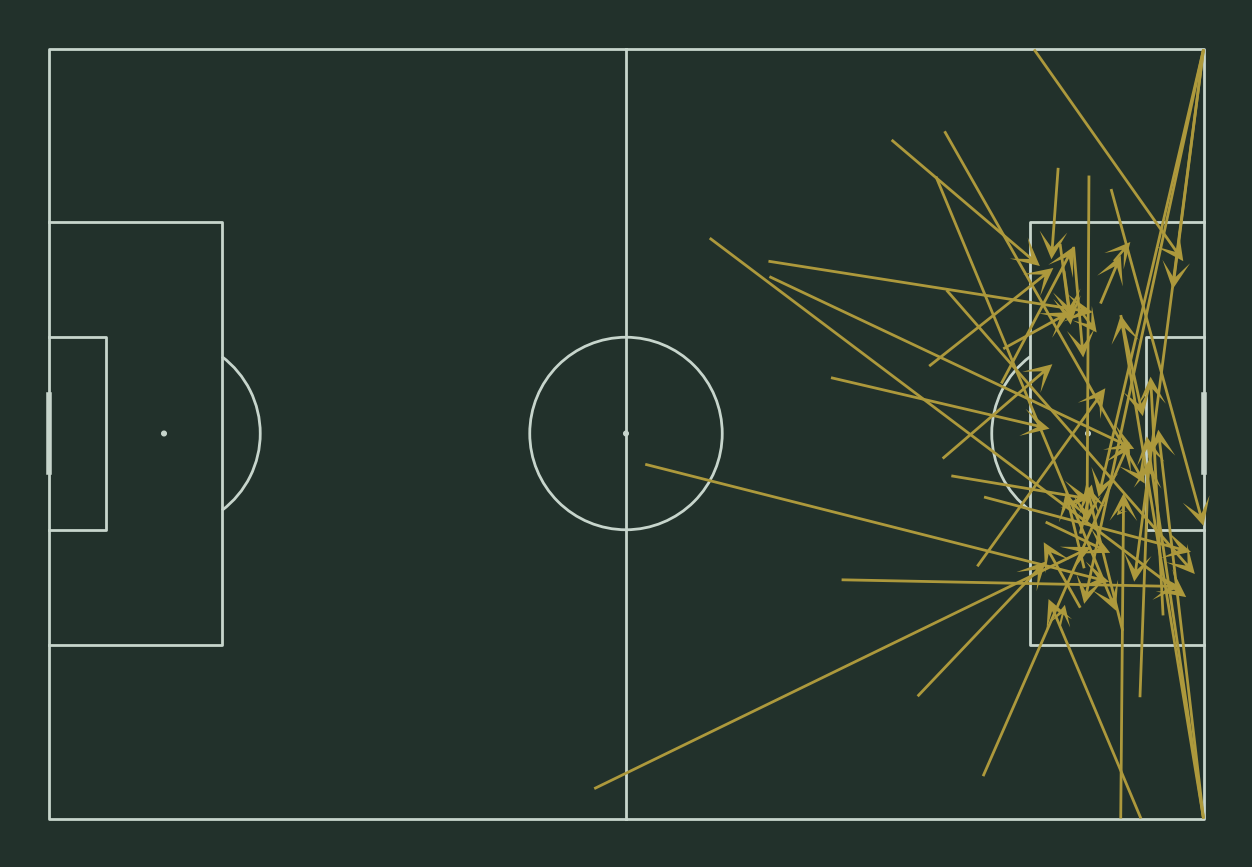

In [9]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# Plot the completed passes
pitch.arrows(df_pass_opposition_box.x,df_pass_opposition_box.y,
             df_pass_opposition_box.x_end,df_pass_opposition_box.y_end, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

Dans cette section de code, l'objectif est de déterminer quel joueur a effectué le plus de passes dans la surface de réparation adverse et de présenter cette information de manière claire

In [46]:
countpass = df_pass_opposition_box['player'].value_counts()
print(countpass)
joueur_max_passes = countpass.idxmax()  # Nom du joueur
nombre_max_passes = countpass.max()
print(f"Le joueur avec le plus de passes est {joueur_max_passes} avec {nombre_max_passes} passes.")

player
Luke Shaw                 7
Philip Foden              7
Jordan Brian Henderson    5
Harry Kane                3
Jack Grealish             3
Jude Bellingham           3
Marcus Rashford           3
Daniel James              3
Callum Wilson             2
Harry Maguire             2
John Stones               2
Kyle Walker               2
Trent Alexander-Arnold    2
Ethan Ampadu              1
Connor Roberts            1
Brennan Johnson           1
Neco Williams             1
Harry Wilson              1
Name: count, dtype: int64
Le joueur avec le plus de passes est Luke Shaw avec 7 passes.


Objectif de la Fonction :
Cette fonction a pour but d'identifier le joueur qui a réalisé le plus grand nombre de passes tout au long d'un match donné. De plus, elle fournit une visualisation de ces passes sur un terrain de football, permettant ainsi de visualiser le rôle de ce joueur dans le jeu.

In [130]:
def players_frequently_passed_the_ball_into_the_opposition_box(match_id):
    matches = sb.matches(competition_id=43, season_id=106)
    event=sb.events(match_id)
    passes = event[event['type'] == 'Pass']
    team1,team2 = passes.team.unique()
    df_pass = passes[['match_id','location','pass_end_location','pass_outcome','player']]

    df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    df_pass['x_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    df_pass['y_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    df_pass_opposition_box = df_pass[(df_pass['x_end'] >= 103) & (df_pass['x_end'] <= 120) & 
                                 (df_pass['y_end'] >= 20) & (df_pass['y_end'] <= 60)]




    #mask_complete = df_pass_opposition_box.pass_outcome.isnull()
    countpass = df_pass_opposition_box['player'].value_counts()
    joueur_max_passes = countpass.idxmax()  # Nom du joueur
    nombre_max_passes = countpass.max()
    df_pass_opposition_box_joueur_max_passes = df_pass_opposition_box[df_pass_opposition_box ['player'] == joueur_max_passes]
    print(f"Le joueur avec le plus de passes est {joueur_max_passes} avec {nombre_max_passes} passes.")
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')
    
    pitch.arrows(df_pass_opposition_box_joueur_max_passes.x,df_pass_opposition_box_joueur_max_passes.y,
             df_pass_opposition_box_joueur_max_passes.x_end,df_pass_opposition_box_joueur_max_passes.y_end, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')
    
    
    

En appliquant cette fonction au match entre le Portugal et le Maroc, nous serons en mesure de mieux comprendre les contributions respectives des joueurs en matière de passes, tout en mettant en avant le joueur qui a eu le plus d'impact durant la rencontre. Cette analyse permettra d'approfondir notre compréhension du déroulement du match et des performances individuelles.

C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Bruno Miguel Borges Fernandes avec 14 passes.


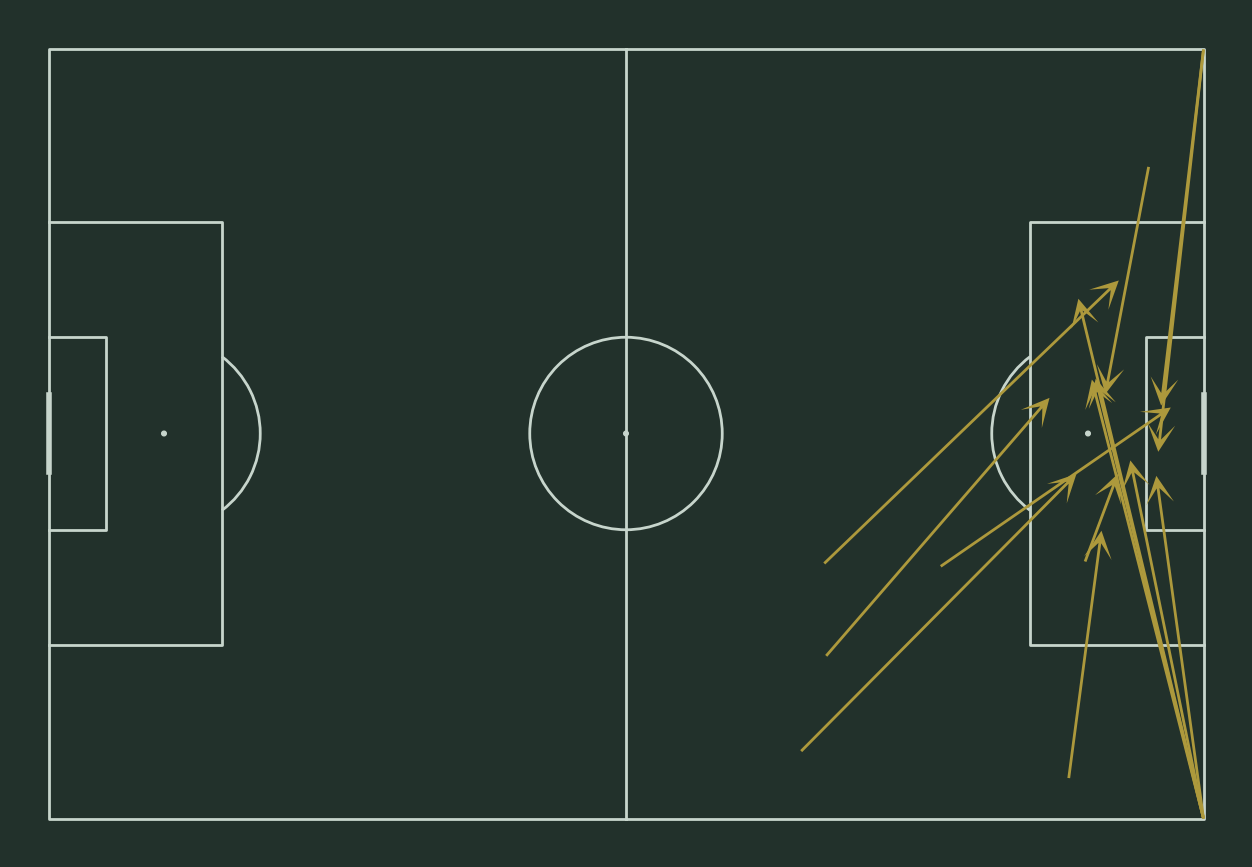

In [132]:

players_frequently_passed_the_ball_into_the_opposition_box(3869486)

Ce code itère à travers chaque match de la base de données, affiche les détails du match, notamment l'identifiant du match ainsi que les équipes à domicile et à l'extérieur, puis appelle la fonction players_frequently_passed_the_ball_into_the_opposition_box pour analyser les passes effectuées par les joueurs durant chaque rencontre.

Match ID: 3857256
Équipe à domicile: Serbia
Équipe à l'extérieur: Switzerland


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Filip Kostić avec 12 passes.
Match ID: 3869151
Équipe à domicile: Argentina
Équipe à l'extérieur: Australia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Craig Goodwin avec 7 passes.
Match ID: 3857257
Équipe à domicile: Australia
Équipe à l'extérieur: Denmark


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Christian Dannemann Eriksen avec 12 passes.
Match ID: 3857258
Équipe à domicile: Brazil
Équipe à l'extérieur: Serbia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Raphael Dias Belloli avec 7 passes.
Match ID: 3857288
Équipe à domicile: Tunisia
Équipe à l'extérieur: Australia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Naïm Sliti avec 15 passes.
Match ID: 3857267
Équipe à domicile: Ecuador
Équipe à l'extérieur: Senegal


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ismail Jakobs avec 8 passes.
Match ID: 3869321
Équipe à domicile: Netherlands
Équipe à l'extérieur: Argentina


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Cody Mathès Gakpo avec 11 passes.
Match ID: 3857287
Équipe à domicile: Uruguay
Équipe à l'extérieur: South Korea


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Federico Santiago Valverde Dipetta avec 8 passes.
Match ID: 3869486
Équipe à domicile: Morocco
Équipe à l'extérieur: Portugal


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Bruno Miguel Borges Fernandes avec 14 passes.
Match ID: 3869685
Équipe à domicile: Argentina
Équipe à l'extérieur: France


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Lionel Andrés Messi Cuccittini avec 9 passes.
Match ID: 3857260
Équipe à domicile: Saudi Arabia
Équipe à l'extérieur: Mexico


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Hirving Rodrigo Lozano Bahena avec 10 passes.
Match ID: 3857264
Équipe à domicile: Poland
Équipe à l'extérieur: Argentina


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ángel Fabián Di María Hernández avec 12 passes.
Match ID: 3857266
Équipe à domicile: France
Équipe à l'extérieur: Denmark


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Antoine Griezmann avec 10 passes.
Match ID: 3857289
Équipe à domicile: Argentina
Équipe à l'extérieur: Mexico


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Luis Gerardo Chávez Magallón avec 5 passes.
Match ID: 3857269
Équipe à domicile: Brazil
Équipe à l'extérieur: Switzerland


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Raphael Dias Belloli avec 10 passes.
Match ID: 3857294
Équipe à domicile: Netherlands
Équipe à l'extérieur: Qatar


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Daley Blind avec 7 passes.
Match ID: 3869254
Équipe à domicile: Portugal
Équipe à l'extérieur: Switzerland


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Bruno Miguel Borges Fernandes avec 7 passes.
Match ID: 3869118
Équipe à domicile: England
Équipe à l'extérieur: Senegal


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Philip Foden avec 5 passes.
Match ID: 3869684
Équipe à domicile: Croatia
Équipe à l'extérieur: Morocco


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Lovro Majer avec 9 passes.
Match ID: 3869519
Équipe à domicile: Argentina
Équipe à l'extérieur: Croatia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ivan Perišić avec 9 passes.
Match ID: 3869354
Équipe à domicile: England
Équipe à l'extérieur: France


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ousmane Dembélé avec 8 passes.
Match ID: 3869552
Équipe à domicile: France
Équipe à l'extérieur: Morocco


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Hakim Ziyech avec 11 passes.
Match ID: 3869420
Équipe à domicile: Croatia
Équipe à l'extérieur: Brazil


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Neymar da Silva Santos Junior avec 11 passes.
Match ID: 3869220
Équipe à domicile: Morocco
Équipe à l'extérieur: Spain


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Jordi Alba Ramos avec 7 passes.
Match ID: 3869219
Équipe à domicile: Japan
Équipe à l'extérieur: Croatia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Josip Juranović avec 11 passes.
Match ID: 3869253
Équipe à domicile: Brazil
Équipe à l'extérieur: South Korea


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Raphael Dias Belloli avec 10 passes.
Match ID: 3869152
Équipe à domicile: France
Équipe à l'extérieur: Poland


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Antoine Griezmann avec 14 passes.
Match ID: 3869117
Équipe à domicile: Netherlands
Équipe à l'extérieur: United States


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Christian Pulisic avec 12 passes.
Match ID: 3857270
Équipe à domicile: Portugal
Équipe à l'extérieur: Uruguay


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Bruno Miguel Borges Fernandes avec 7 passes.
Match ID: 3857263
Équipe à domicile: Spain
Équipe à l'extérieur: Germany


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Joshua Kimmich avec 6 passes.
Match ID: 3857259
Équipe à domicile: Cameroon
Équipe à l'extérieur: Serbia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Dušan Tadić avec 16 passes.
Match ID: 3857295
Équipe à domicile: Japan
Équipe à l'extérieur: Costa Rica


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Yuki Soma avec 6 passes.
Match ID: 3857283
Équipe à domicile: Belgium
Équipe à l'extérieur: Morocco


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Kevin De Bruyne avec 10 passes.
Match ID: 3857284
Équipe à domicile: Germany
Équipe à l'extérieur: Japan


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Joshua Kimmich avec 12 passes.
Match ID: 3857282
Équipe à domicile: United States
Équipe à l'extérieur: Wales


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Christian Pulisic avec 17 passes.
Match ID: 3857286
Équipe à domicile: Qatar
Équipe à l'extérieur: Ecuador


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Pervis Josué Estupiñán Tenorio avec 10 passes.
Match ID: 3857301
Équipe à domicile: Qatar
Équipe à l'extérieur: Senegal


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Akram Hassan Afif avec 8 passes.
Match ID: 3857300
Équipe à domicile: Argentina
Équipe à l'extérieur: Saudi Arabia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ángel Fabián Di María Hernández avec 12 passes.
Match ID: 3857299
Équipe à domicile: South Korea
Équipe à l'extérieur: Ghana


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Jin-Su Kim avec 12 passes.
Match ID: 3857298
Équipe à domicile: Portugal
Équipe à l'extérieur: Ghana


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Otávio Edmilson da Silva Monteiro avec 10 passes.
Match ID: 3857297
Équipe à domicile: Poland
Équipe à l'extérieur: Saudi Arabia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Salem Mohammed Al Dawsari avec 8 passes.
Match ID: 3857296
Équipe à domicile: Croatia
Équipe à l'extérieur: Belgium


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Kevin De Bruyne avec 13 passes.
Match ID: 3857293
Équipe à domicile: Ghana
Équipe à l'extérieur: Uruguay


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Giorgian Daniel De Arrascaeta Benedetti avec 7 passes.
Match ID: 3857292
Équipe à domicile: Costa Rica
Équipe à l'extérieur: Germany


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Joshua Kimmich avec 15 passes.
Match ID: 3857291
Équipe à domicile: Spain
Équipe à l'extérieur: Costa Rica


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Daniel Olmo Carvajal avec 11 passes.
Match ID: 3857290
Équipe à domicile: Switzerland
Équipe à l'extérieur: Cameroon


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Xherdan Shaqiri avec 9 passes.
Match ID: 3857285
Équipe à domicile: Senegal
Équipe à l'extérieur: Netherlands


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Cody Mathès Gakpo avec 14 passes.
Match ID: 3857281
Équipe à domicile: Croatia
Équipe à l'extérieur: Canada


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ivan Perišić avec 10 passes.
Match ID: 3857280
Équipe à domicile: Cameroon
Équipe à l'extérieur: Brazil


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Gabriel Teodoro Martinelli Silva avec 10 passes.
Match ID: 3857279
Équipe à domicile: France
Équipe à l'extérieur: Australia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Kylian Mbappé Lottin avec 16 passes.
Match ID: 3857278
Équipe à domicile: Iran
Équipe à l'extérieur: United States


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ramin Rezaeian avec 8 passes.
Match ID: 3857277
Équipe à domicile: Morocco
Équipe à l'extérieur: Croatia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Luka Modrić avec 13 passes.
Match ID: 3857276
Équipe à domicile: Canada
Équipe à l'extérieur: Morocco


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est David Junior Hoilett avec 9 passes.
Match ID: 3857275
Équipe à domicile: Tunisia
Équipe à l'extérieur: France


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ali Maâloul avec 16 passes.
Match ID: 3857274
Équipe à domicile: Netherlands
Équipe à l'extérieur: Ecuador


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Pervis Josué Estupiñán Tenorio avec 8 passes.
Match ID: 3857273
Équipe à domicile: Wales
Équipe à l'extérieur: Iran


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Ramin Rezaeian avec 9 passes.
Match ID: 3857272
Équipe à domicile: England
Équipe à l'extérieur: United States


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Luke Shaw avec 9 passes.
Match ID: 3857271
Équipe à domicile: England
Équipe à l'extérieur: Iran


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Kieran Trippier avec 9 passes.
Match ID: 3857268
Équipe à domicile: Belgium
Équipe à l'extérieur: Canada


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Kevin De Bruyne avec 9 passes.
Match ID: 3857265
Équipe à domicile: Mexico
Équipe à l'extérieur: Poland


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Hirving Rodrigo Lozano Bahena avec 13 passes.
Match ID: 3857262
Équipe à domicile: South Korea
Équipe à l'extérieur: Portugal


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est João Pedro Cavaco Cancelo avec 7 passes.
Match ID: 3857261
Équipe à domicile: Wales
Équipe à l'extérieur: England


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Luke Shaw avec 7 passes.
Match ID: 3857255
Équipe à domicile: Japan
Équipe à l'extérieur: Spain


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Marco Asensio Willemsen avec 6 passes.
Match ID: 3857254
Équipe à domicile: Denmark
Équipe à l'extérieur: Tunisia


C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17056\995254047.py:11: SettingWithCopyWarning: 
A value is tr

Le joueur avec le plus de passes est Christian Dannemann Eriksen avec 16 passes.


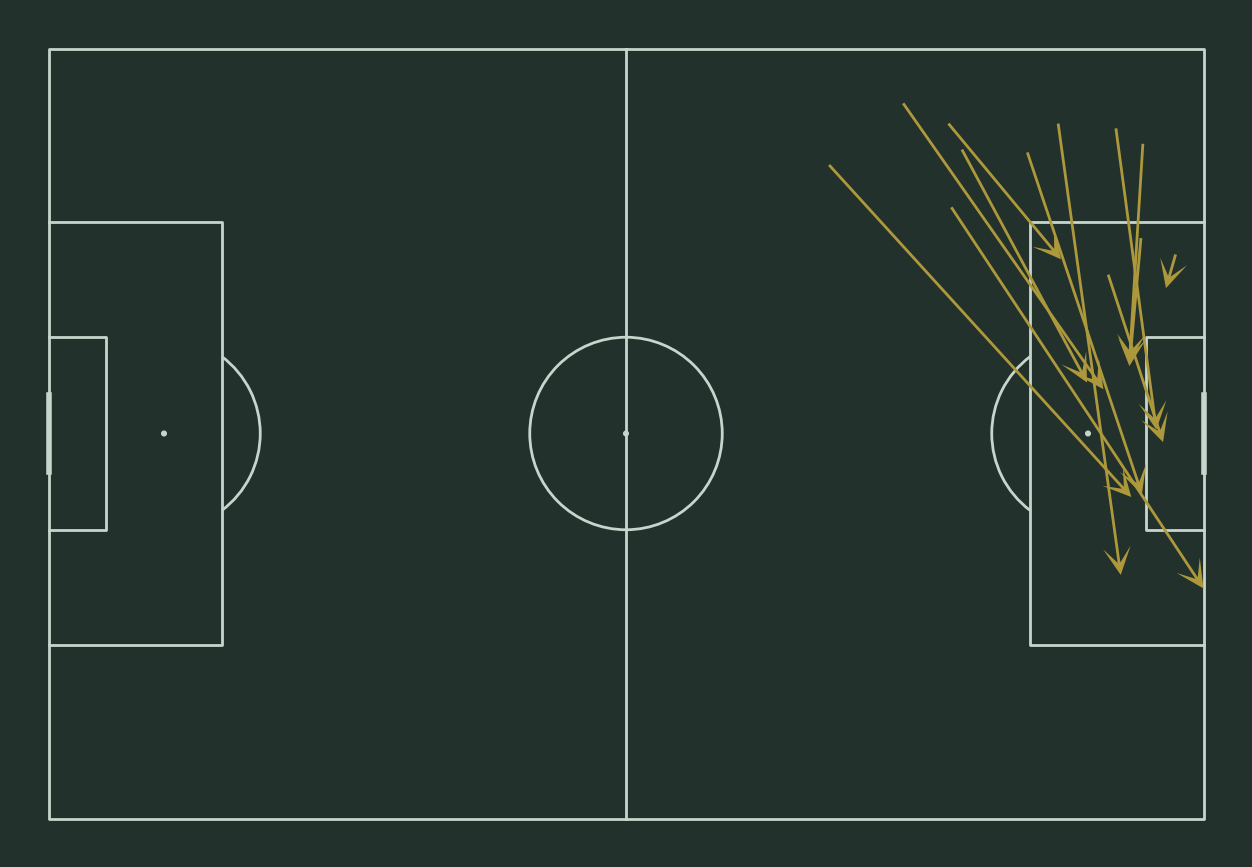

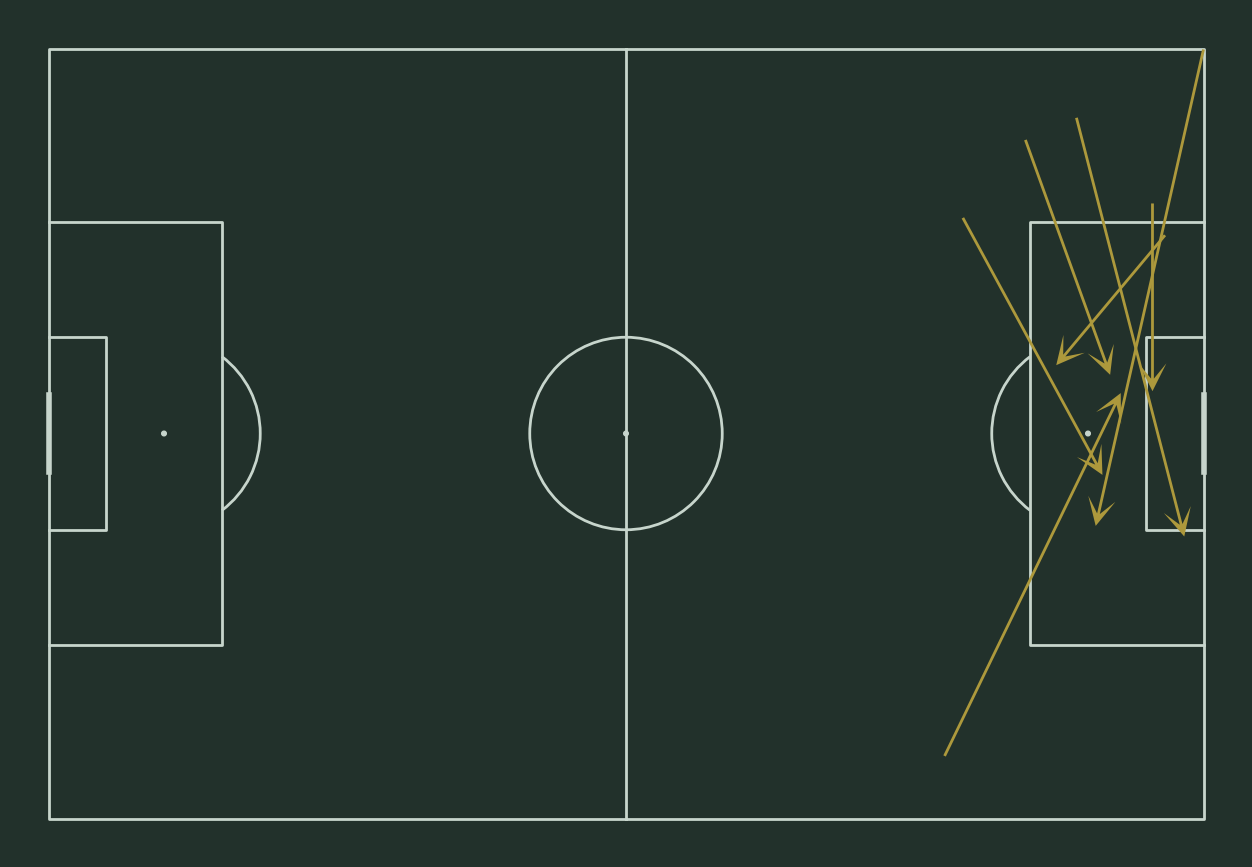

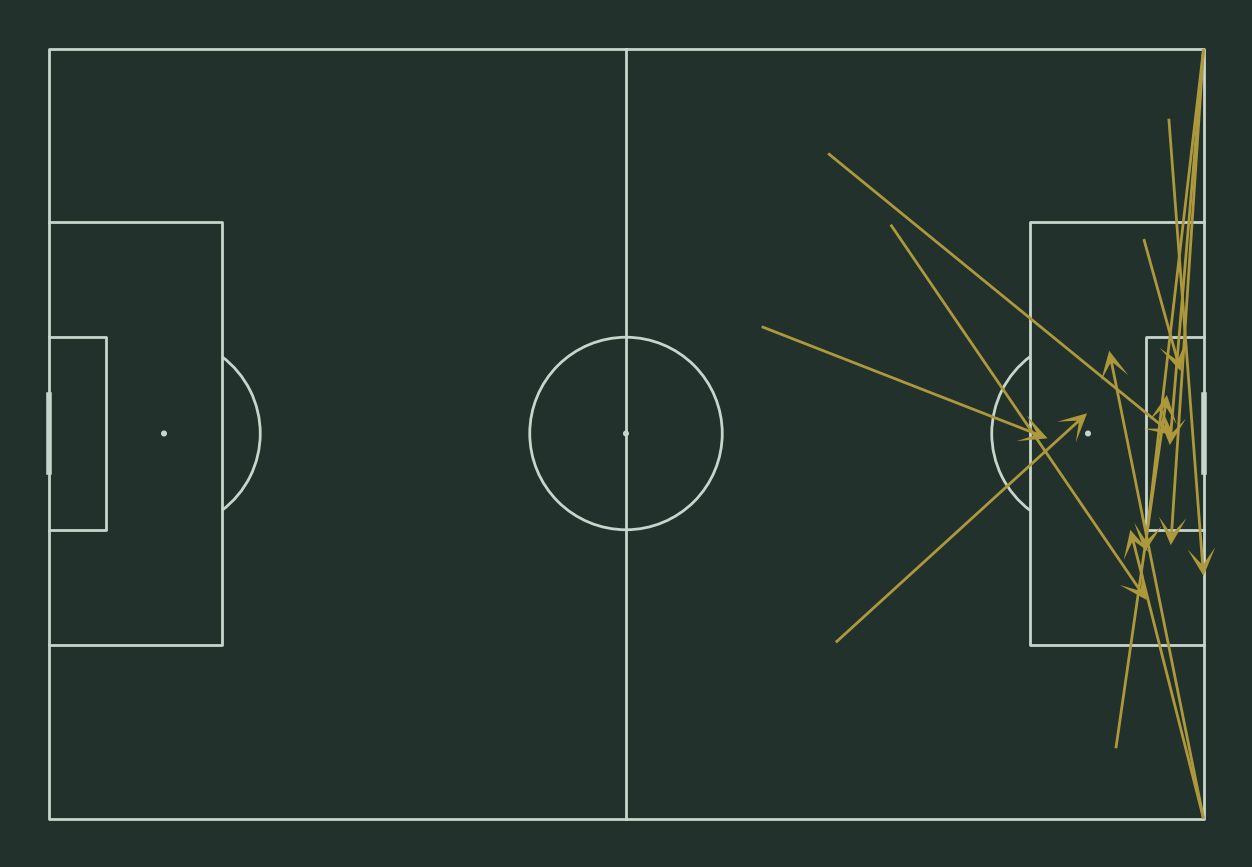

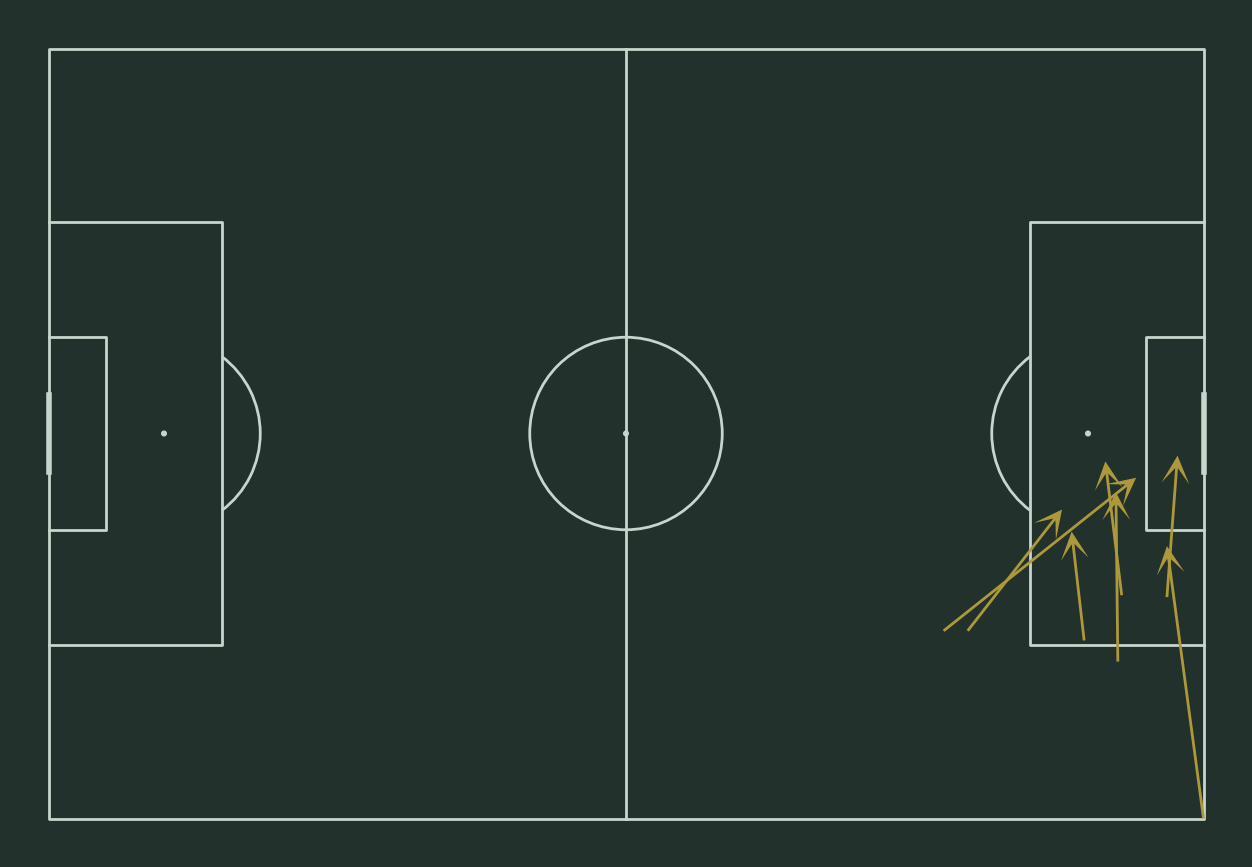

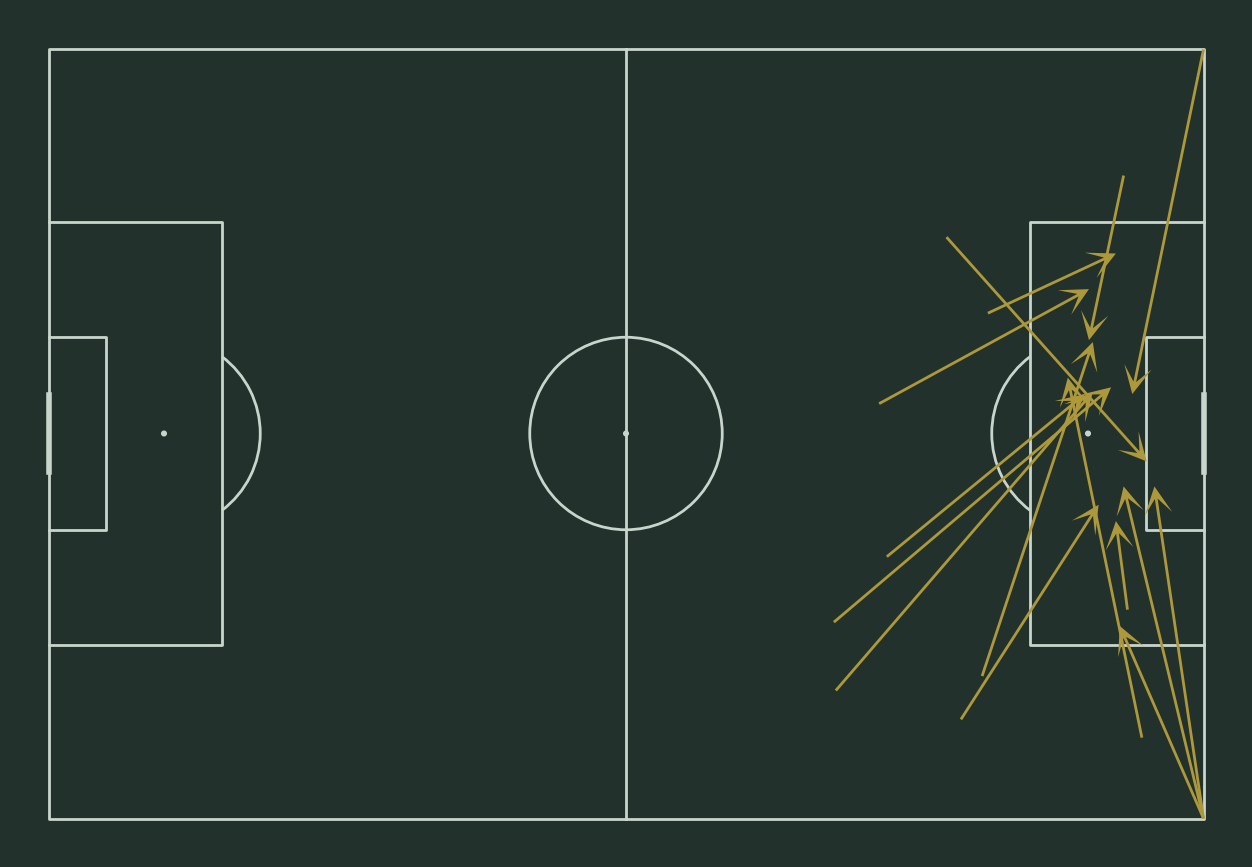

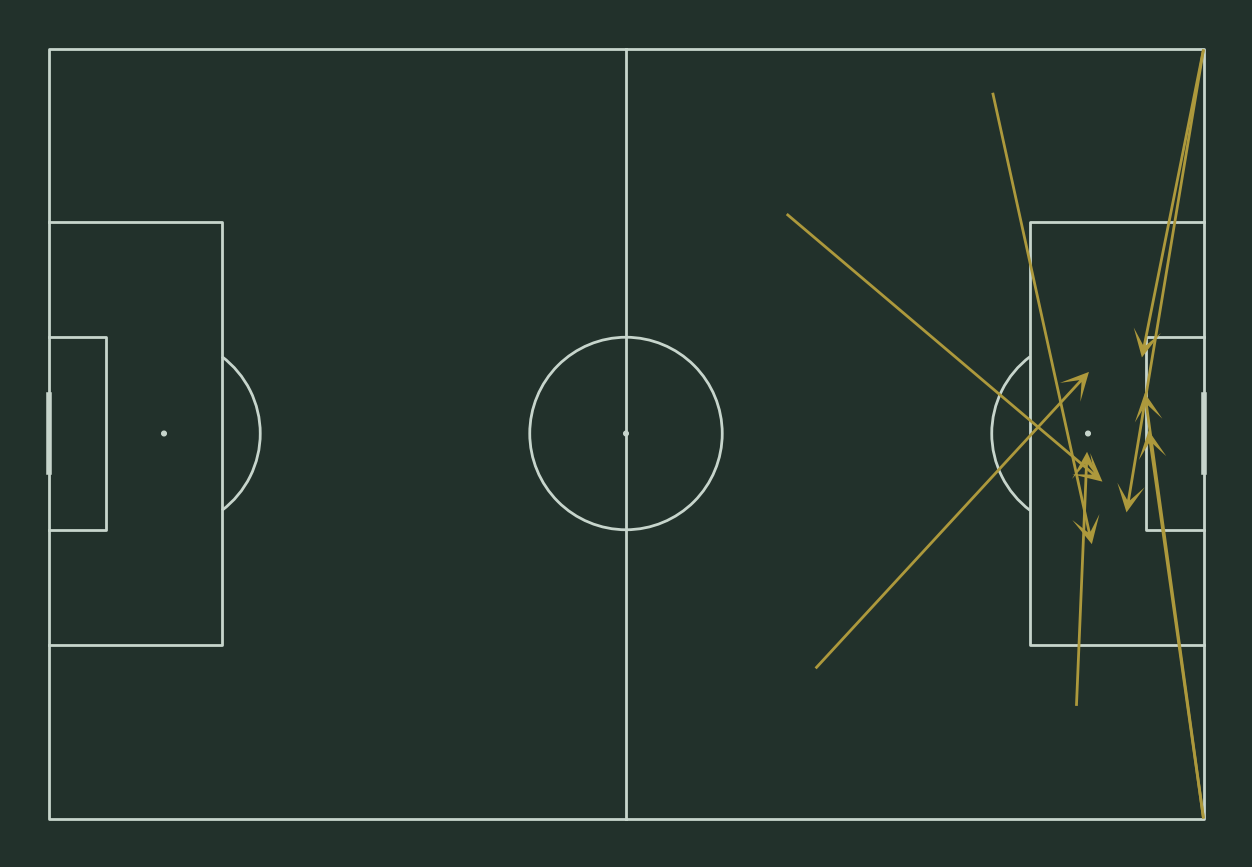

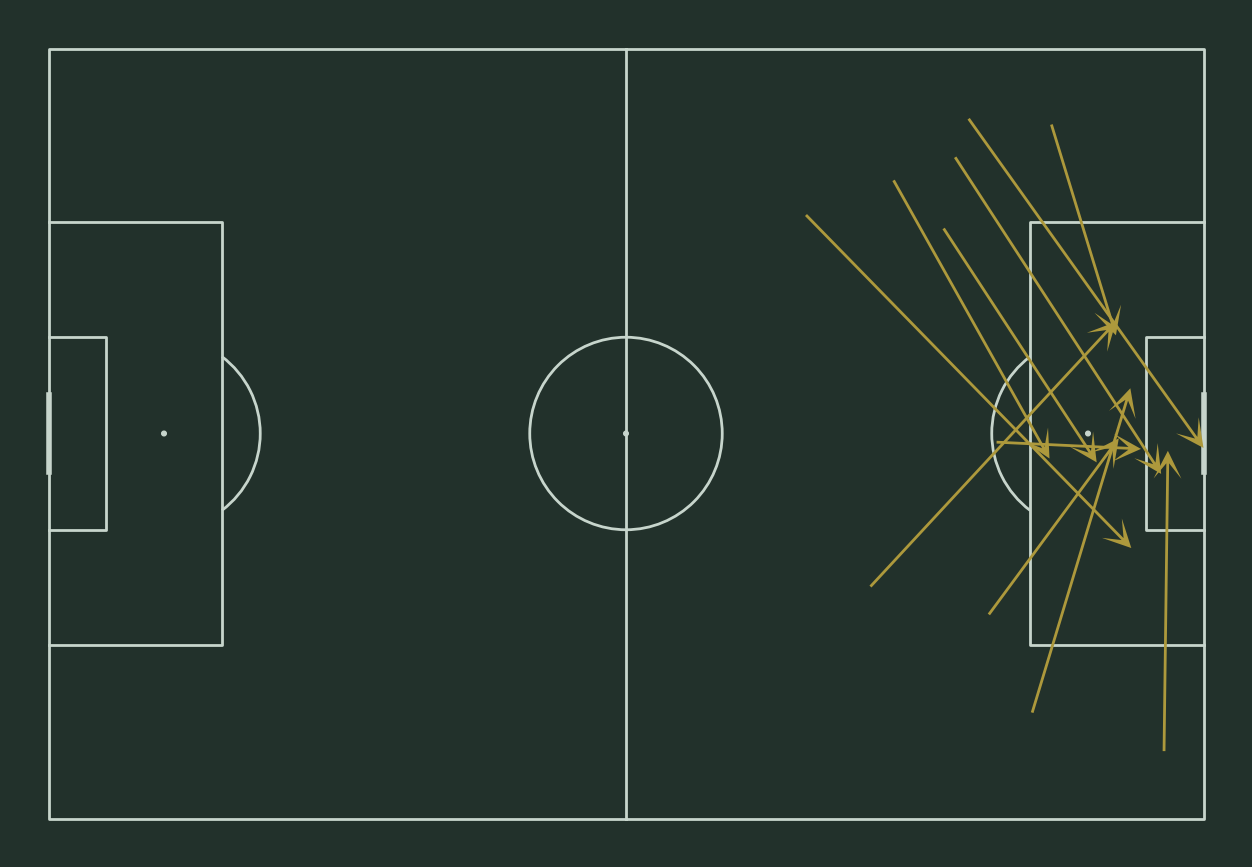

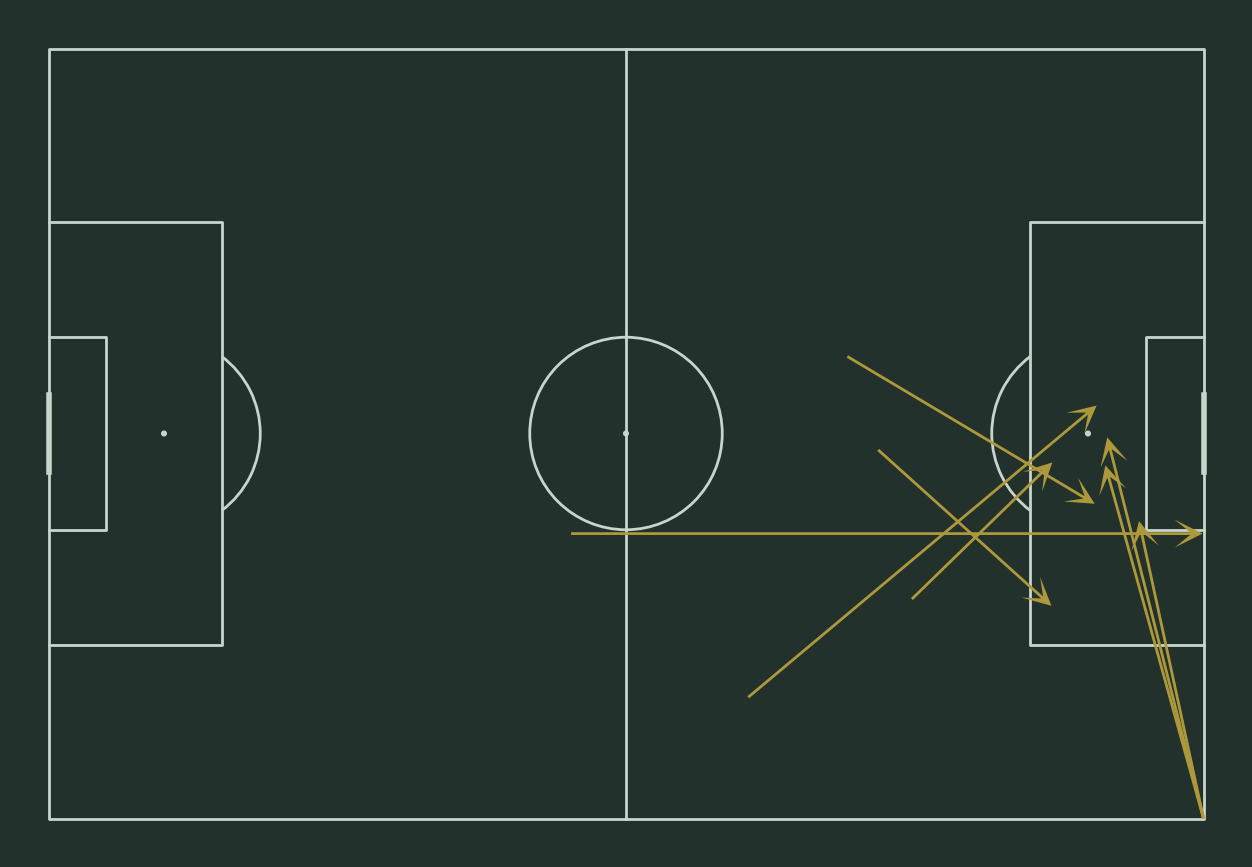

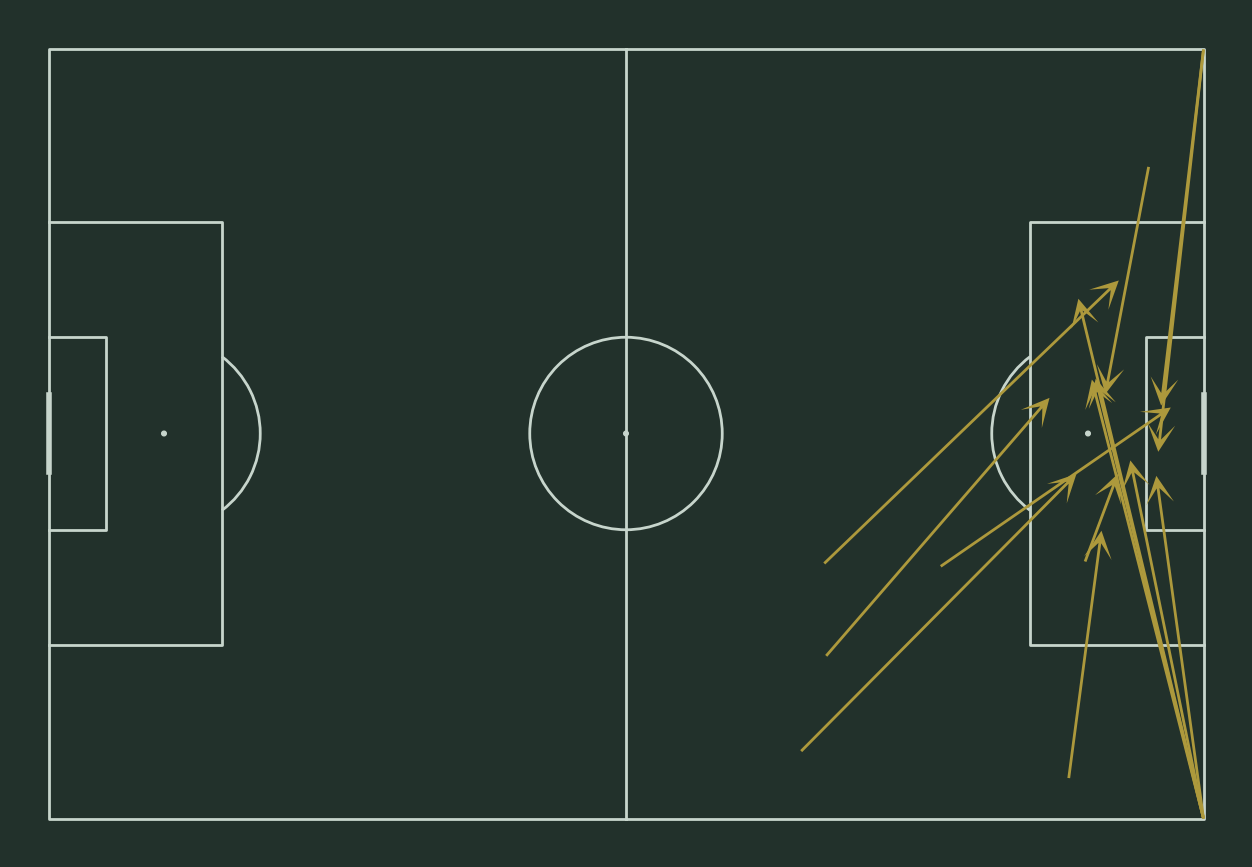

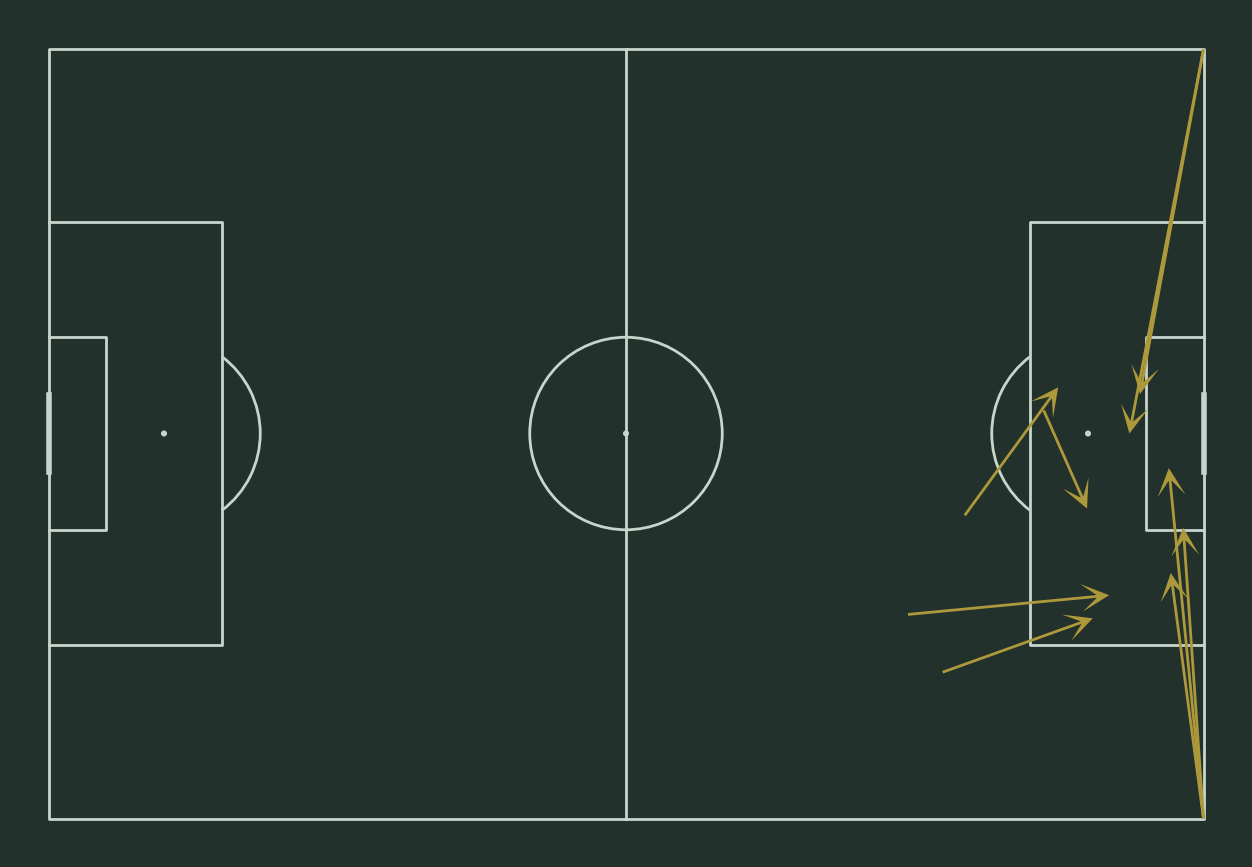

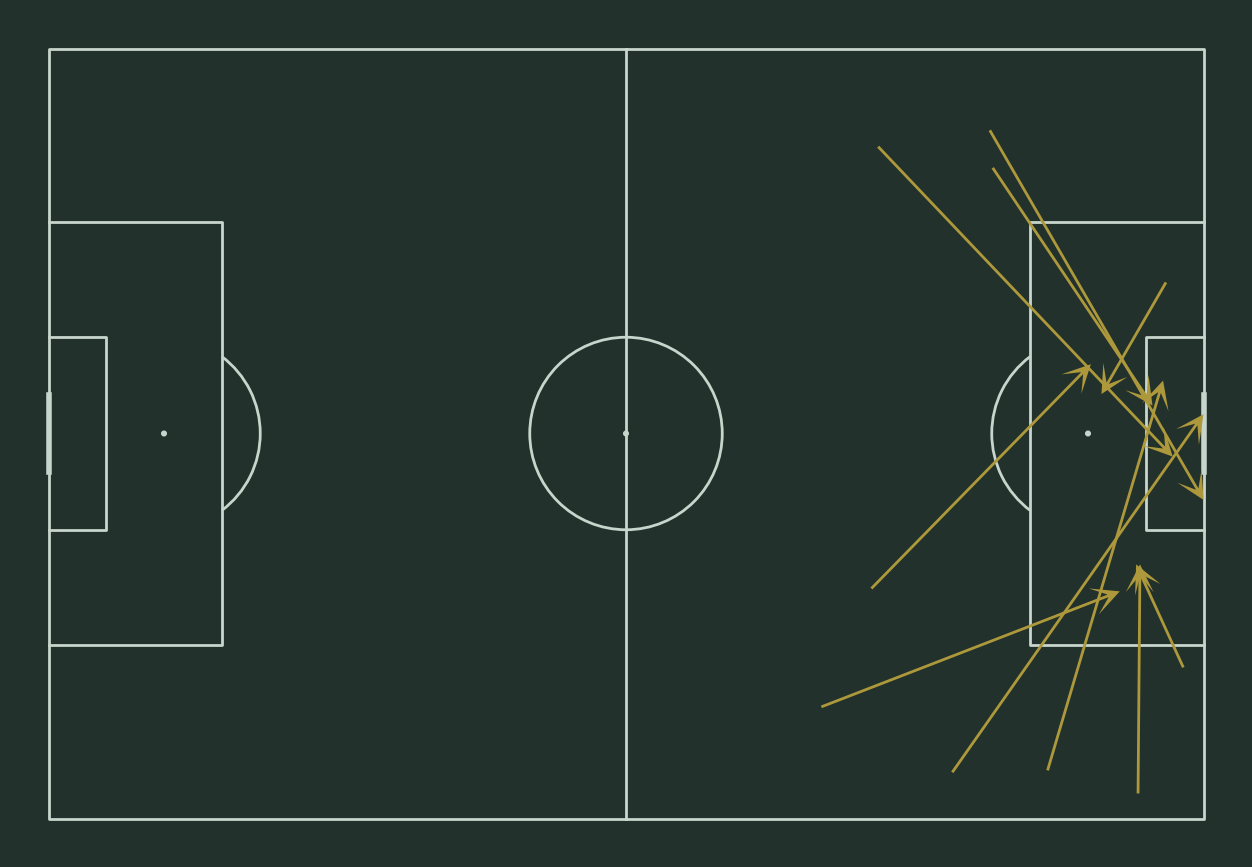

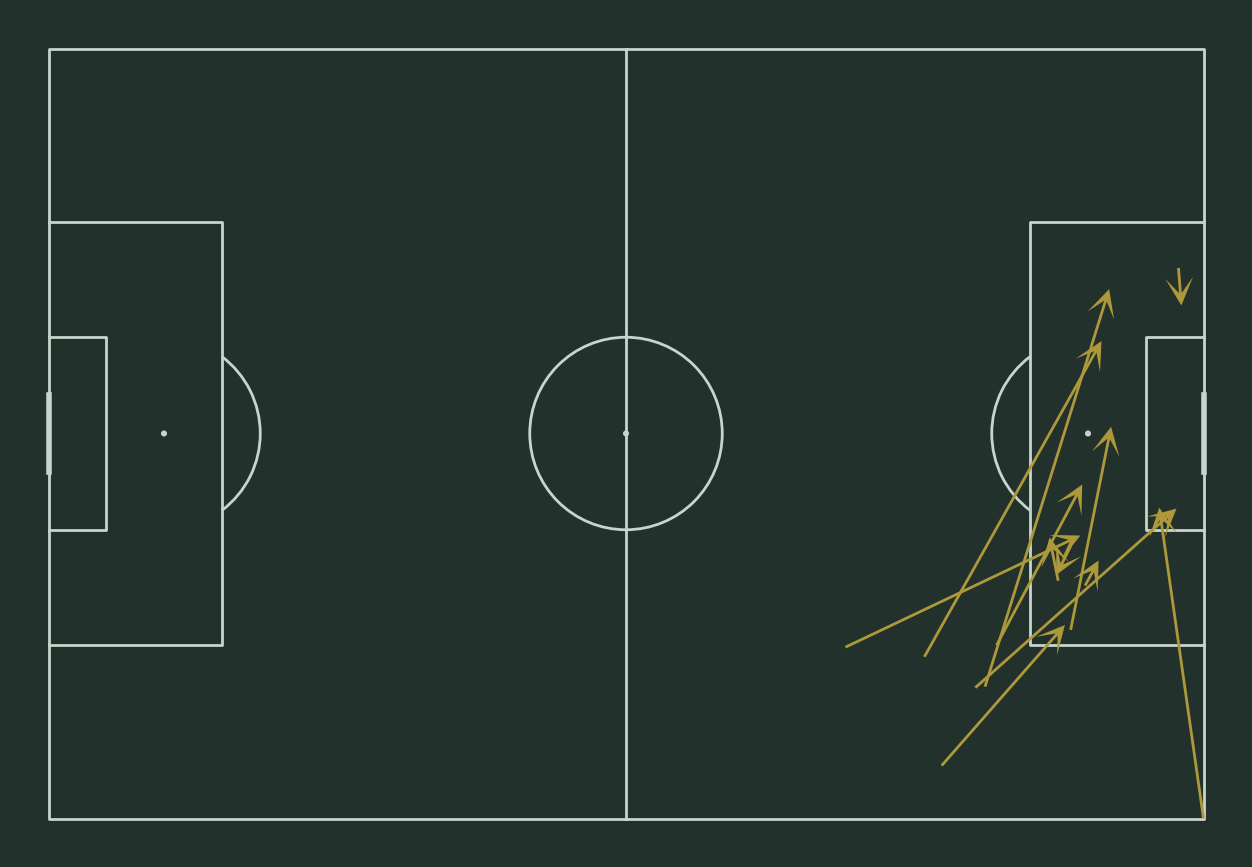

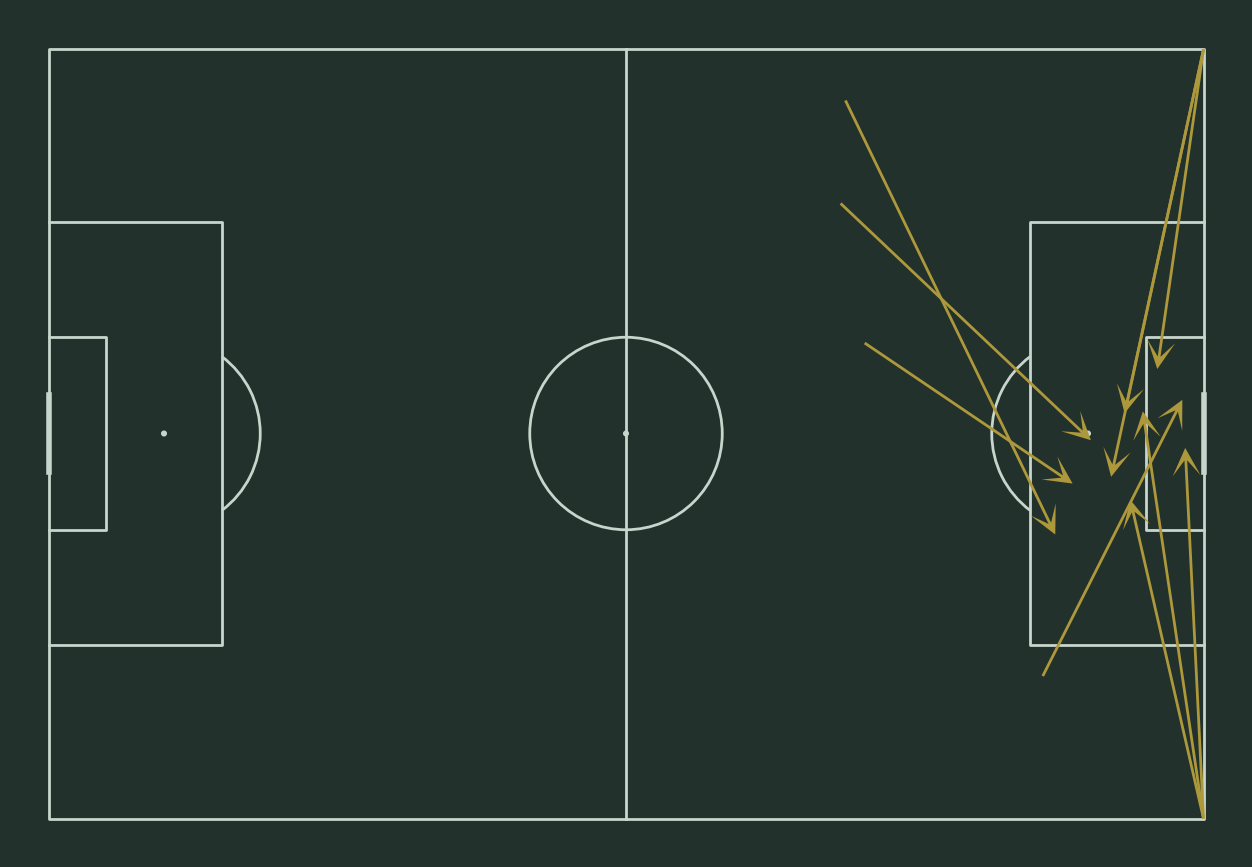

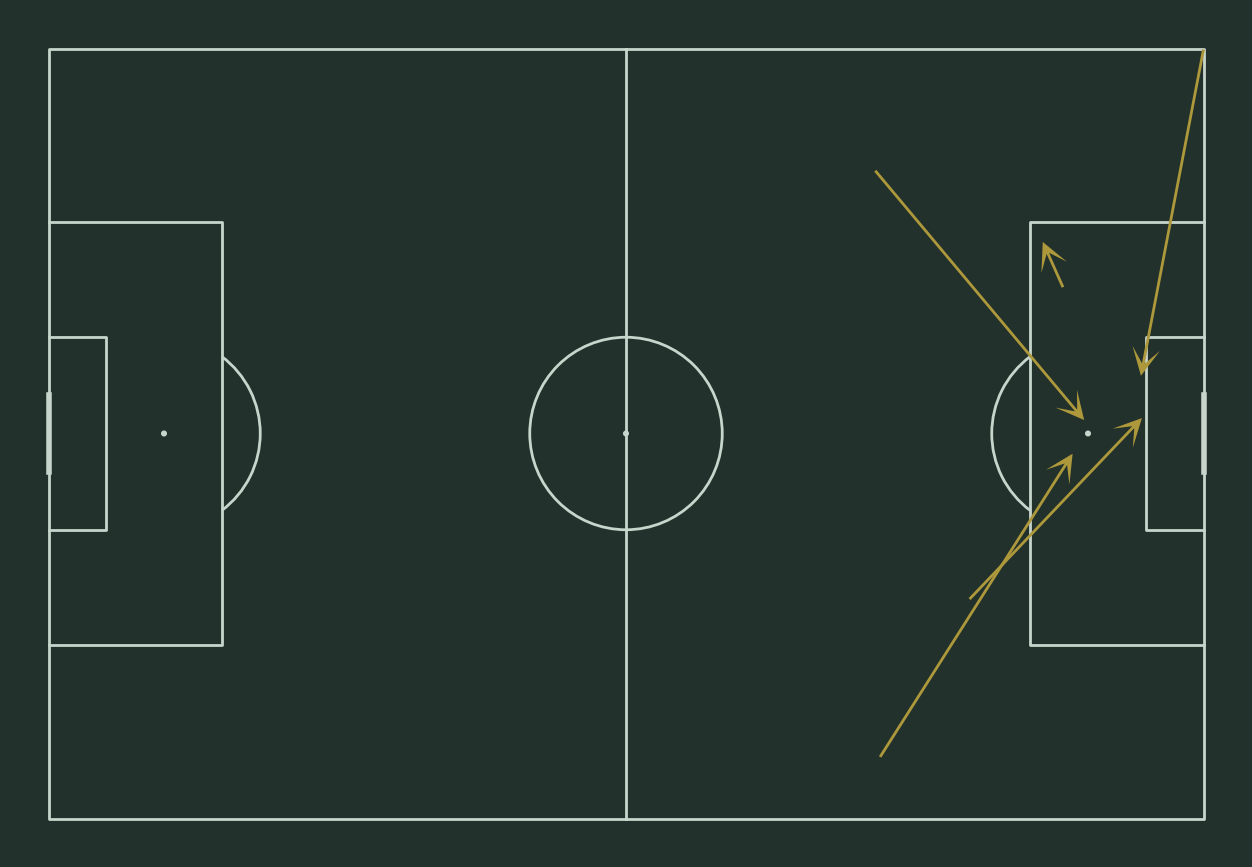

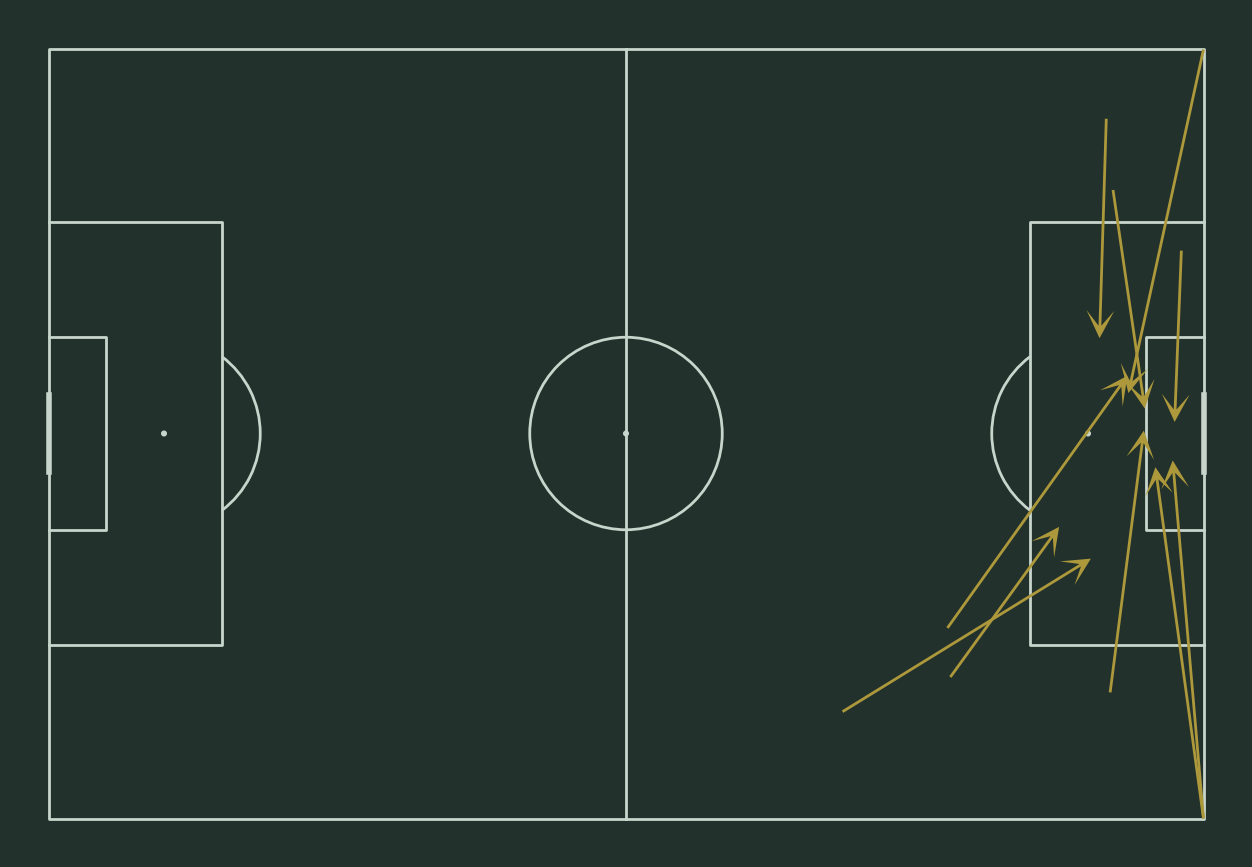

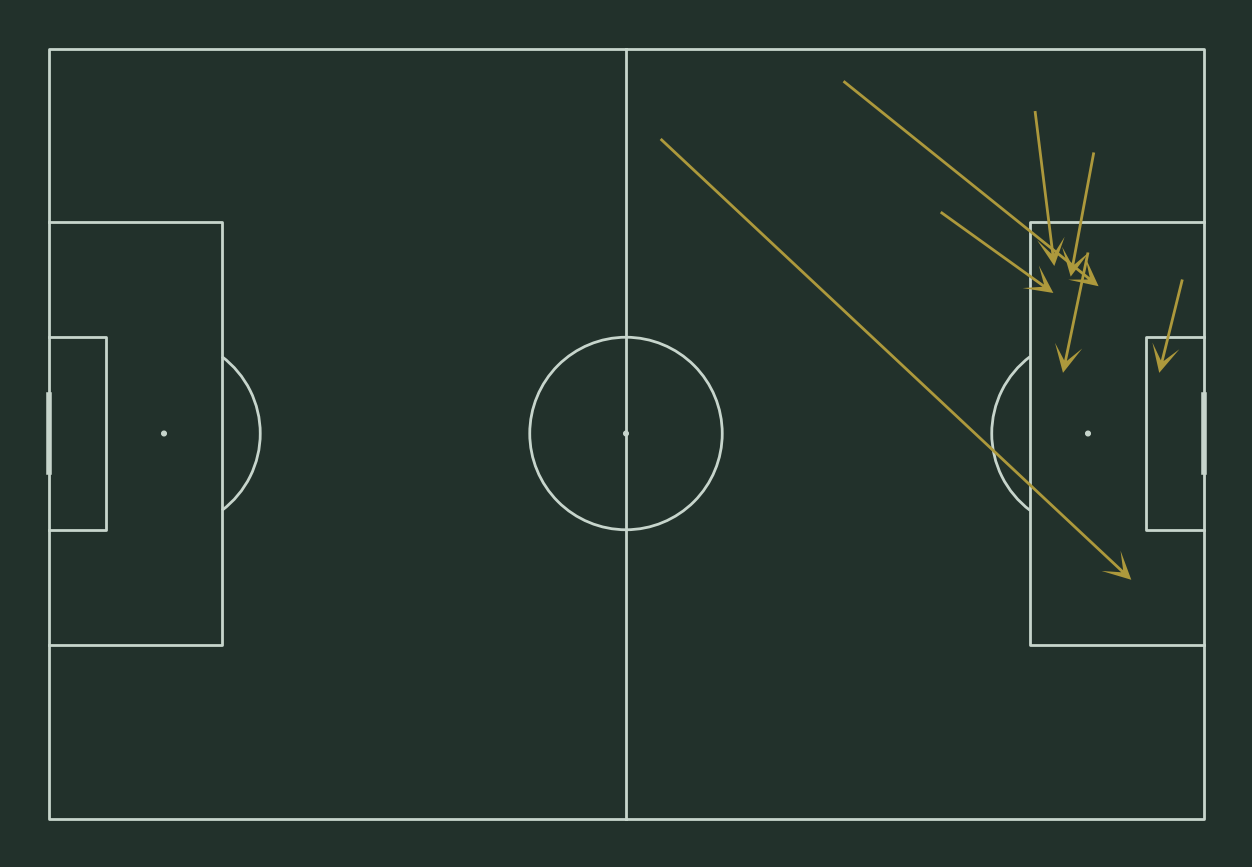

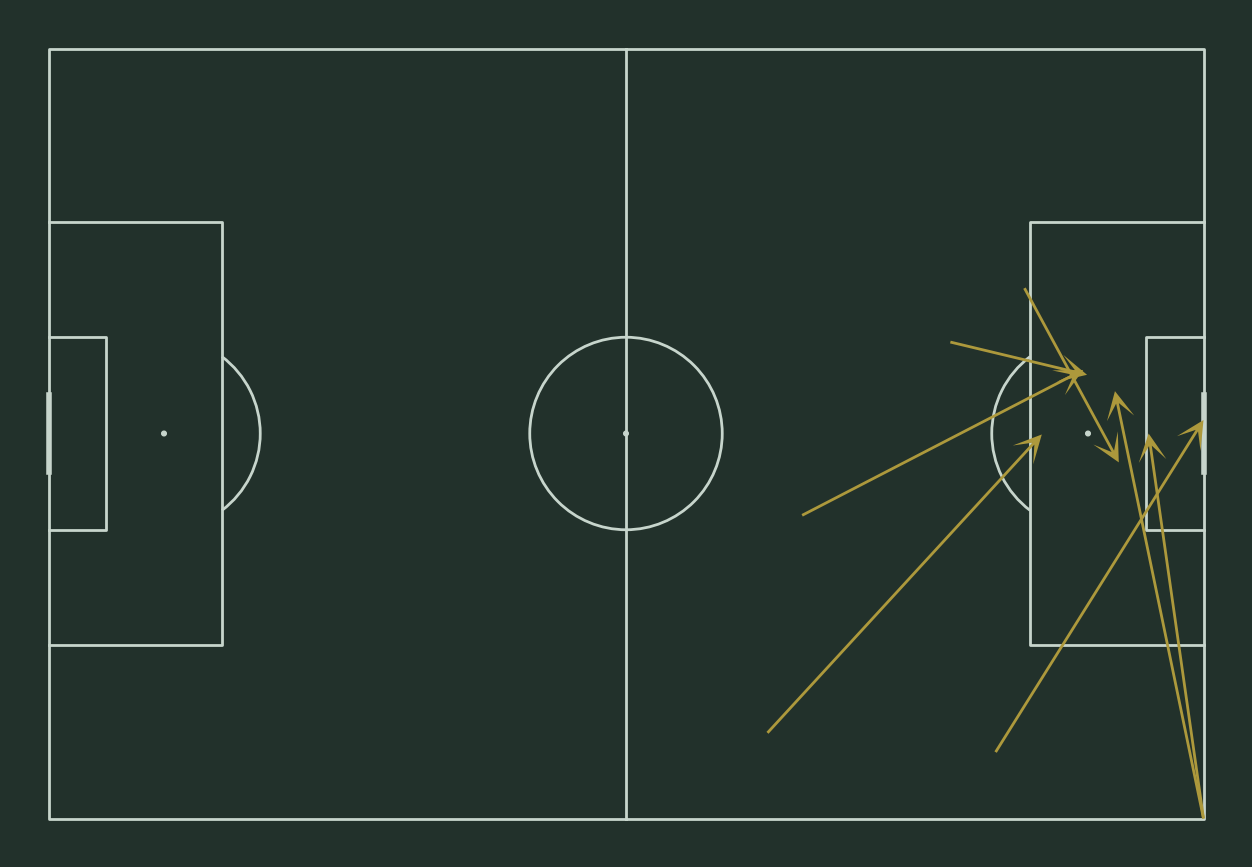

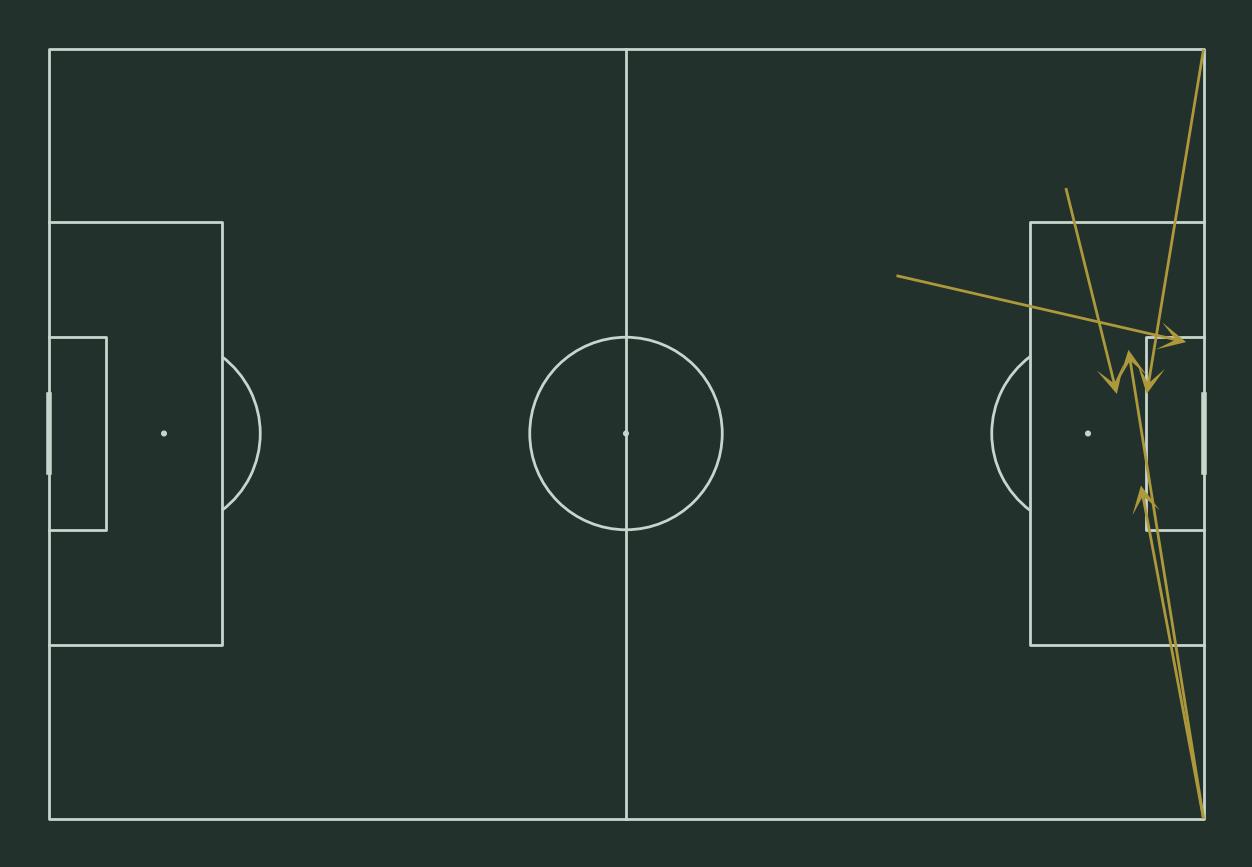

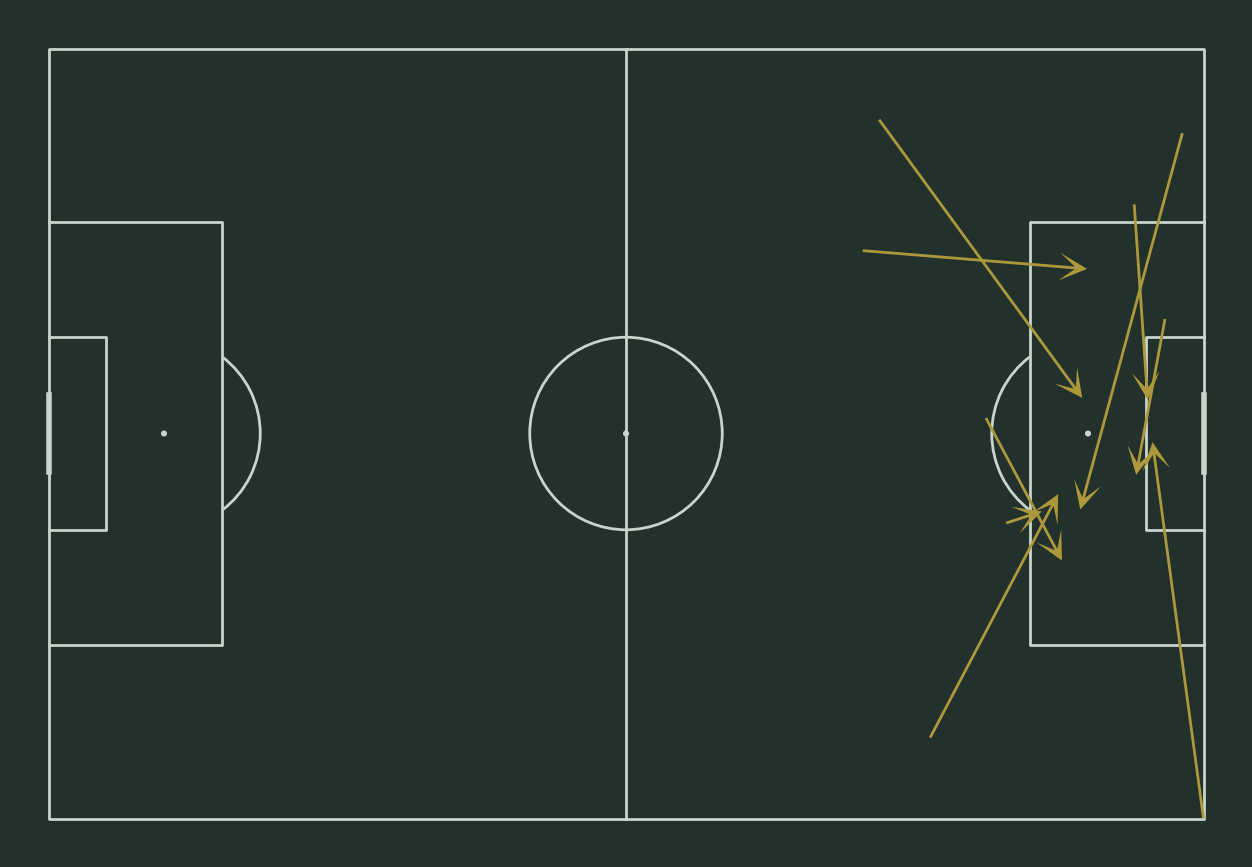

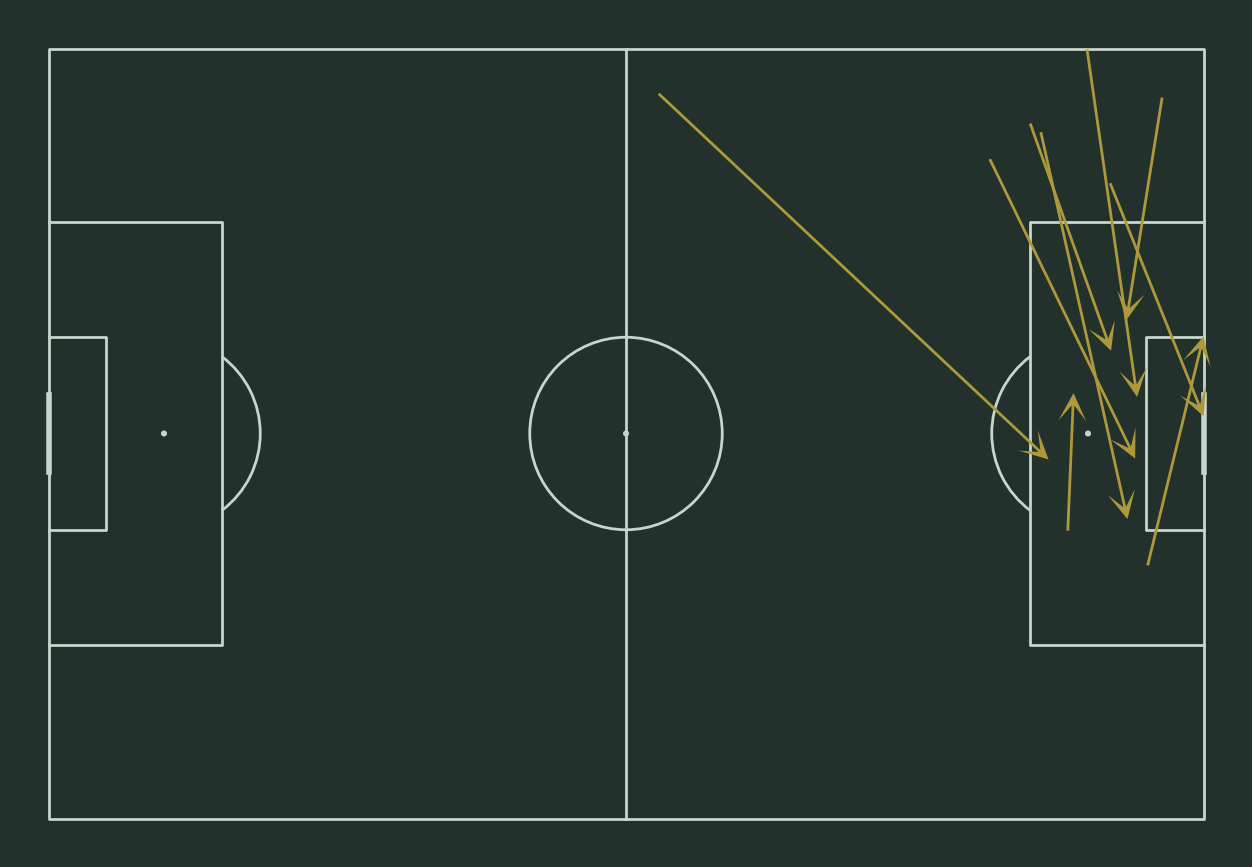

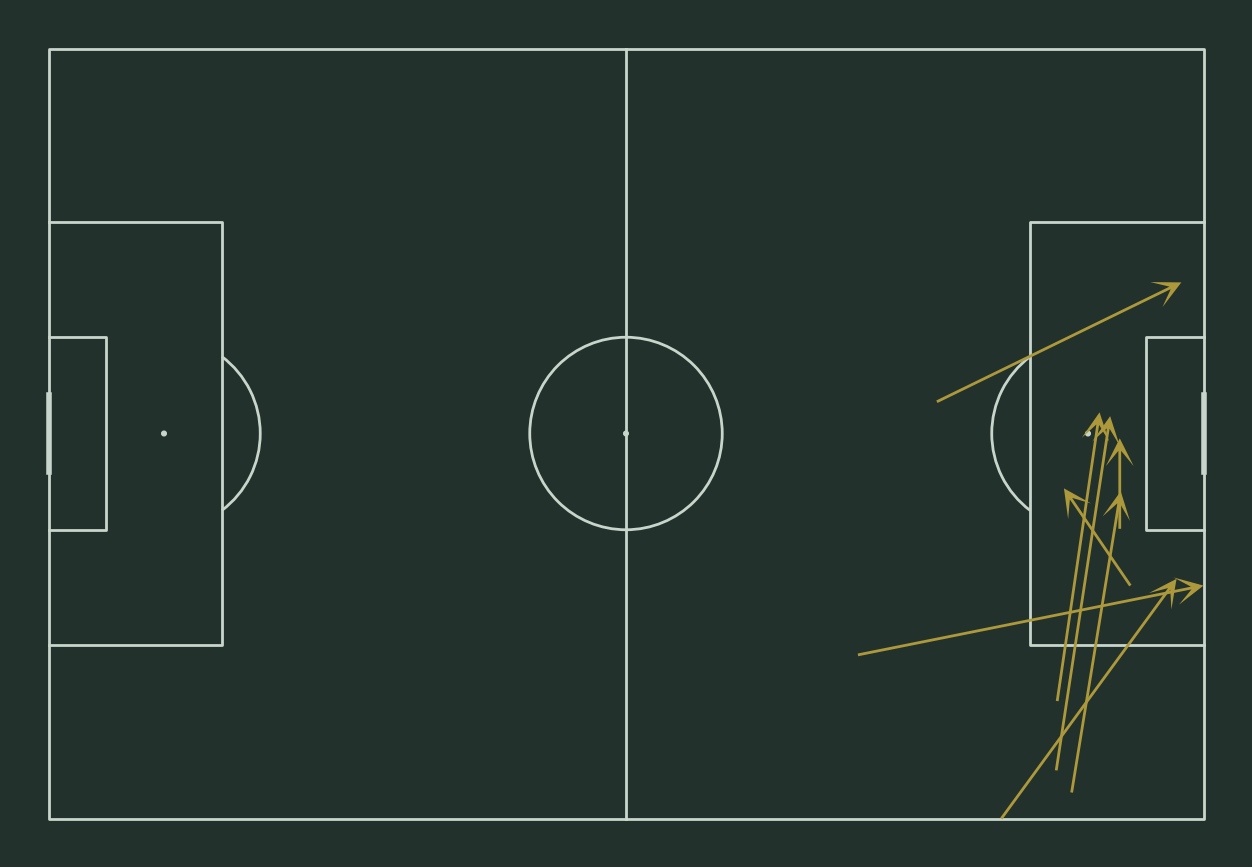

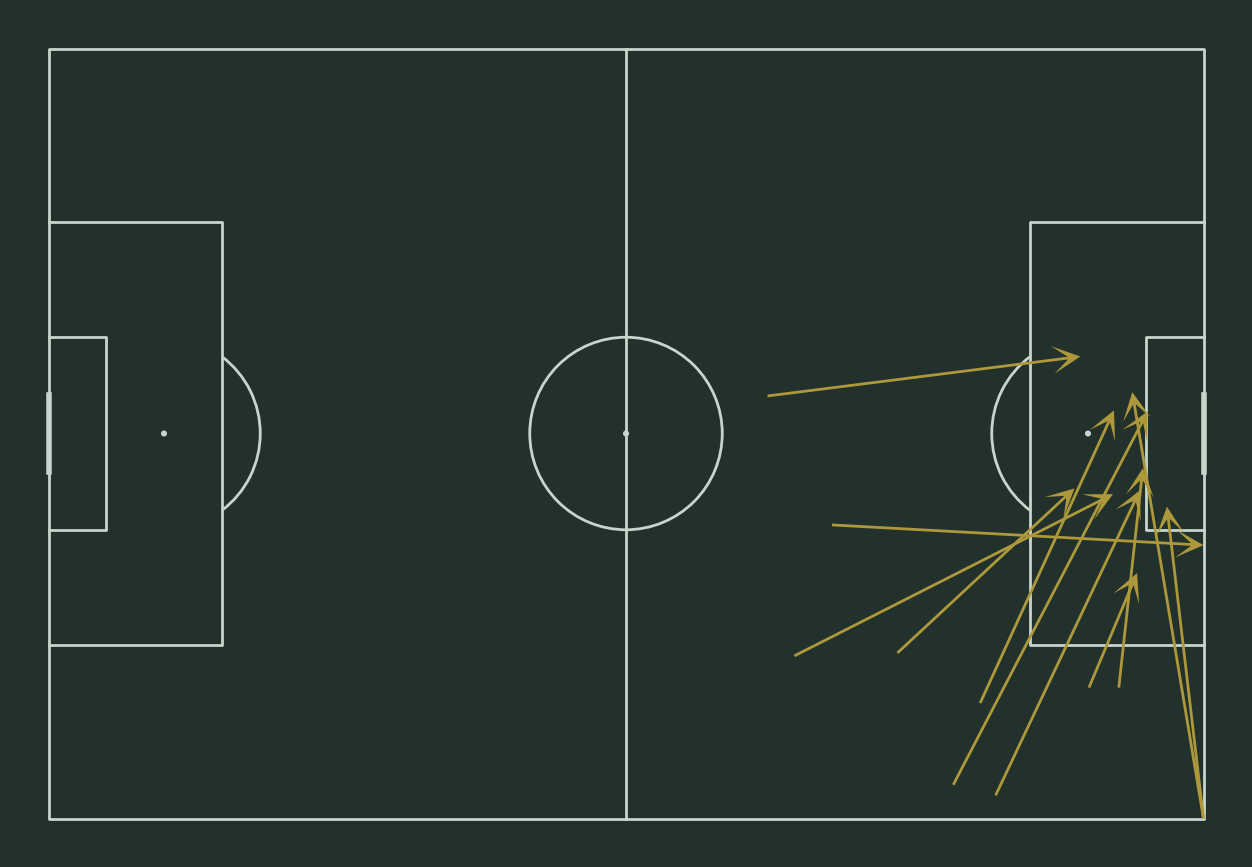

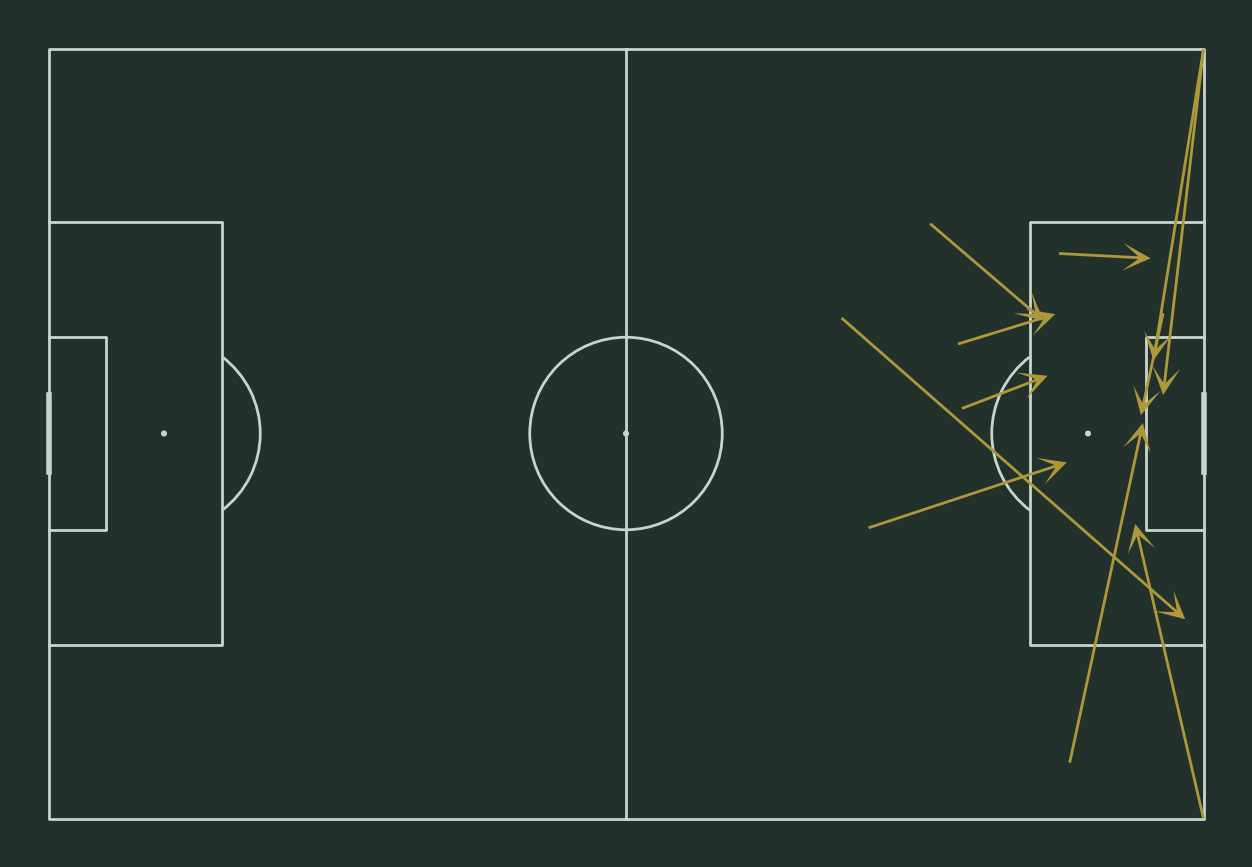

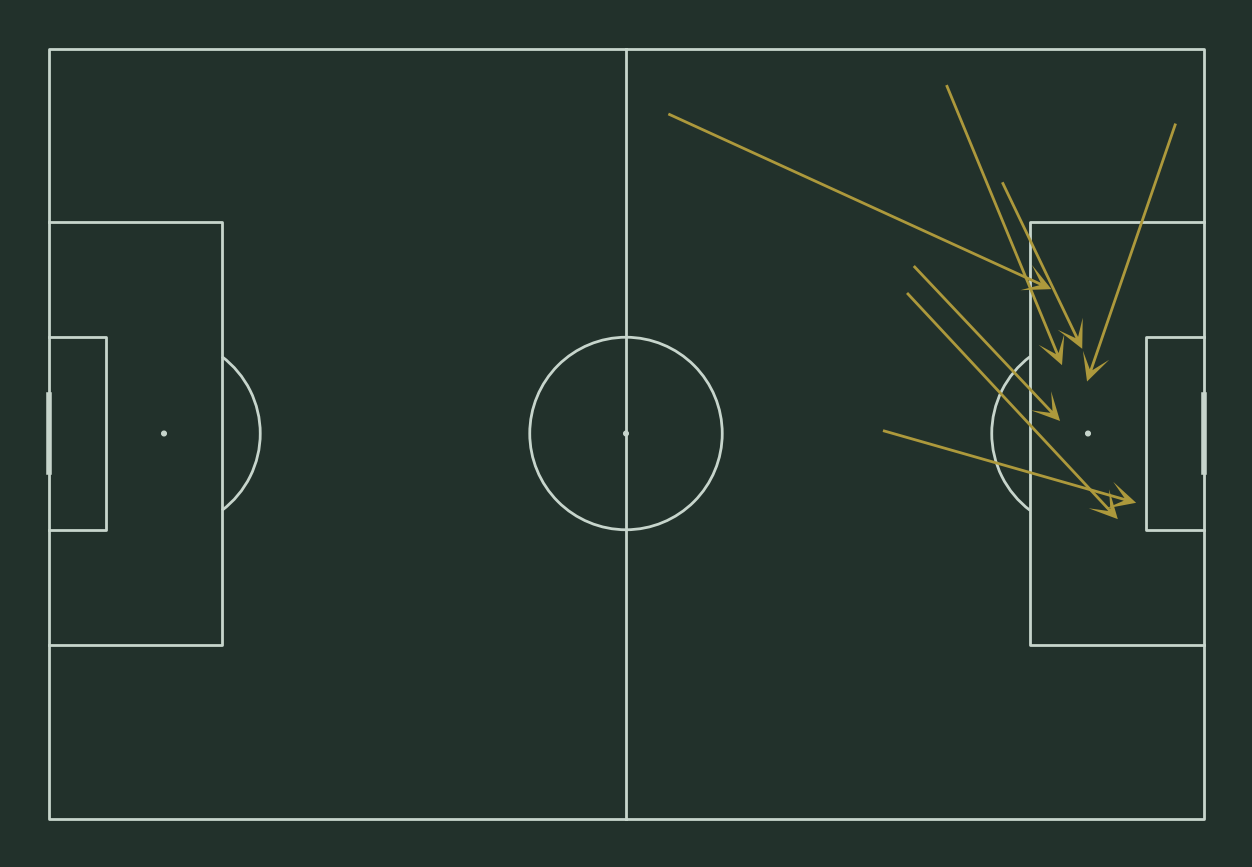

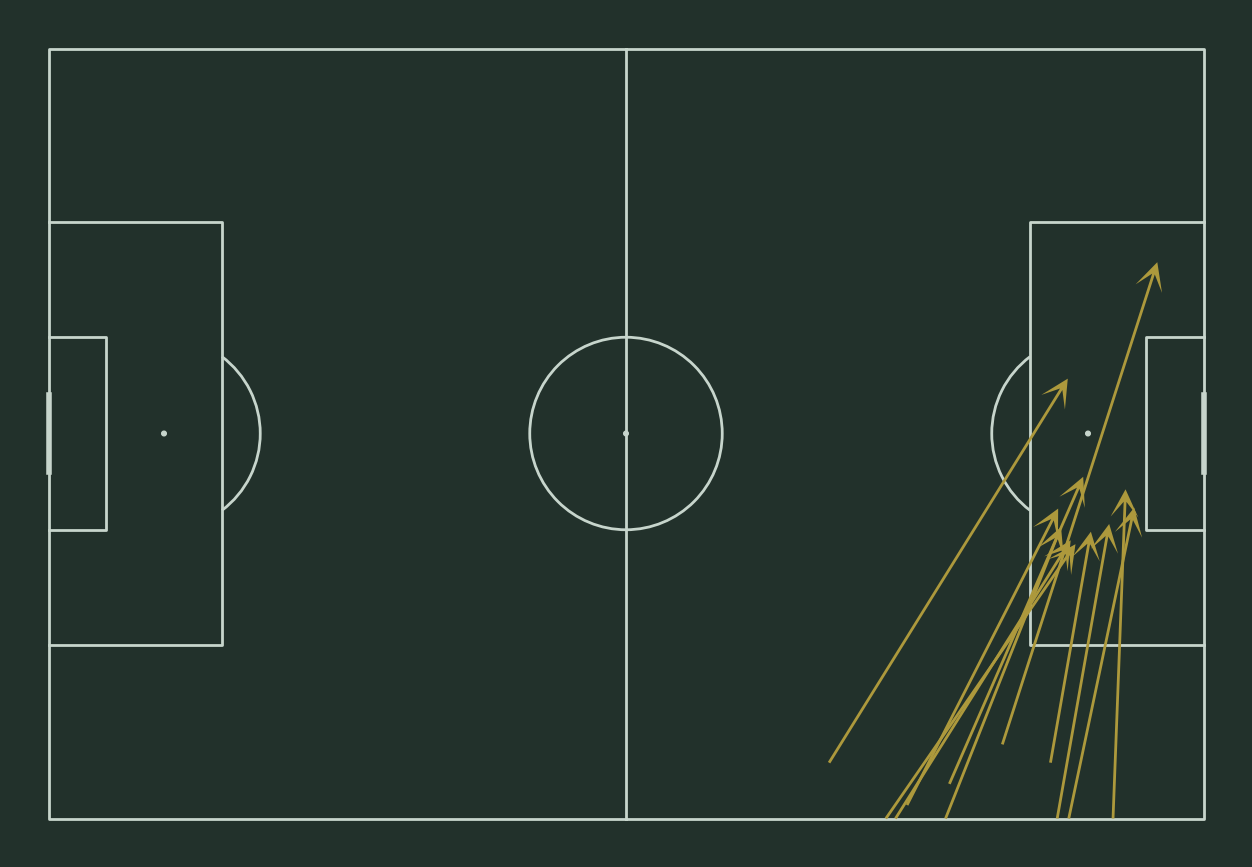

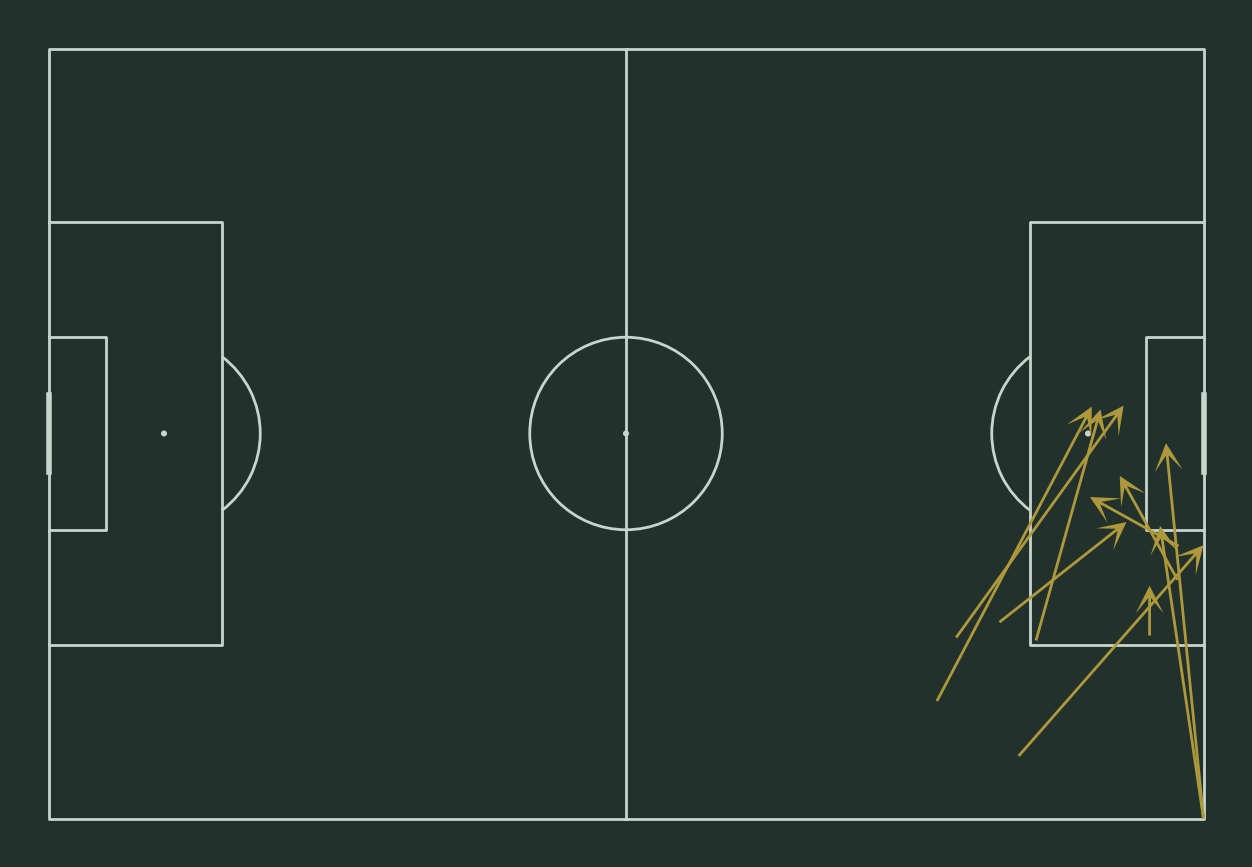

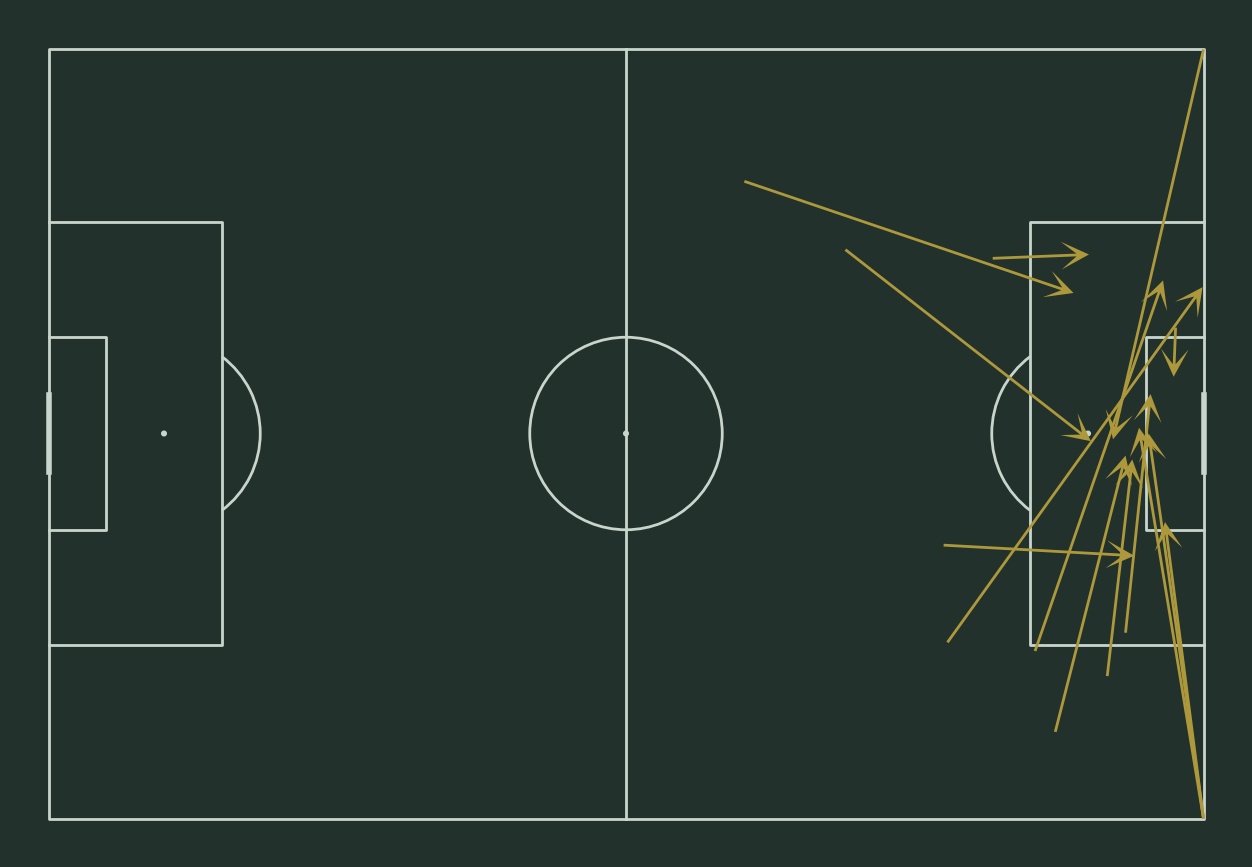

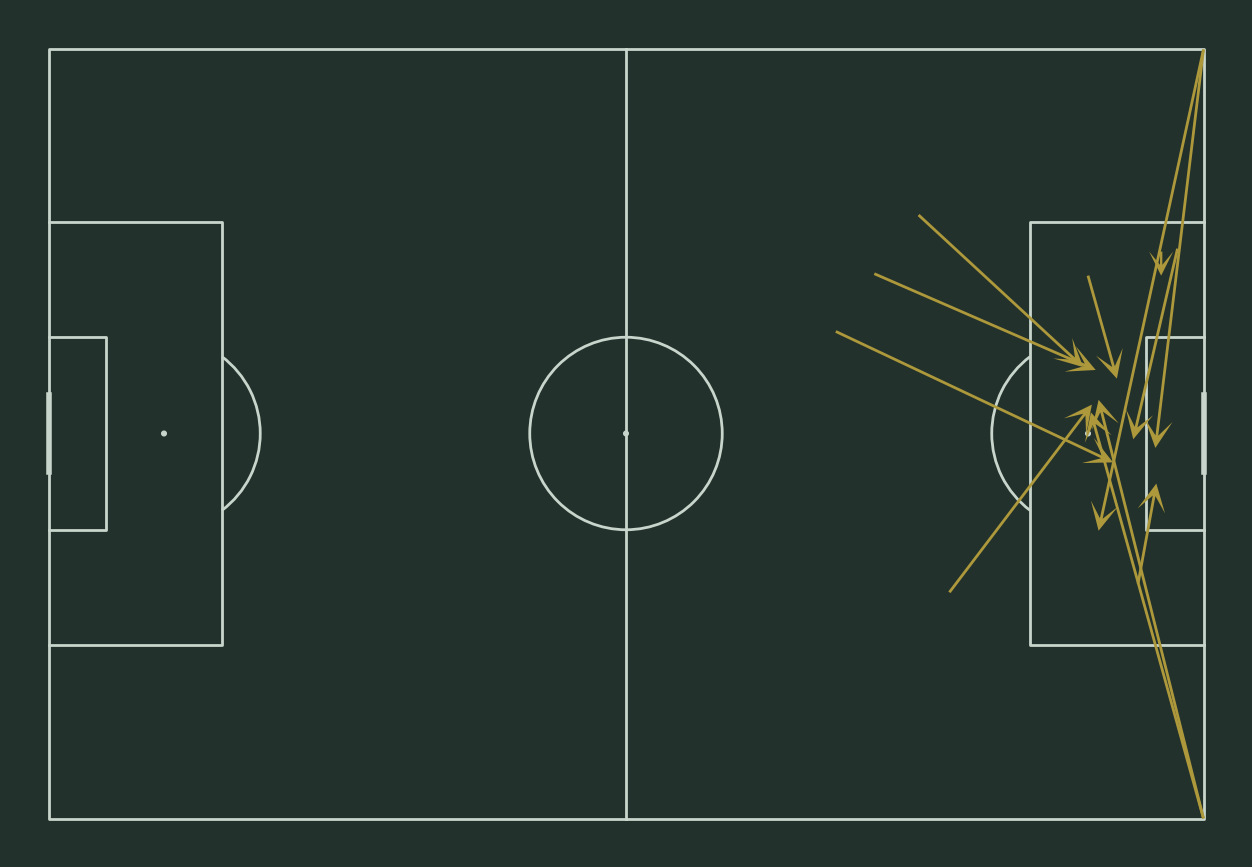

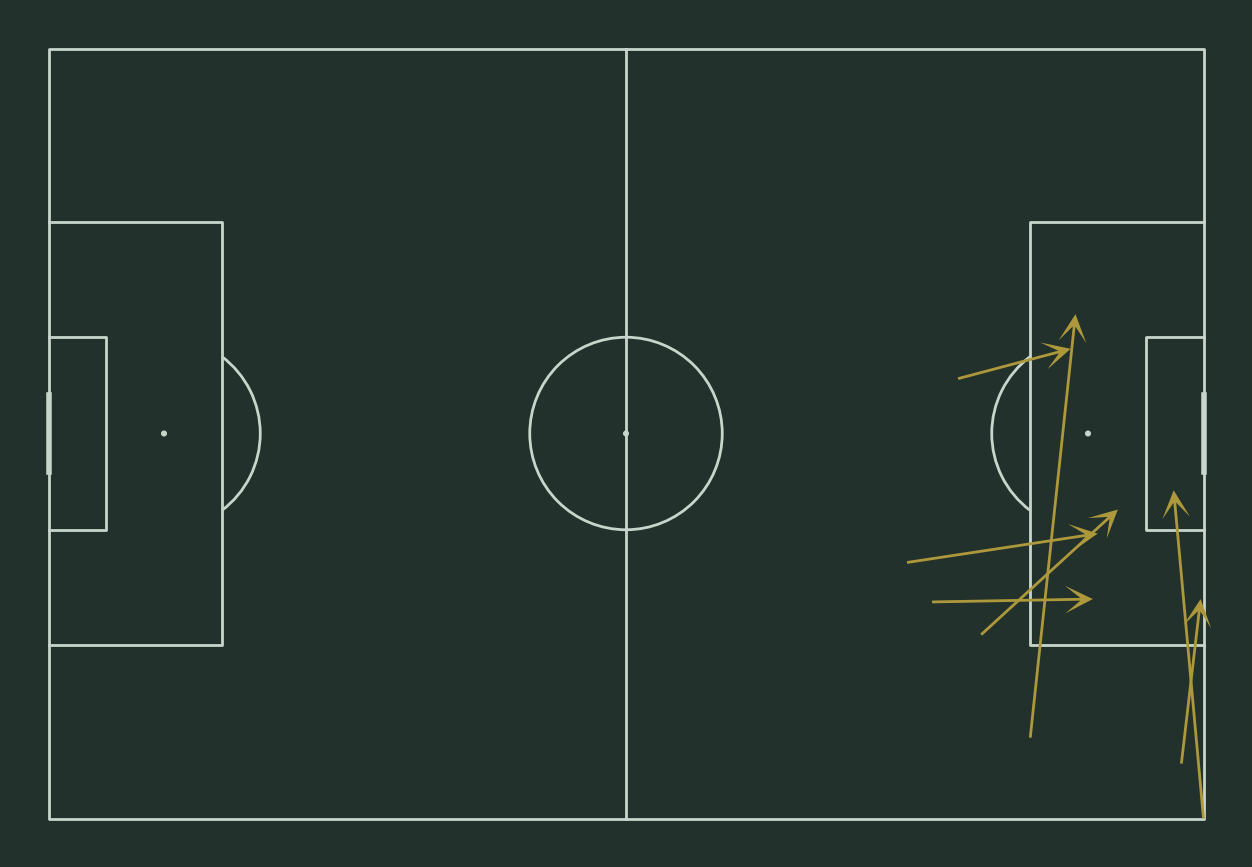

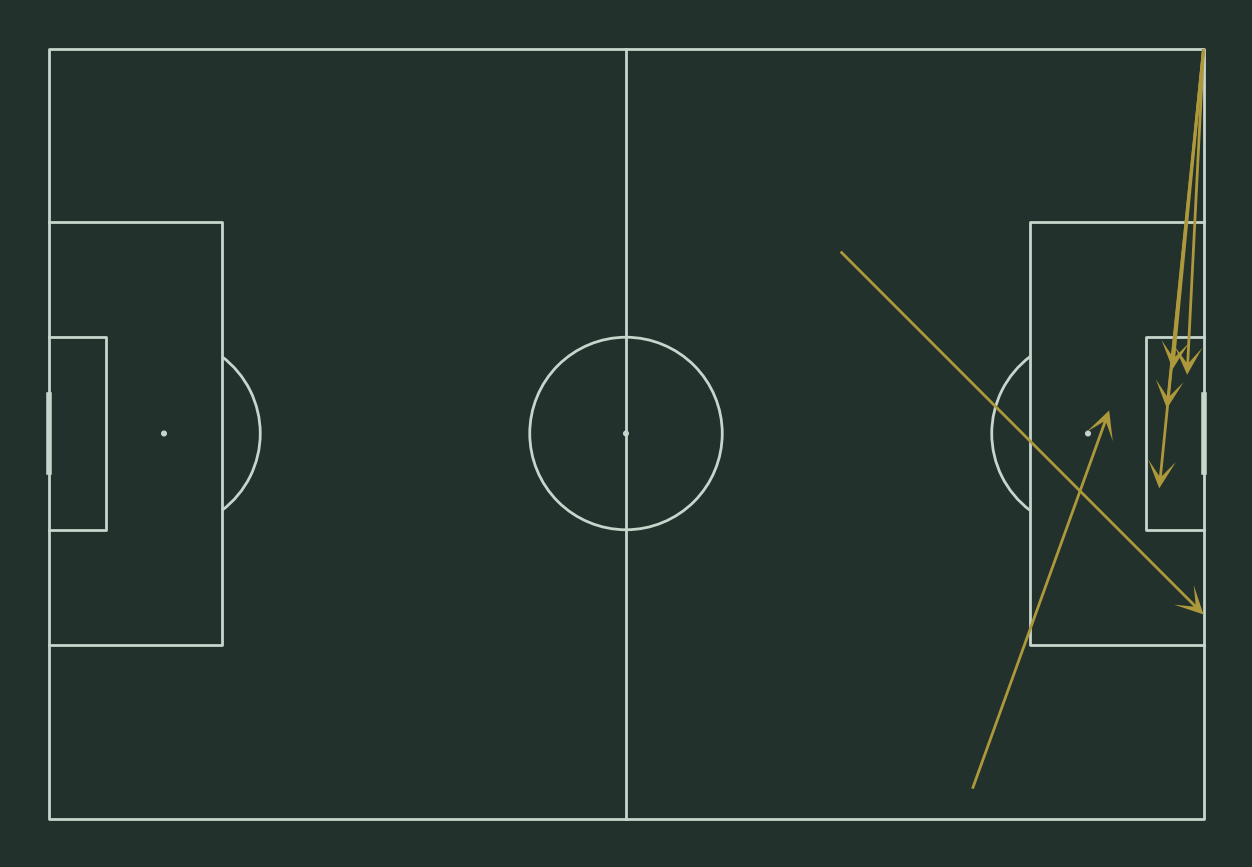

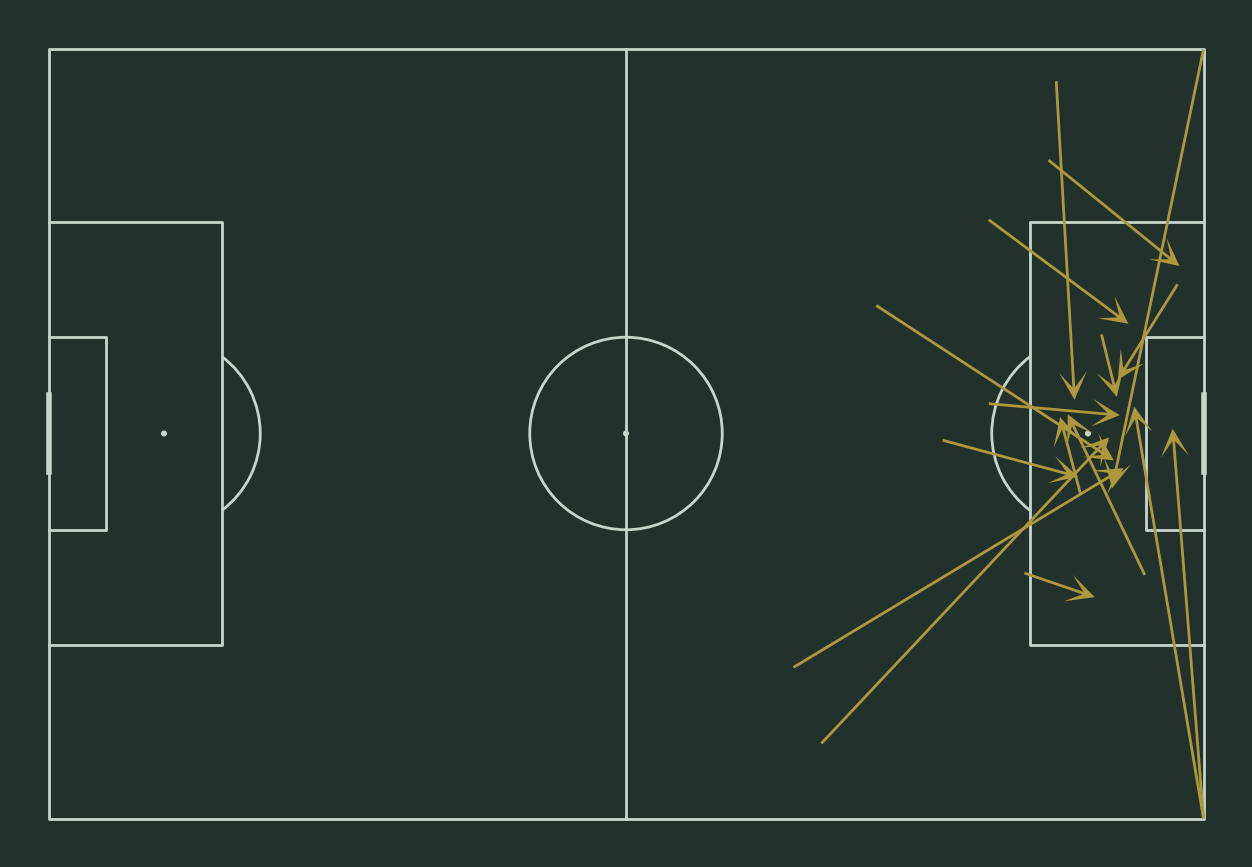

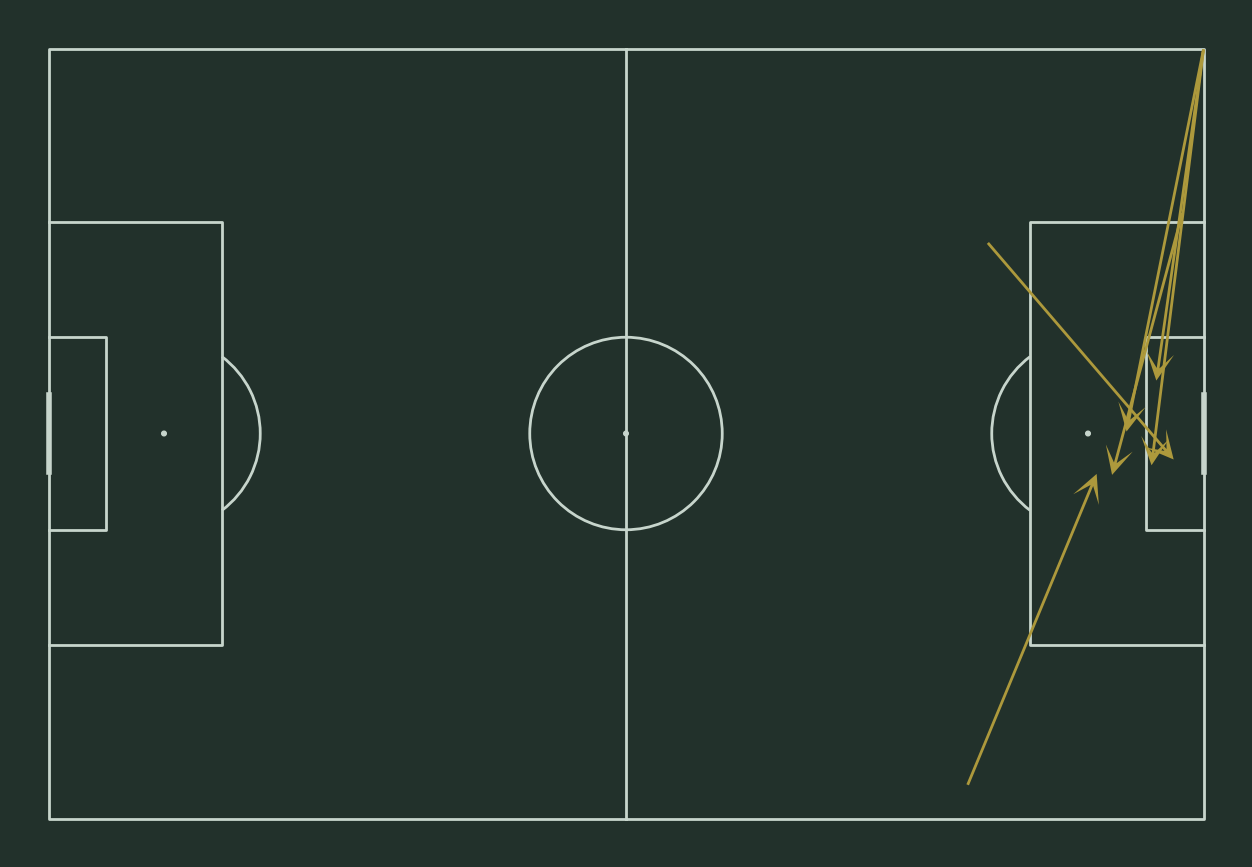

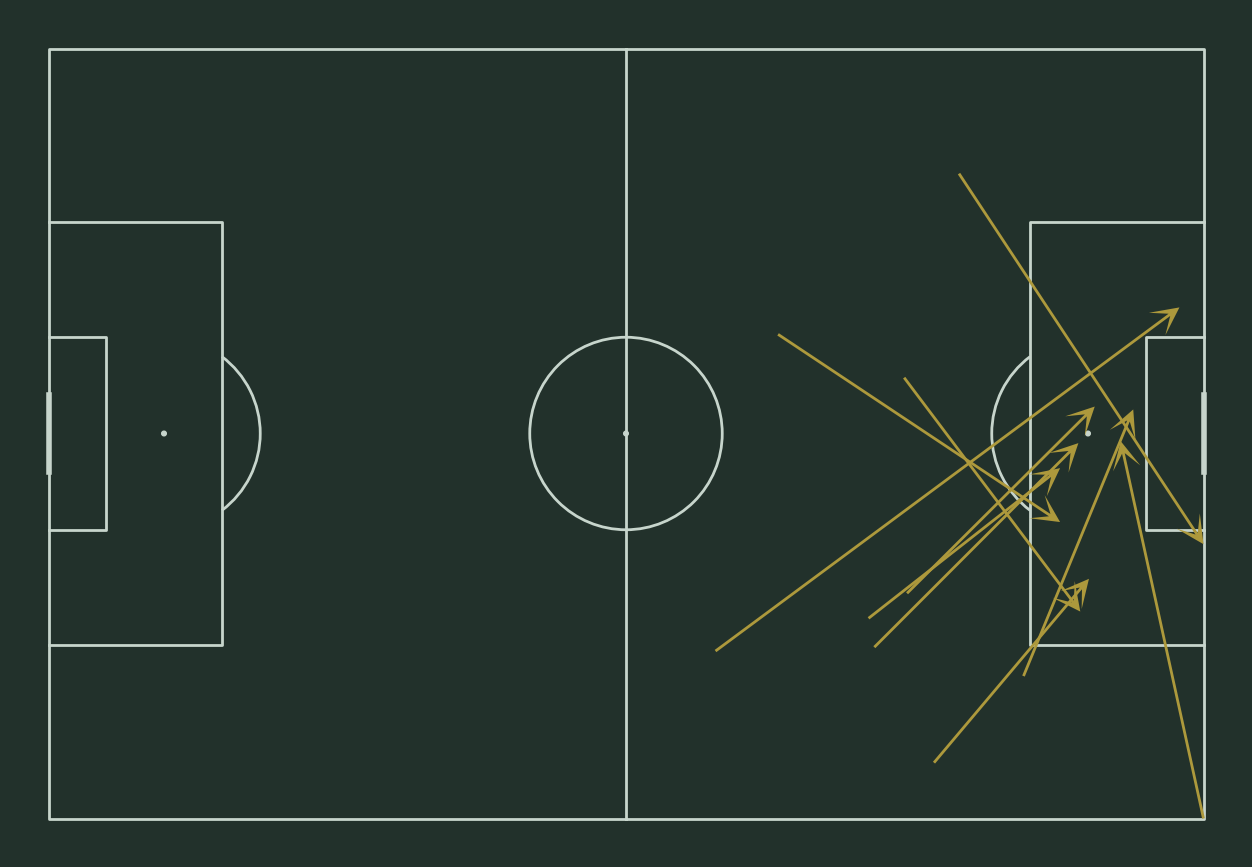

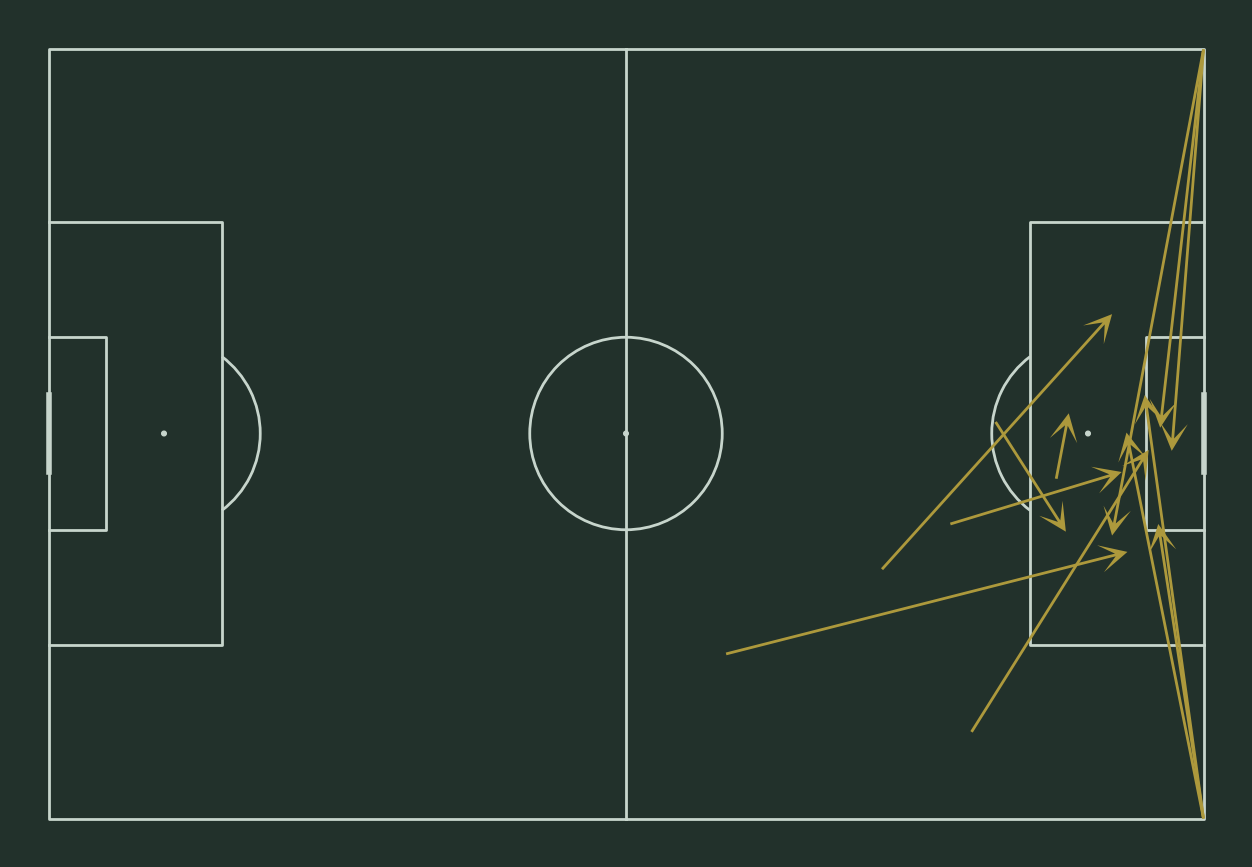

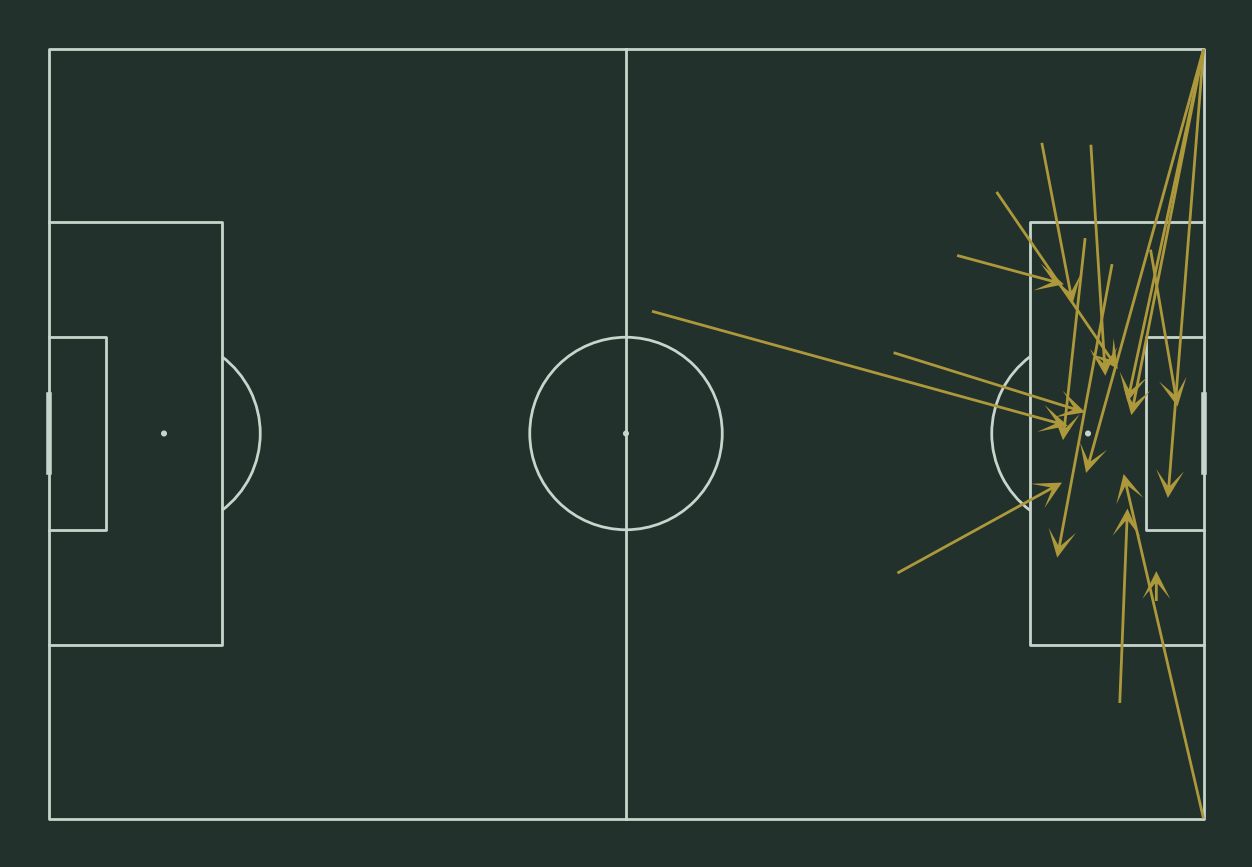

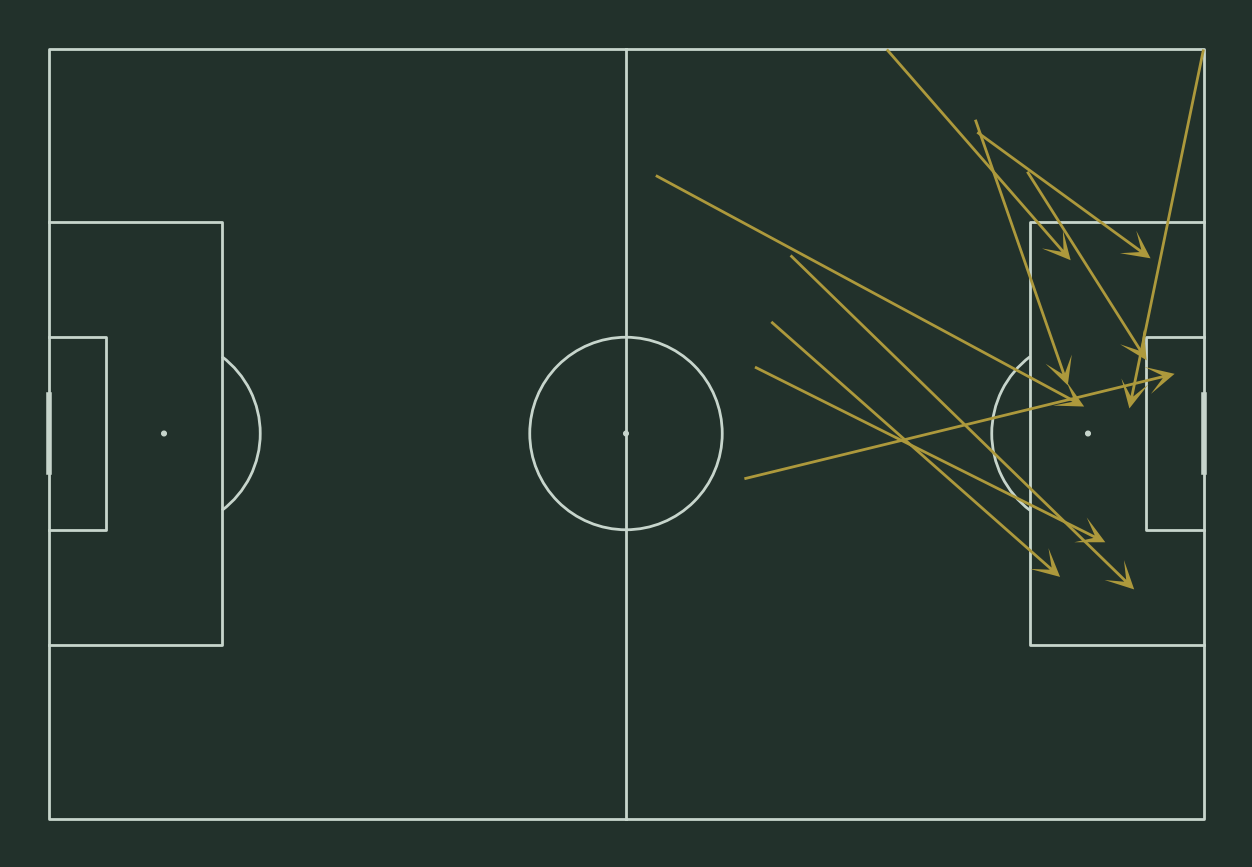

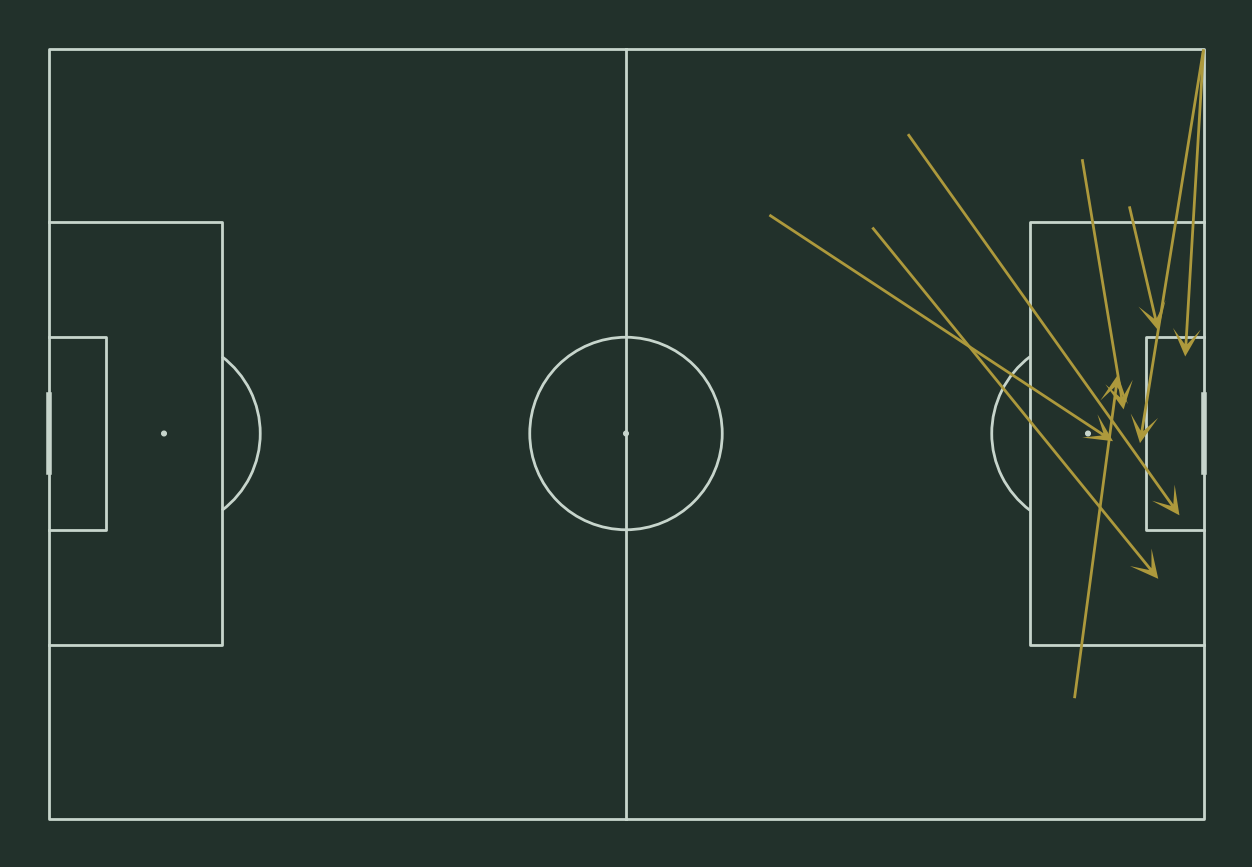

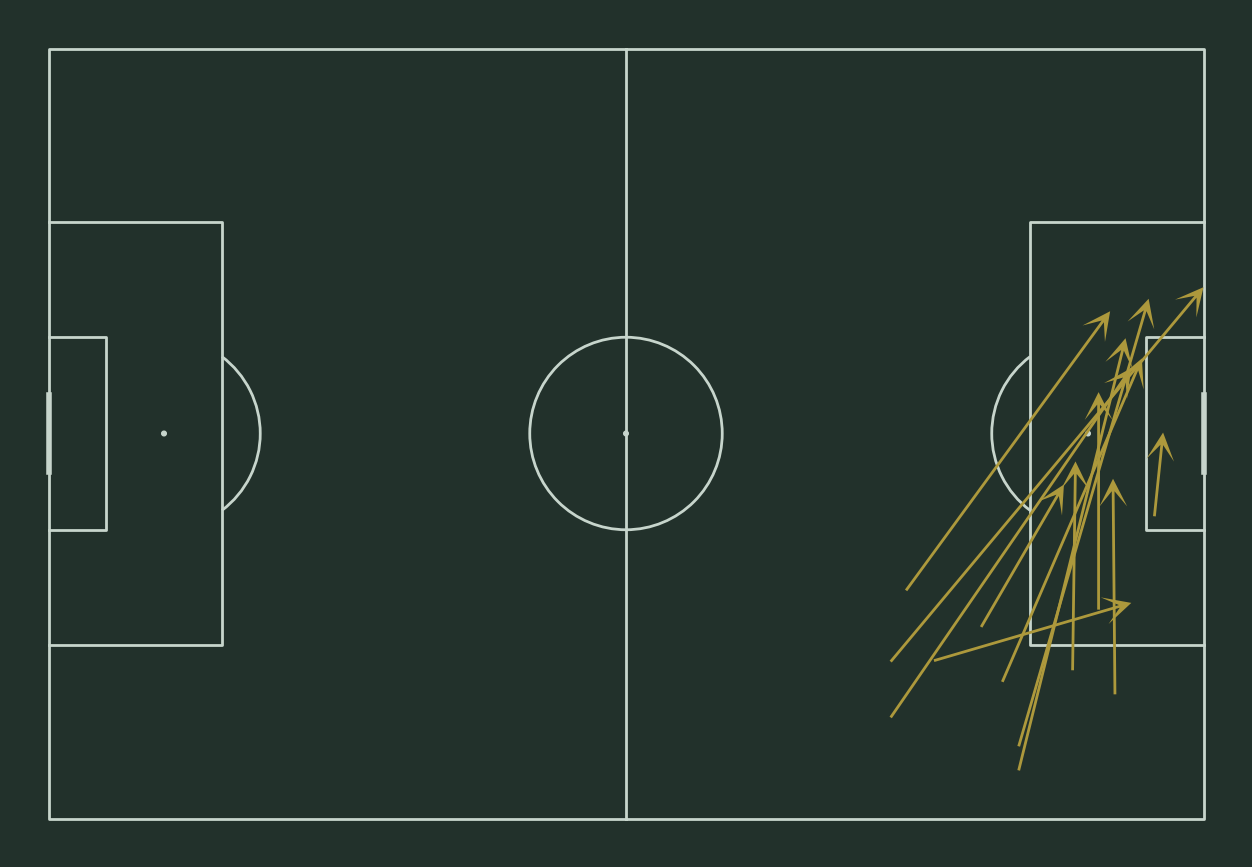

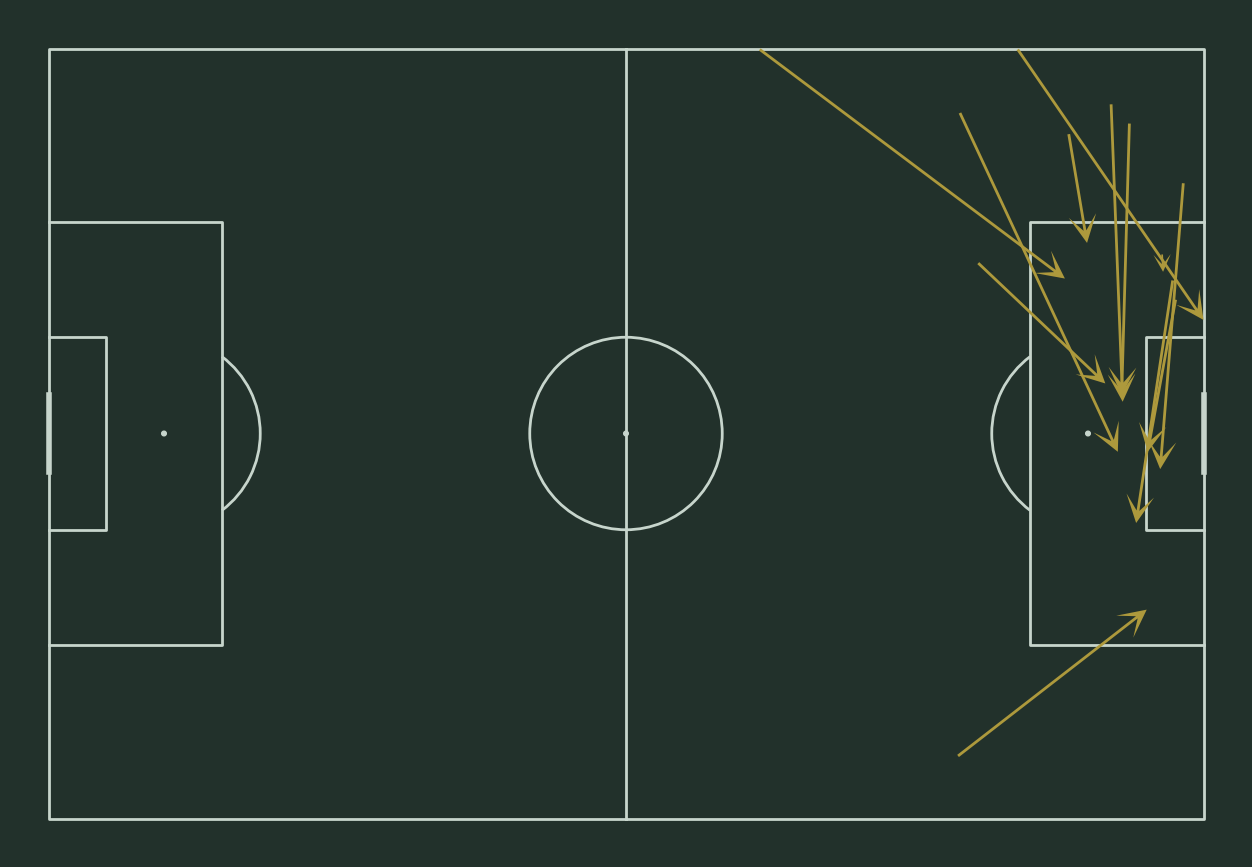

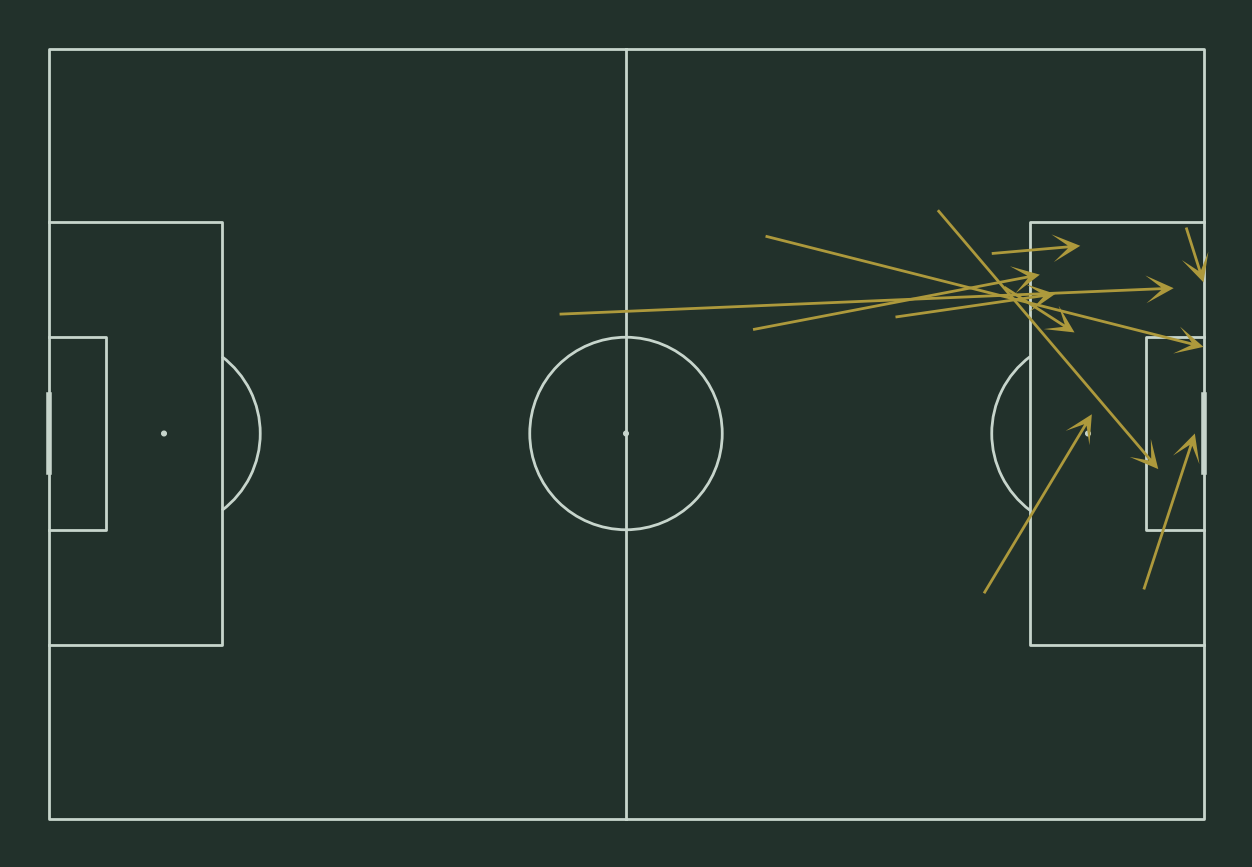

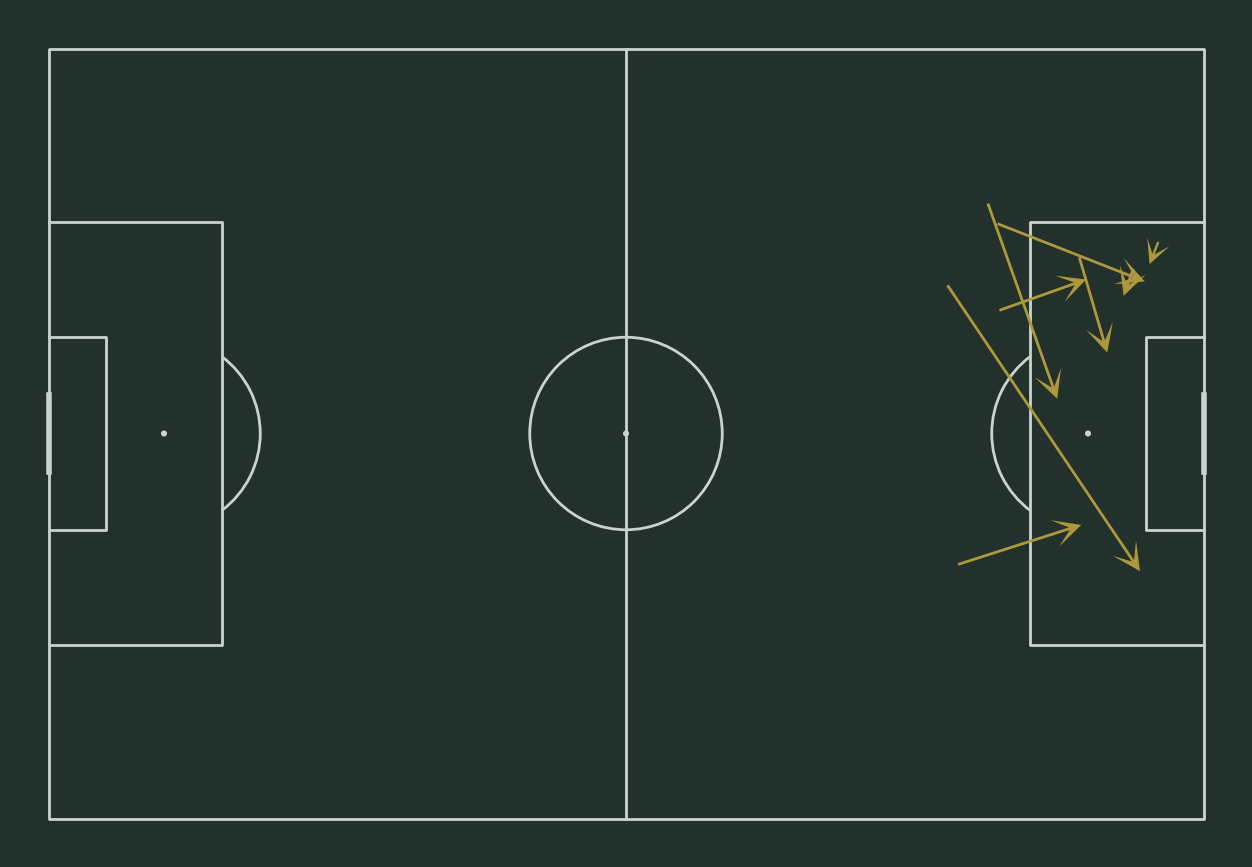

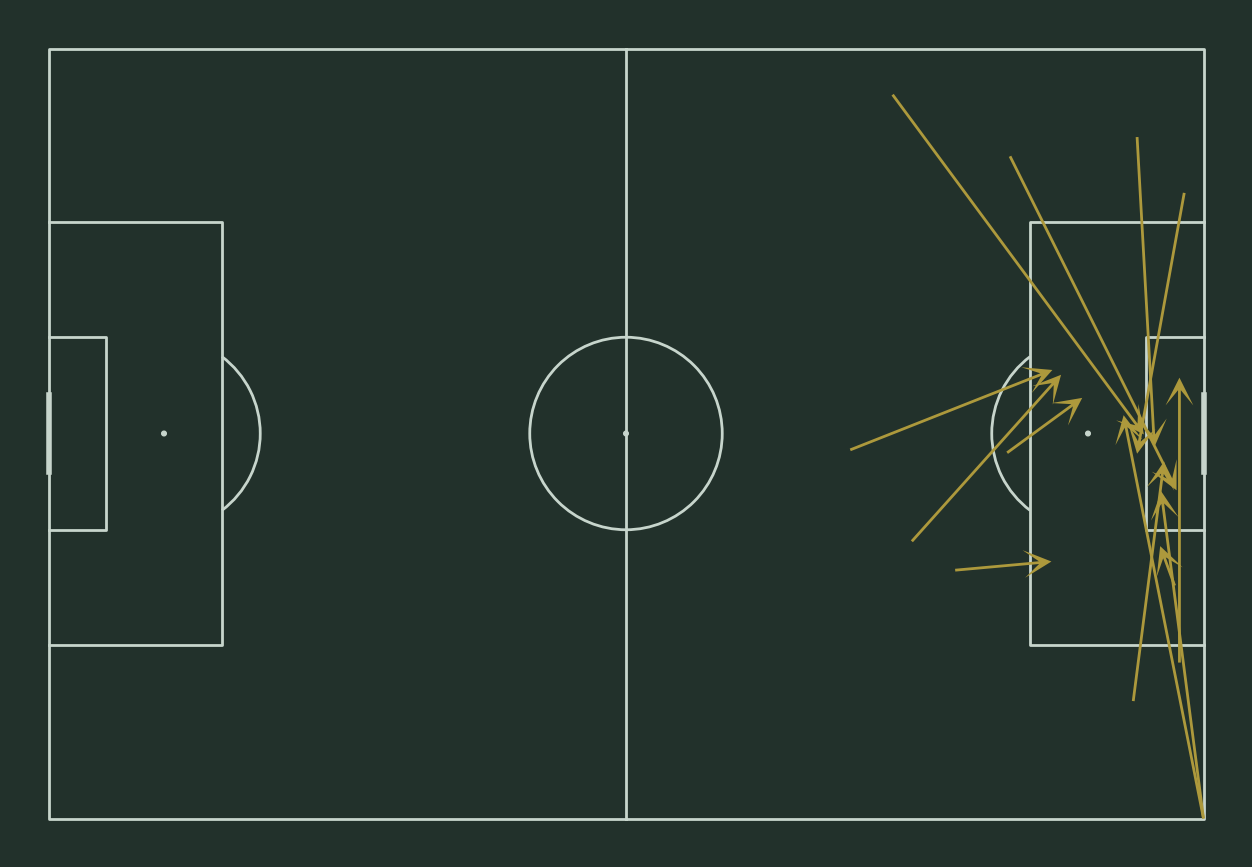

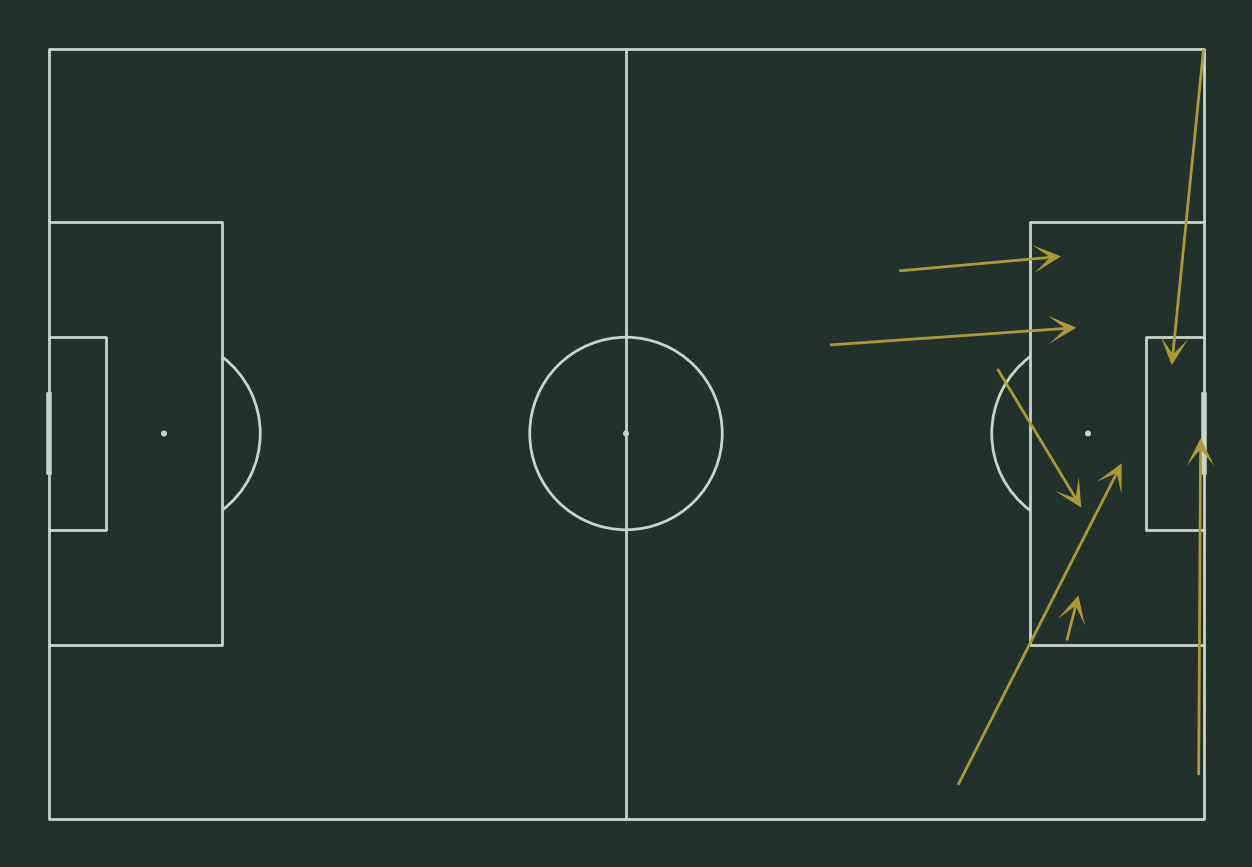

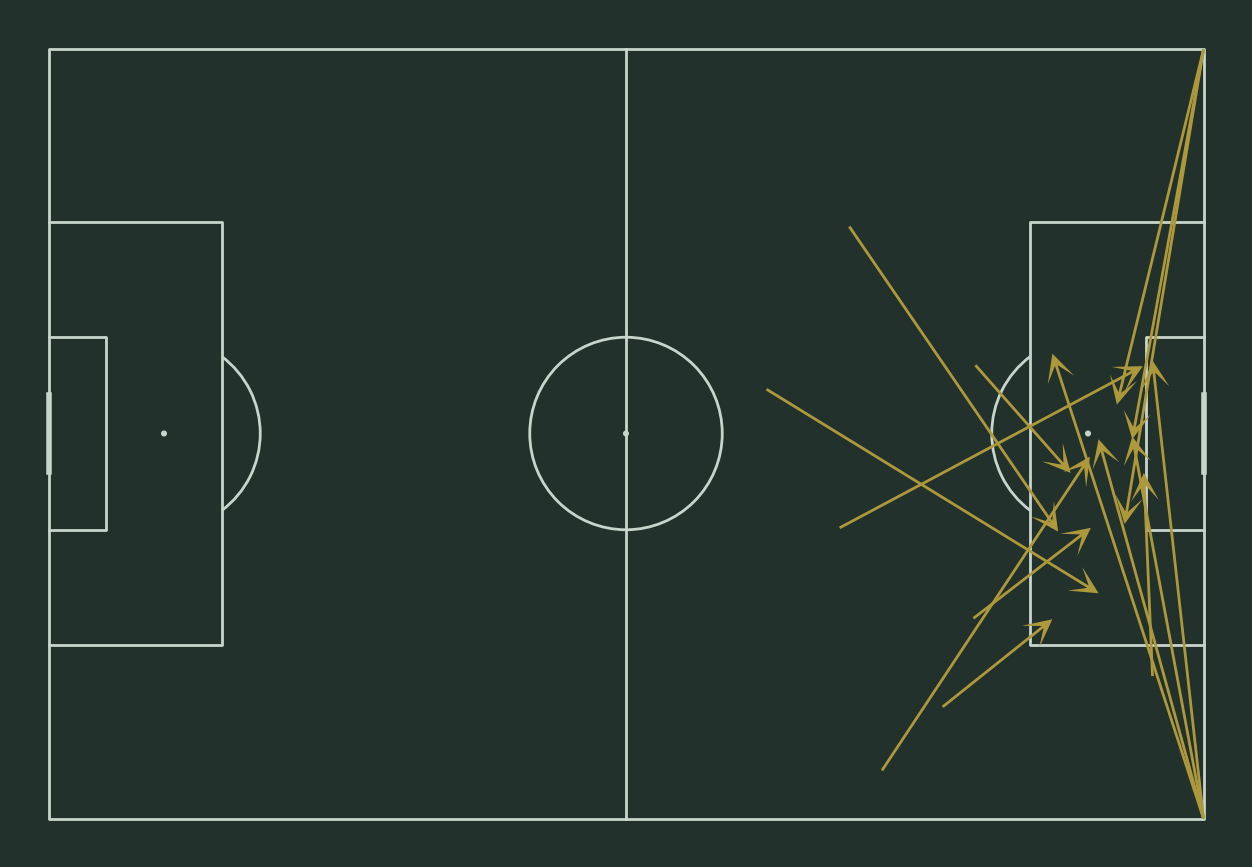

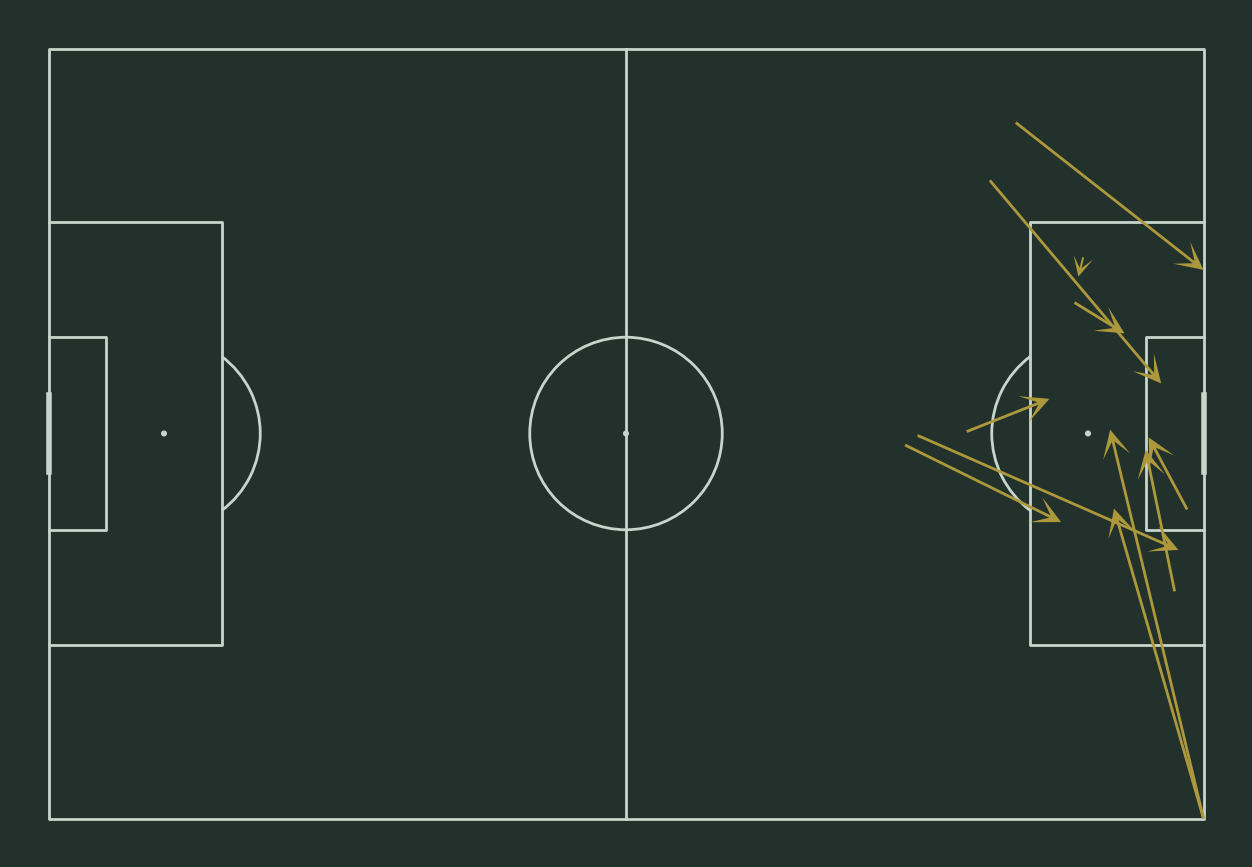

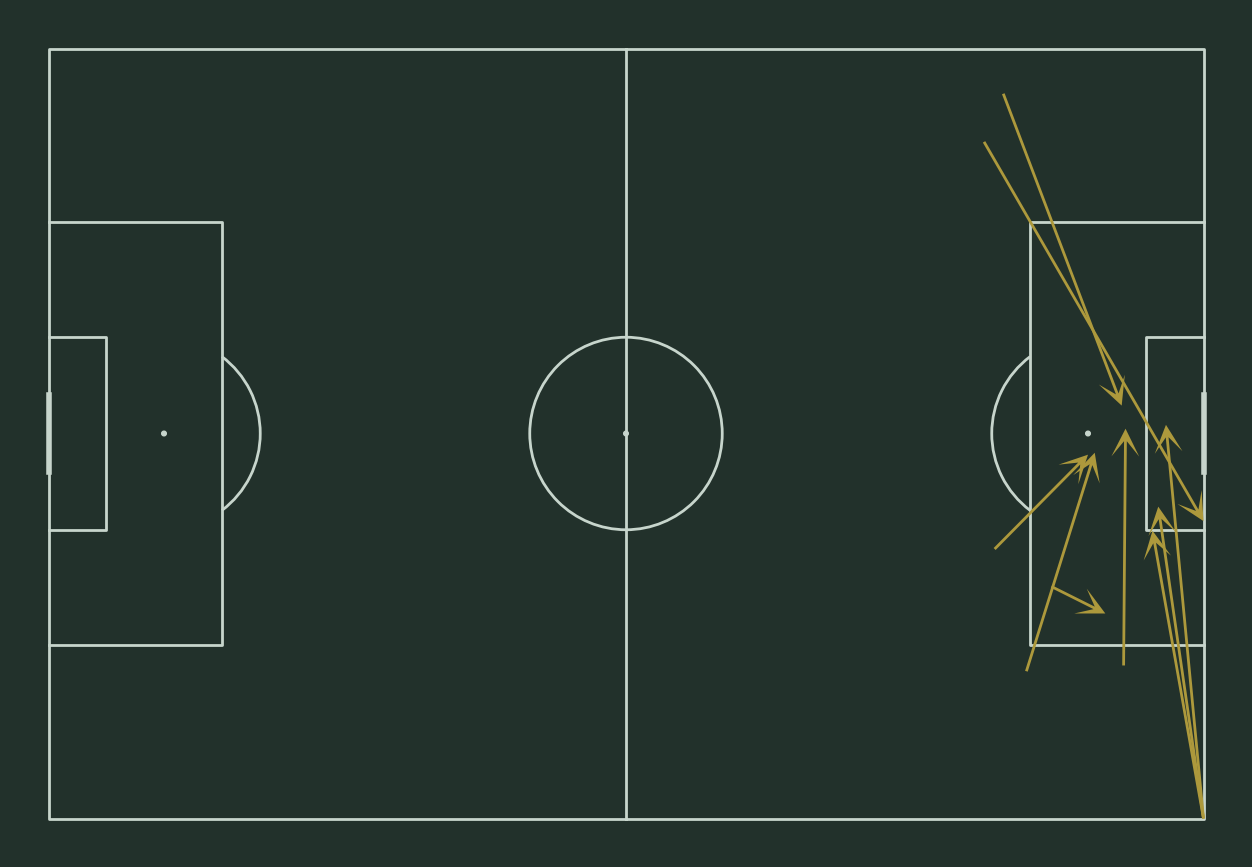

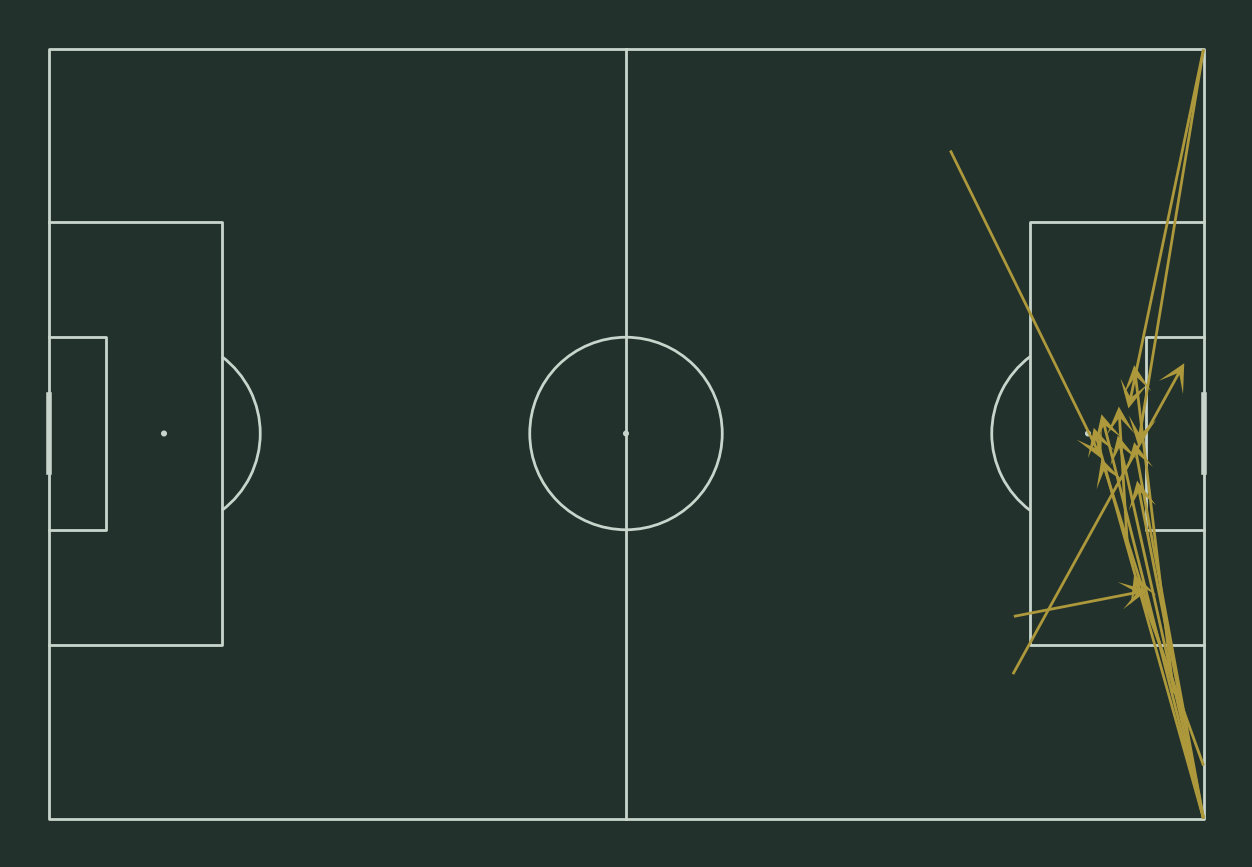

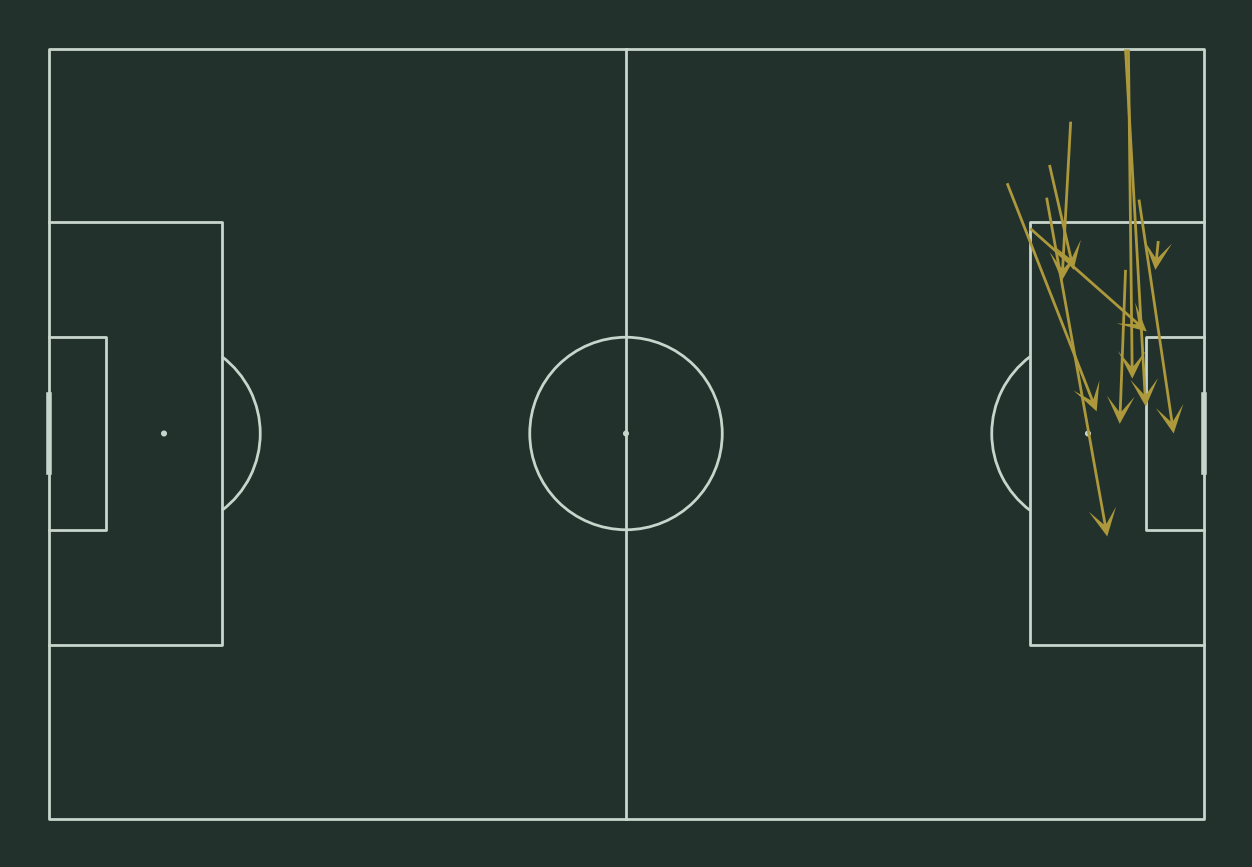

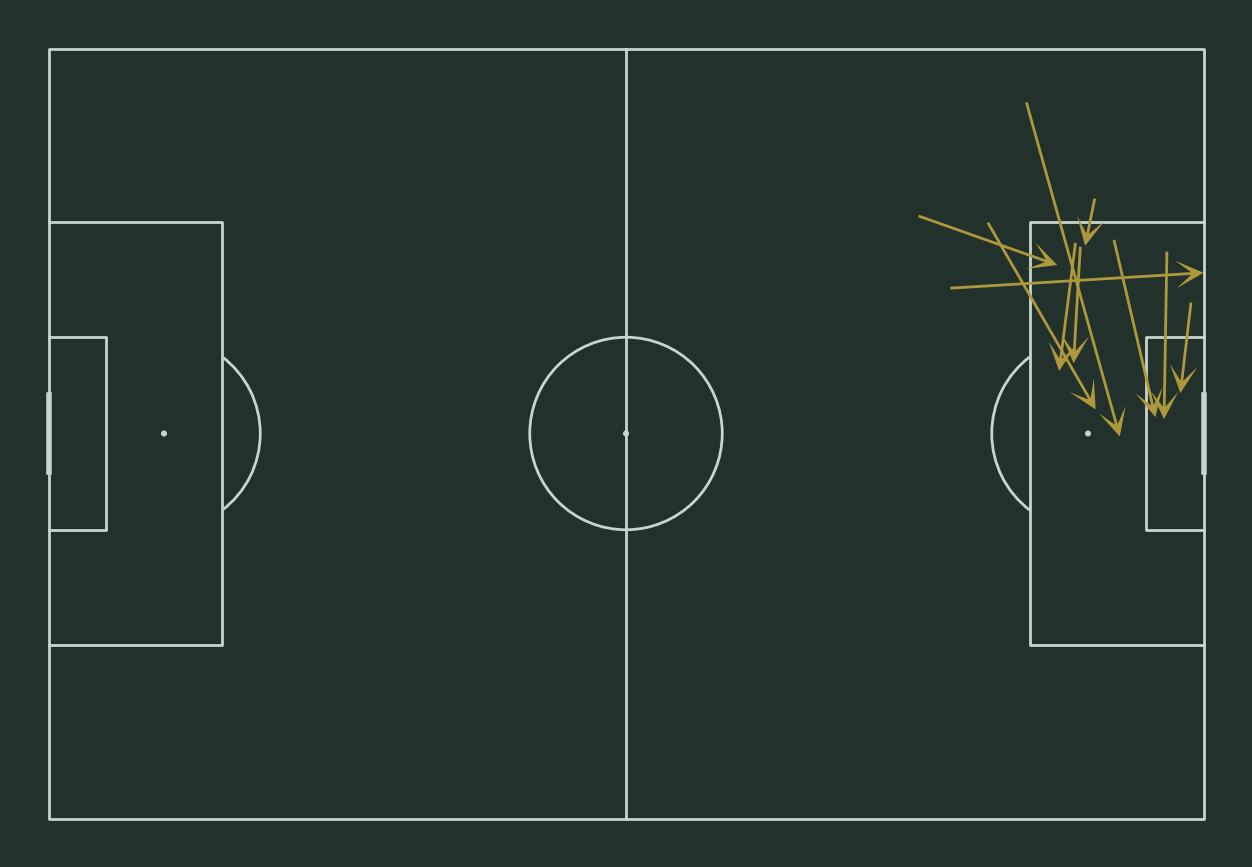

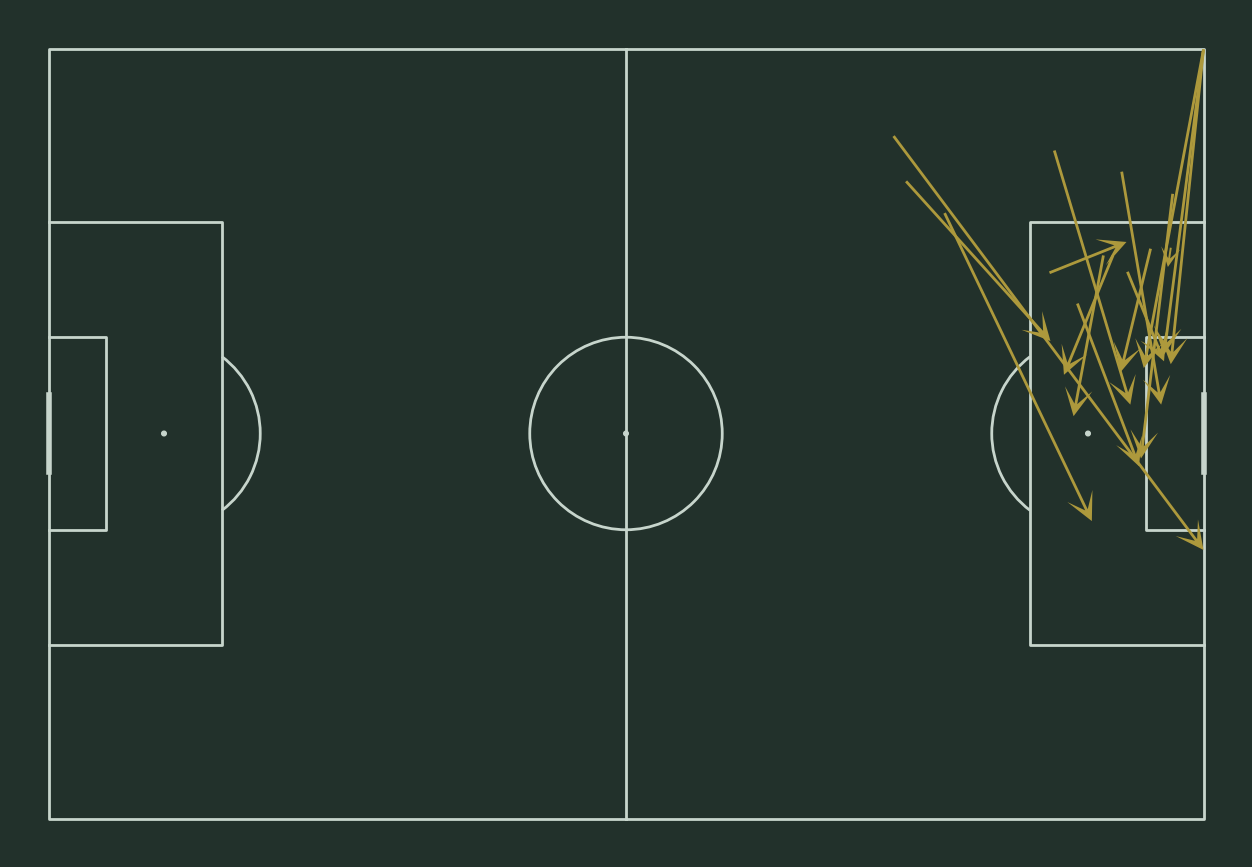

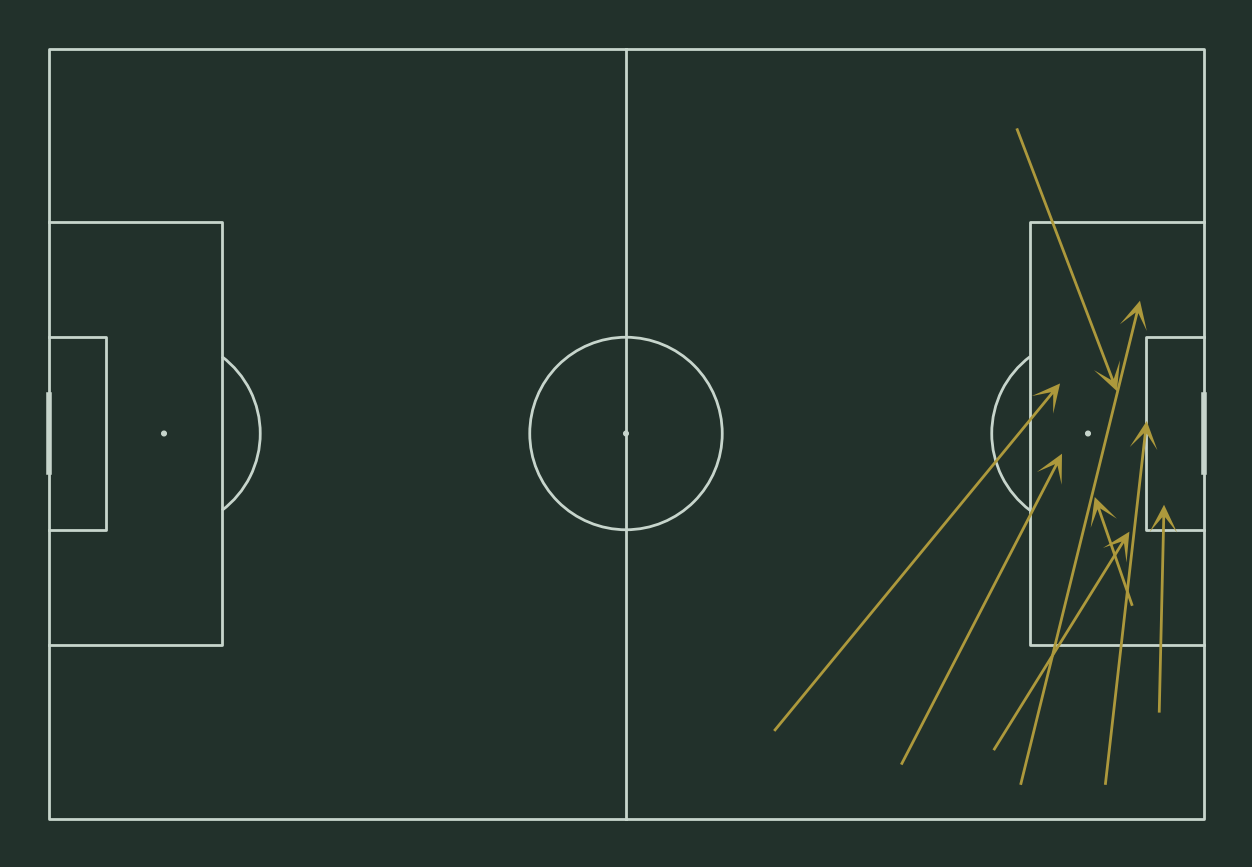

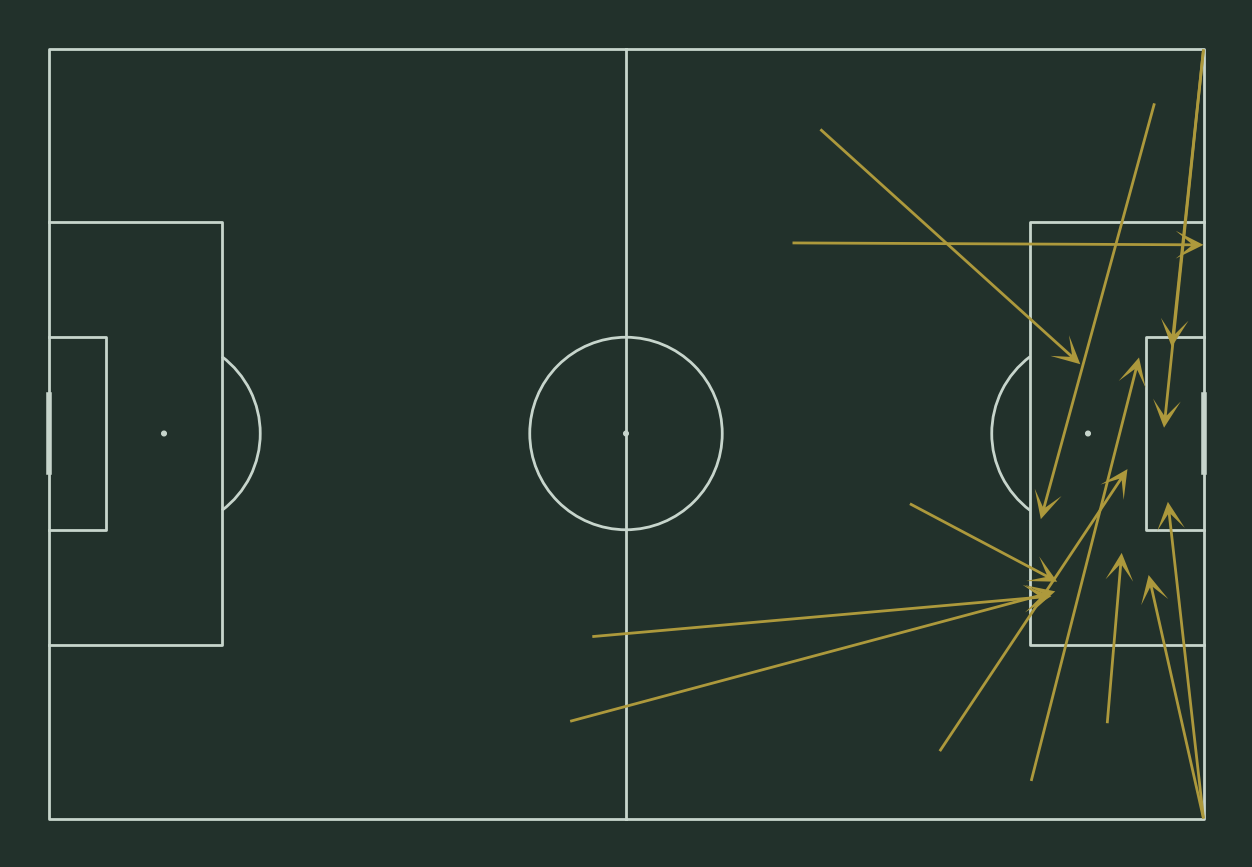

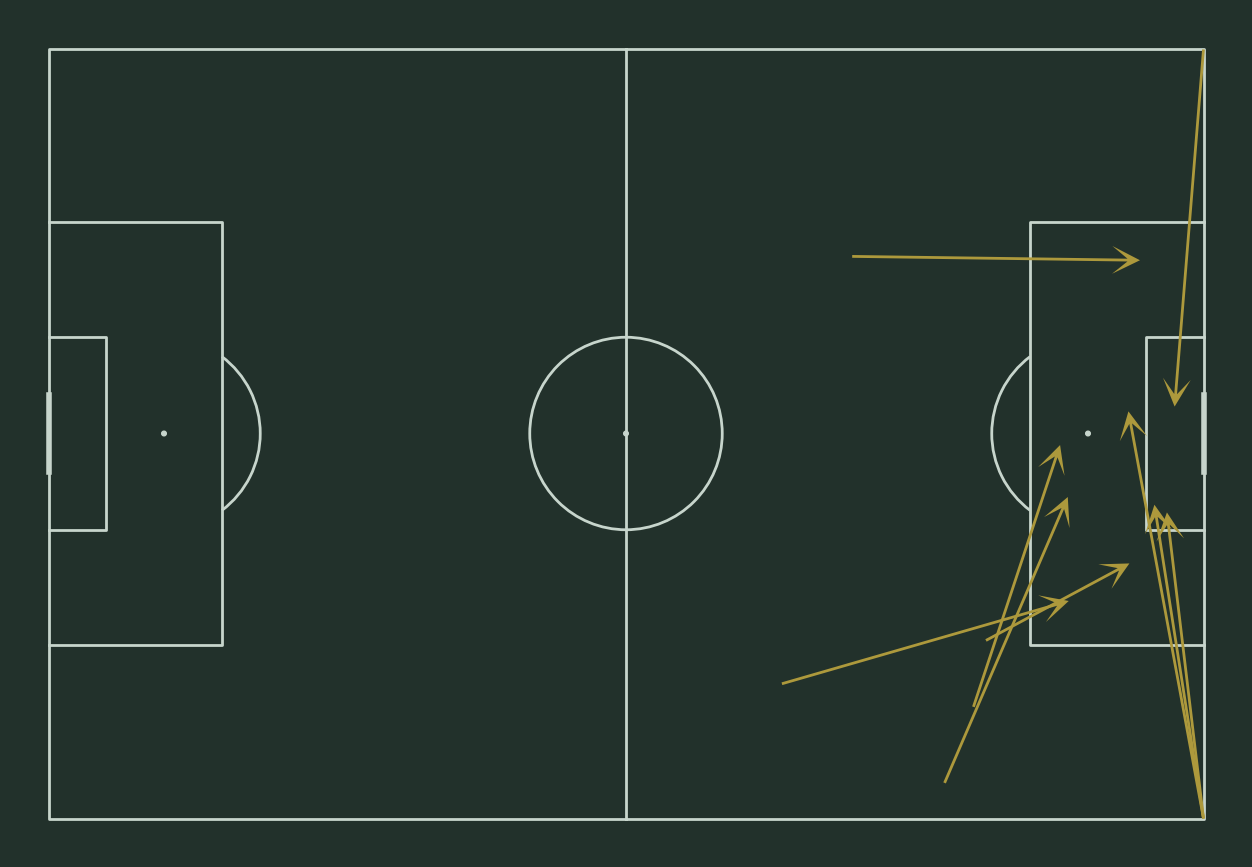

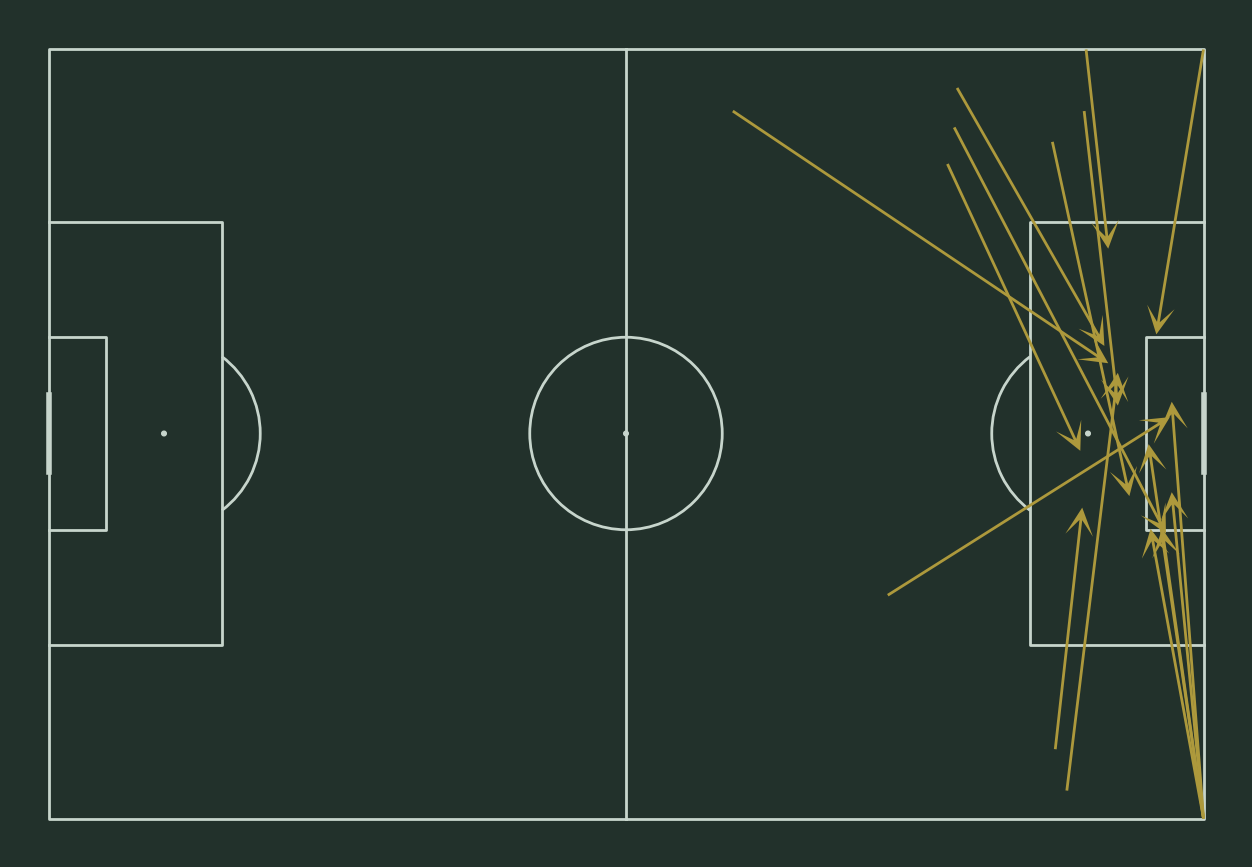

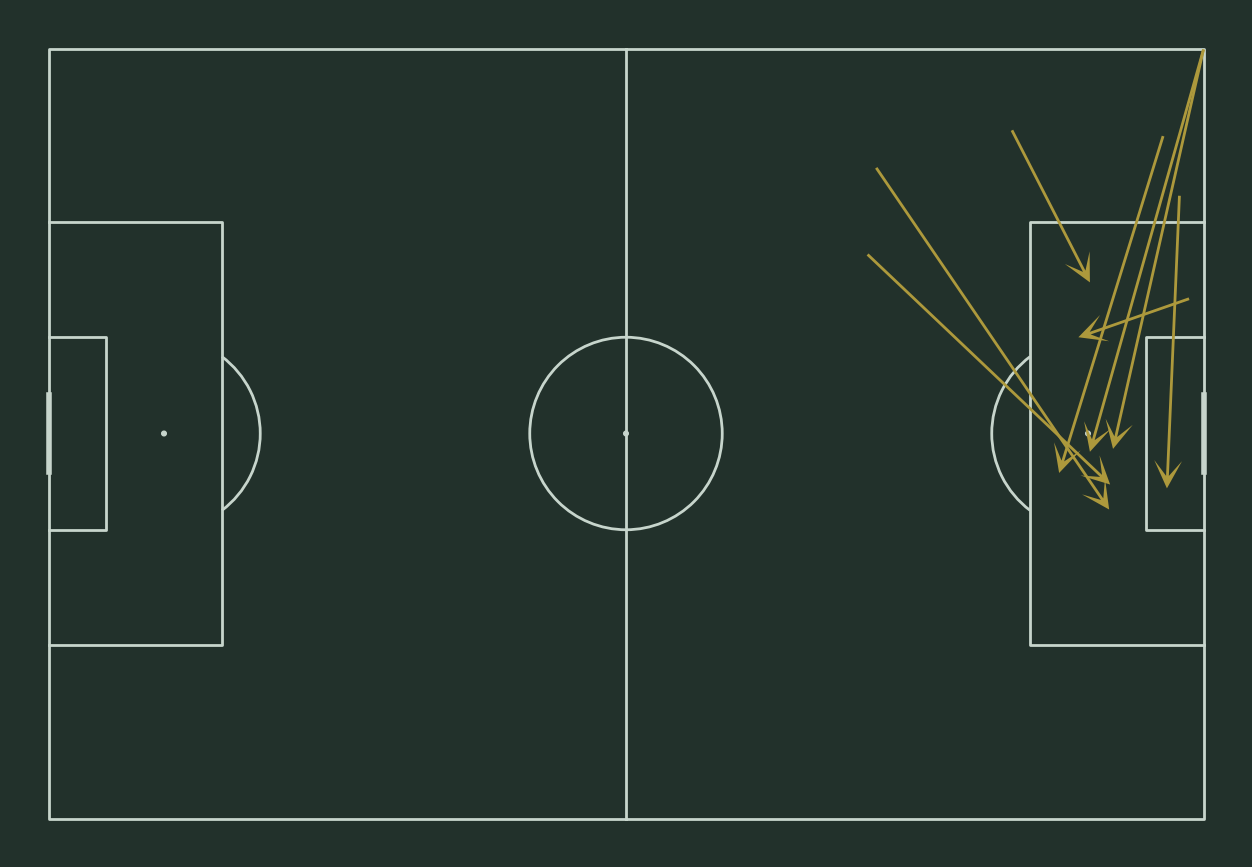

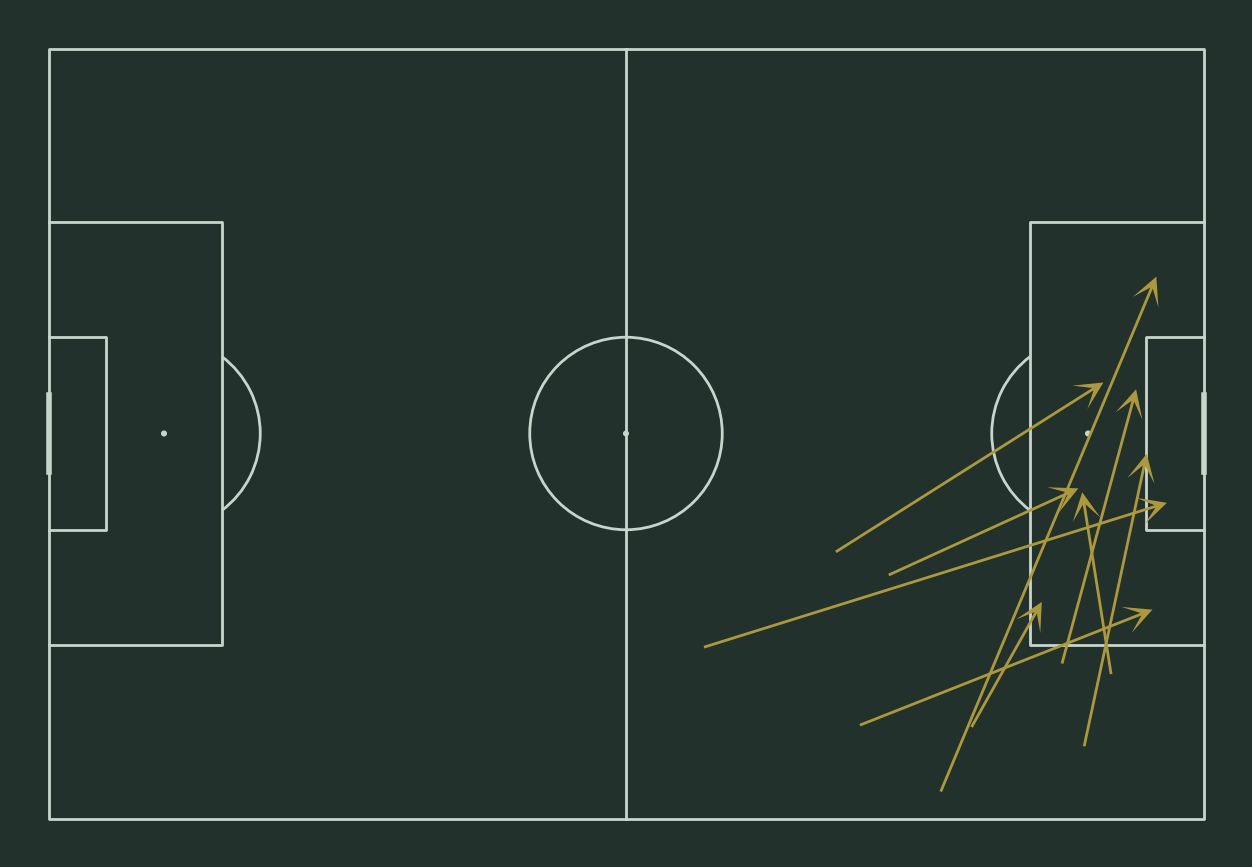

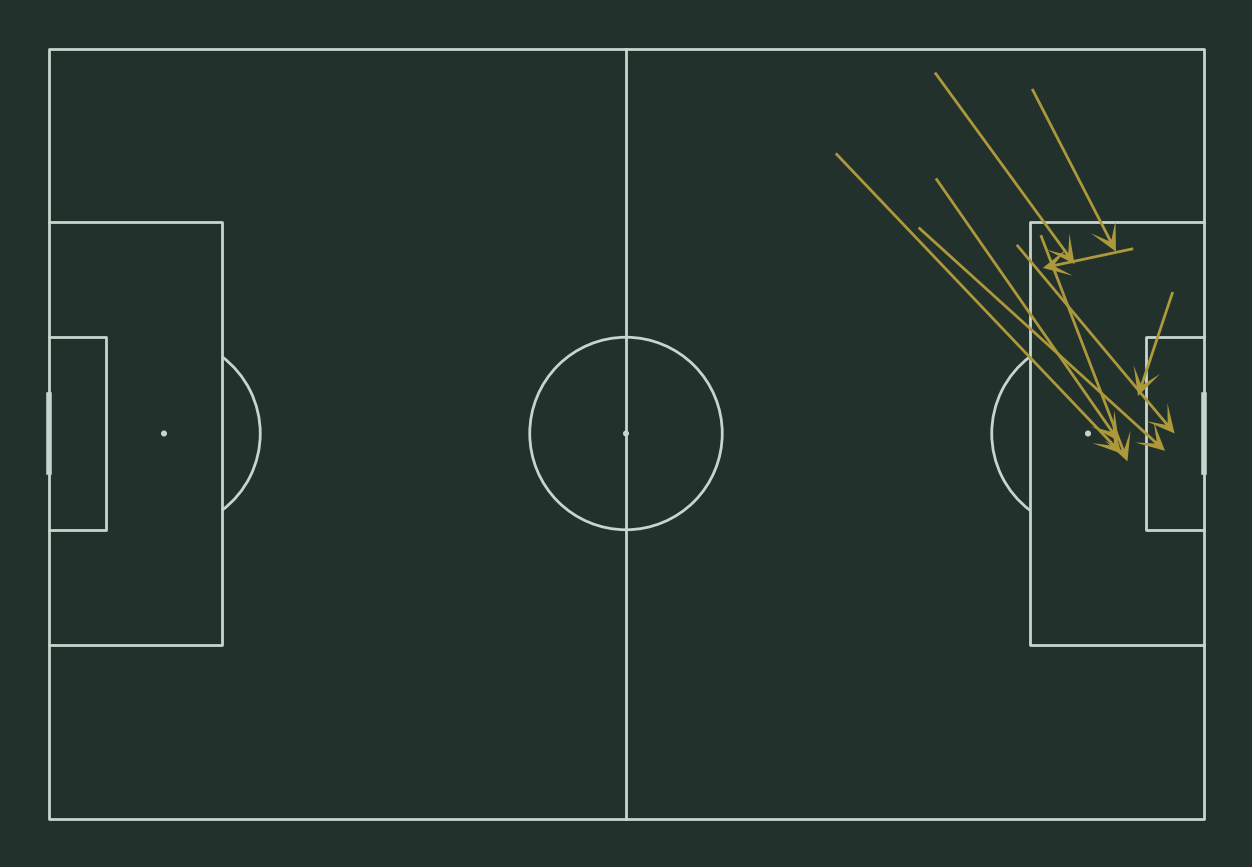

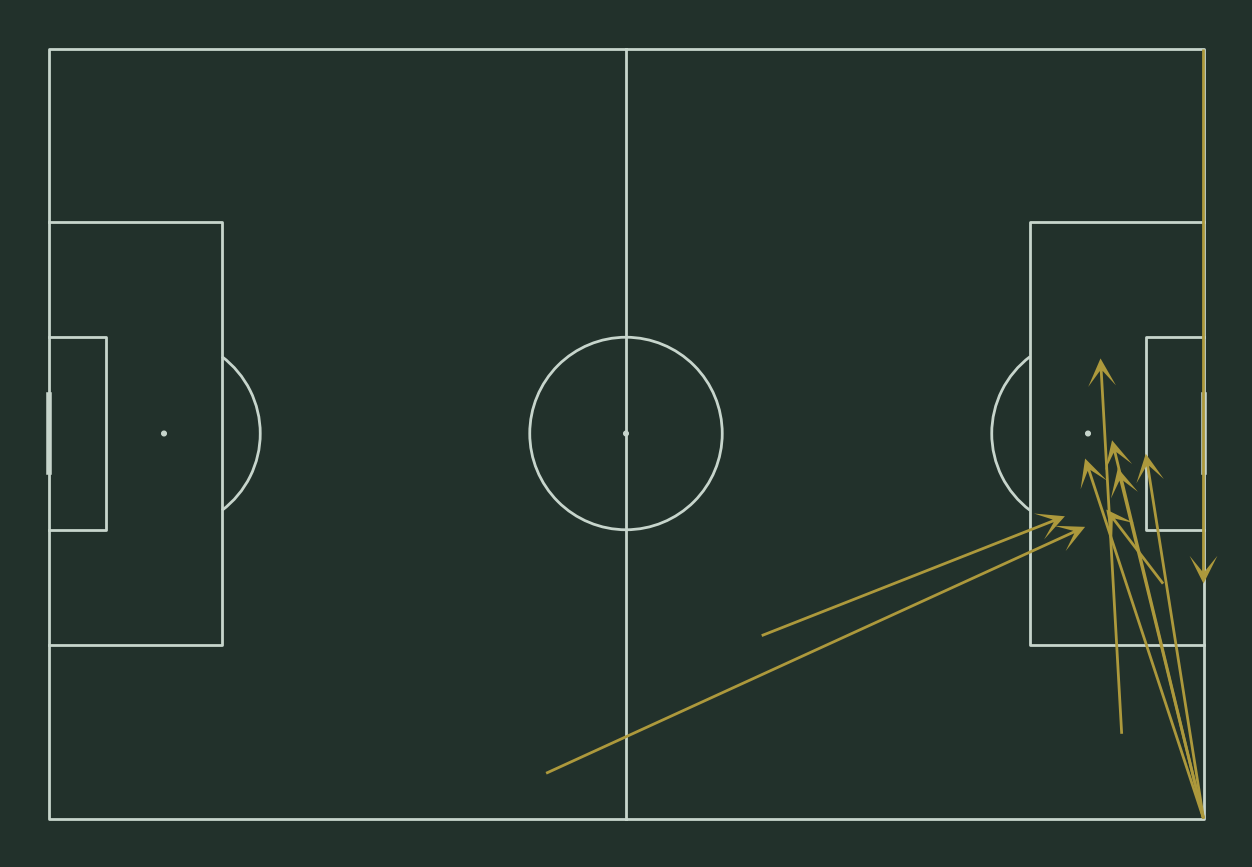

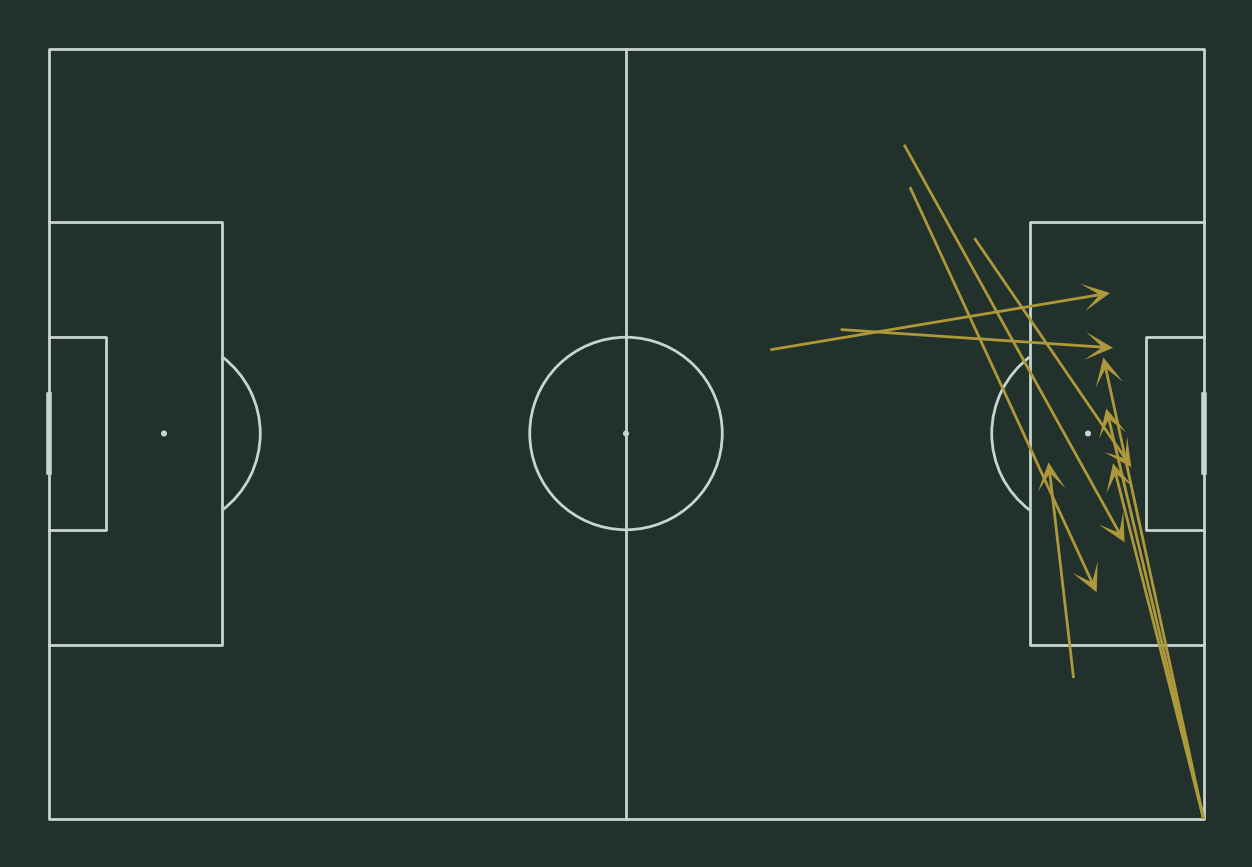

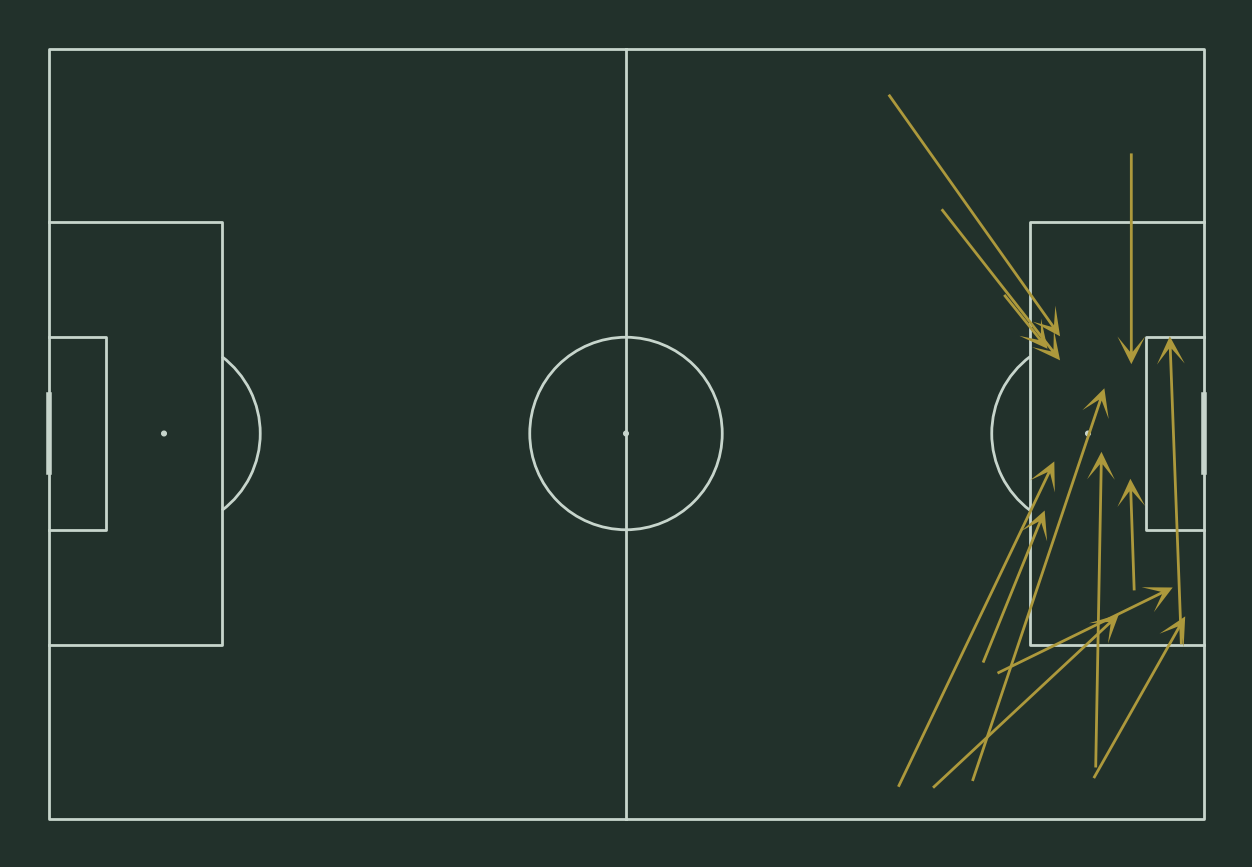

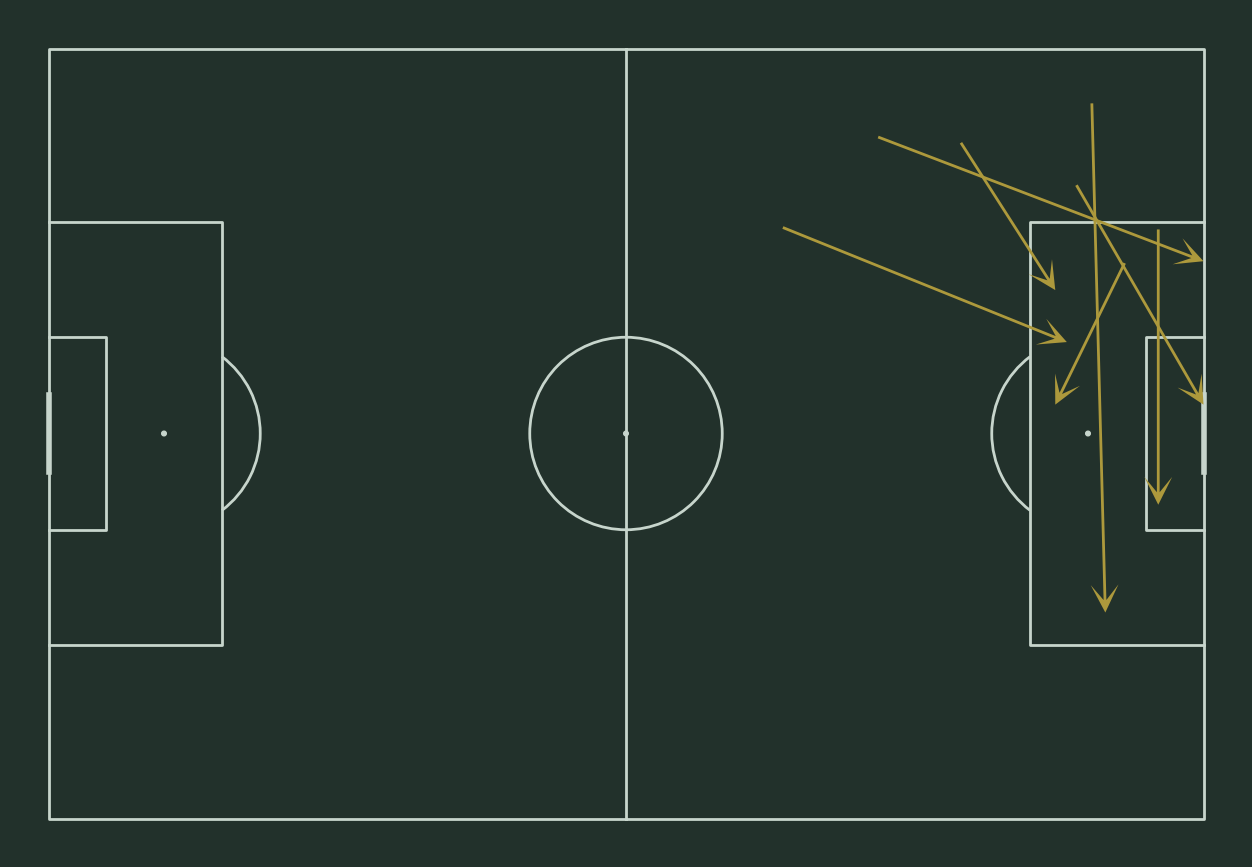

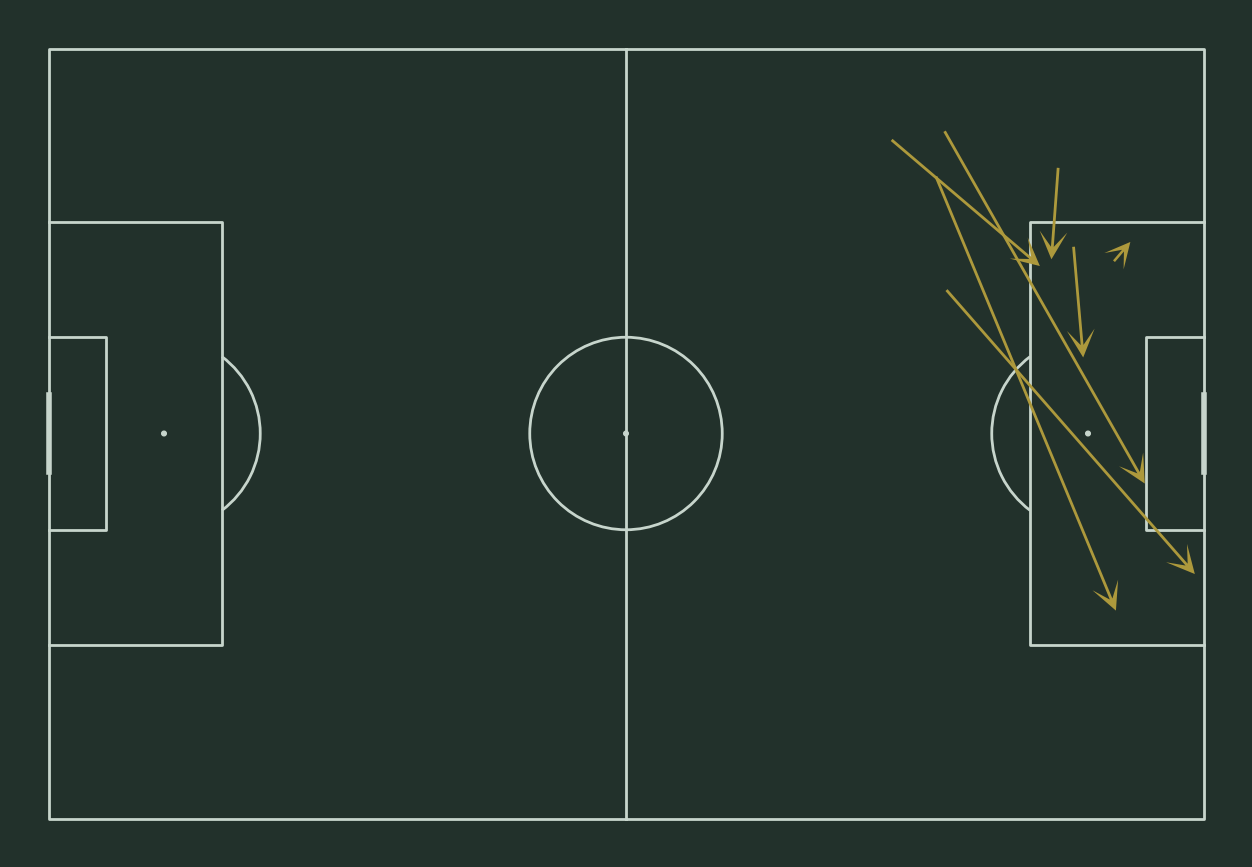

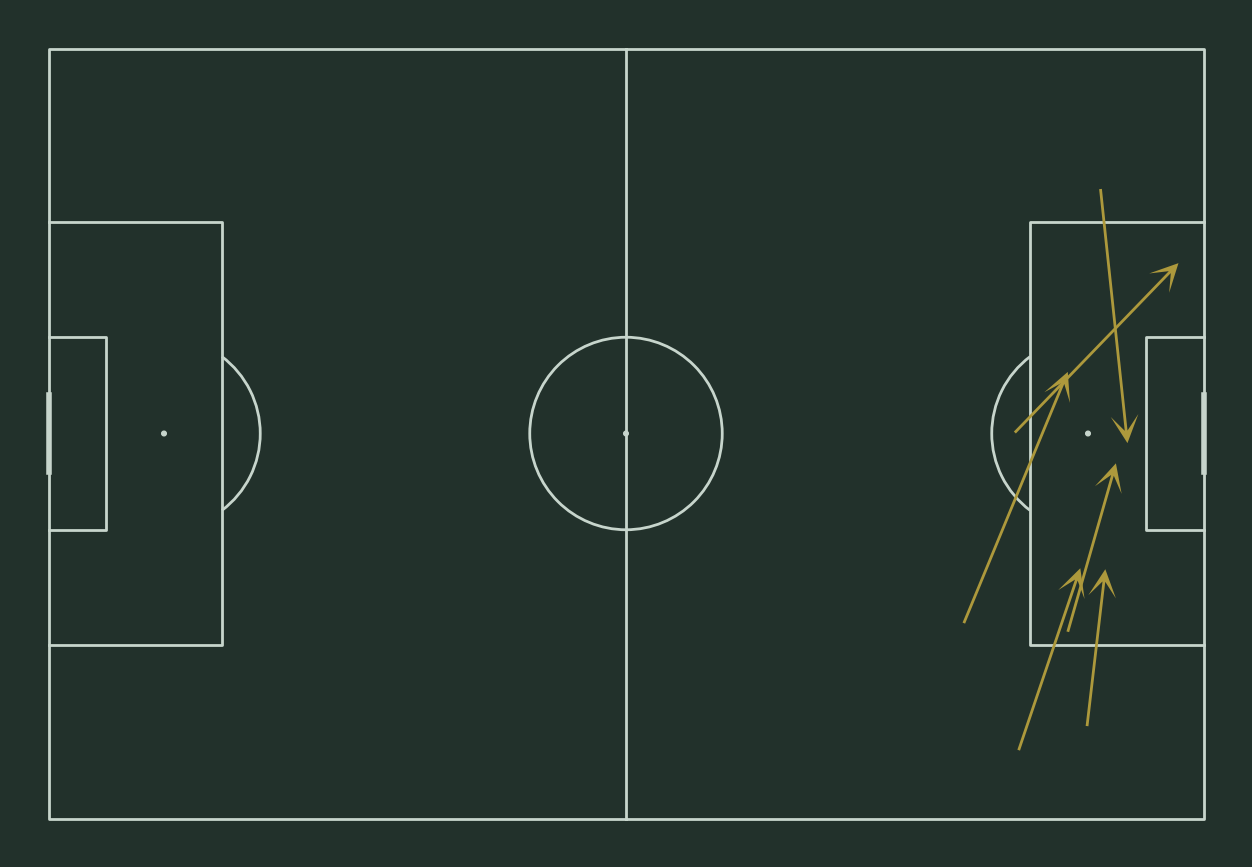

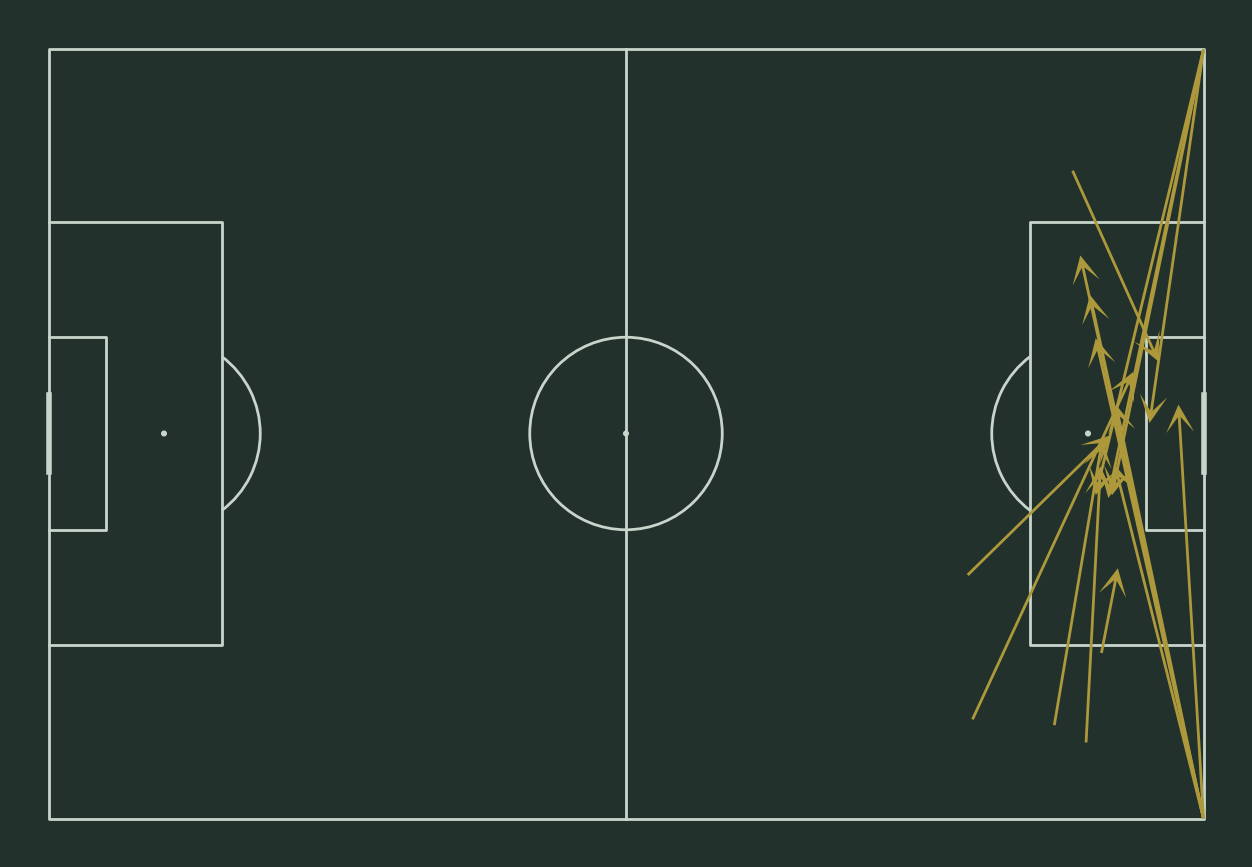

In [136]:

for index, match in matches.iterrows():
    print(f"Match ID: {match['match_id']}")
     # Vérifiez la structure de home_team et away_team
    print(f"Équipe à domicile: {match['home_team']}")
    print(f"Équipe à l'extérieur: {match['away_team']}")
    
    players_frequently_passed_the_ball_into_the_opposition_box(match['match_id'])
    

Conclusion
Le programme développé permet d'analyser de manière approfondie les performances des joueurs lors des matchs de football, en se concentrant spécifiquement sur les passes effectuées vers la surface de réparation adverse. Grâce à l'utilisation de la bibliothèque StatsBomb, il permet d'extraire et de visualiser les données de passes des joueurs pendant des matchs de la Coupe du Monde 2022, en identifiant ceux qui ont le plus contribué à créer des opportunités de but.

Utilité pour les entraîneurs : Cette analyse est particulièrement bénéfique pour les entraîneurs et les équipes techniques, car elle leur fournit des informations précieuses sur les joueurs qui jouent un rôle clé dans la construction des attaques. En identifiant les joueurs capables de passer efficacement dans la zone dangereuse, les entraîneurs peuvent :

Optimiser les stratégies offensives : Comprendre quelles combinaisons de joueurs sont les plus efficaces pour créer des occasions de but.
Développer des sessions d'entraînement ciblées : Travailler spécifiquement sur les compétences de passes et de prise de décision des joueurs qui manquent de régularité dans leurs passes vers la surface adverse.
Évaluer les performances individuelles et collectives : Utiliser les données pour ajuster les tactiques de jeu en fonction des forces et des faiblesses observées lors des matchs précédents.
En somme, cet outil d'analyse des passes non seulement enrichit la compréhension des dynamiques de jeu, mais il sert aussi de guide stratégique pour améliorer les performances des équipes sur le terrain.